In [55]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

In [56]:
data = pd.read_excel("D:/GL/Total DS Codes2/ML/Assignment Project/Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print("Top 5 rows",data.head())

Top 5 rows      vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male  


In [57]:
import pandas_profiling
df = pd.read_excel("D:/GL/Total DS Codes2/ML/Assignment Project/Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')
profile =df.profile_report(title='Election_data')
profile.to_file(output_file="D:/GL/Total DS Codes2/ML/Assignment Project/Election_Data_before_clean.html")

In [58]:
print(data.isna().sum())
print(data.isnull().sum())
print(data.dtypes)
cust_data=data.drop(['vote','gender'] , axis=1)

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


In [59]:
def valcount(data,colname):
    print("value count {} freqrange {}".format(colname,data[colname].value_counts(normalize=True)))

valcount(data,'vote')
valcount(data,'gender')

value count vote freqrange Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64
value count gender freqrange female    0.532459
male      0.467541
Name: gender, dtype: float64


In [60]:
        print("shape\n",cust_data.shape) # see the shape of the cust_data
        print("Info\n",cust_data.info())
        print("Mean\n",cust_data.mean())
        print("Mode\n",cust_data.mode())
        print("median\n",cust_data.median())
        print("cust_data_quantile(25%):\n",cust_data.quantile(q=0.25))
        print("cust_data_quantile(50%):\n",cust_data.quantile(q=0.50))
        print("cust_data_quantile(75%):\n",cust_data.quantile(q=0.75))
        print("describe\n",cust_data.describe())
#         print("IQR"+colname+"\n",cust_data[colname2].quantile(0.75) - cust_data[colname2].quantile(0.25))
        print("IQR\n",cust_data.quantile(0.75) - cust_data.quantile(0.25))
        Q1 = cust_data.quantile(0.25)
        Q3 = cust_data.quantile(0.75)
        IQR = Q3 - Q1
        print("Outlier sum\n",((cust_data < (Q1 - 1.5 * IQR)) | (cust_data > (Q3 + 1.5 * IQR))).sum())
        print("Range\n",cust_data.max() - cust_data.min())
        print("variance\n",cust_data.var())
        print("std\n",cust_data.std())
        print("cov\n",cust_data.cov())
        print("corr\n",cust_data.corr())
        print("skew\n",cust_data.skew())
        print("kurt\n",cust_data.kurt())

shape
 (1525, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 7 columns):
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
dtypes: int64(7)
memory usage: 83.5 KB
Info
 None
Mean
 age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64
Mode
    age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   37                       3                        3      4      2      11   

   political.knowledge  
0                    2  

In [61]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [62]:
print(data.duplicated().sum())

8


In [64]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Before removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
def remove_outlier(col):
        sorted(col)
        Q1,Q3=np.percentile(col,[25,75])
        IQR=Q3-Q1
        lower_range= Q1-(1.5 * IQR)
        upper_range= Q3+(1.5 * IQR)
        return lower_range, upper_range
def outlrem():
        print(data.shape)
        for column in data.iloc[:, 0:data.shape[1]].columns:
            lr,ur=remove_outlier(data[column])
            data[column]=np.where(data[column]>ur,ur,data[column])
            data[column]=np.where(data[column]<lr,lr,data[column])

        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        print("After removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
outlrem()
print("isnull sum\n",data.isnull().sum())
print("isna sum\n",data.isna().sum())
print(data.head(5))
data.to_csv('D:/GL/Total DS Codes2/ML/Assignment Project/Election_Data_cleaned.csv')
print(data.dtypes)

Before removing Outlier sum
 vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64
(1525, 9)
After removing Outlier sum
 vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64
isnull sum
 vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64
isna sum
 vote                       0
age                        0
economic.cond.national     0
ec

In [65]:
import pandas_profiling
df = pd.read_csv("D:/GL/Total DS Codes2/ML/Assignment Project/Election_Data_cleaned.csv")
profile =df.profile_report(title='Election_data_clean')
profile.to_file(output_file="D:/GL/Total DS Codes2/ML/Assignment Project/Election_Data_after_clean.html")

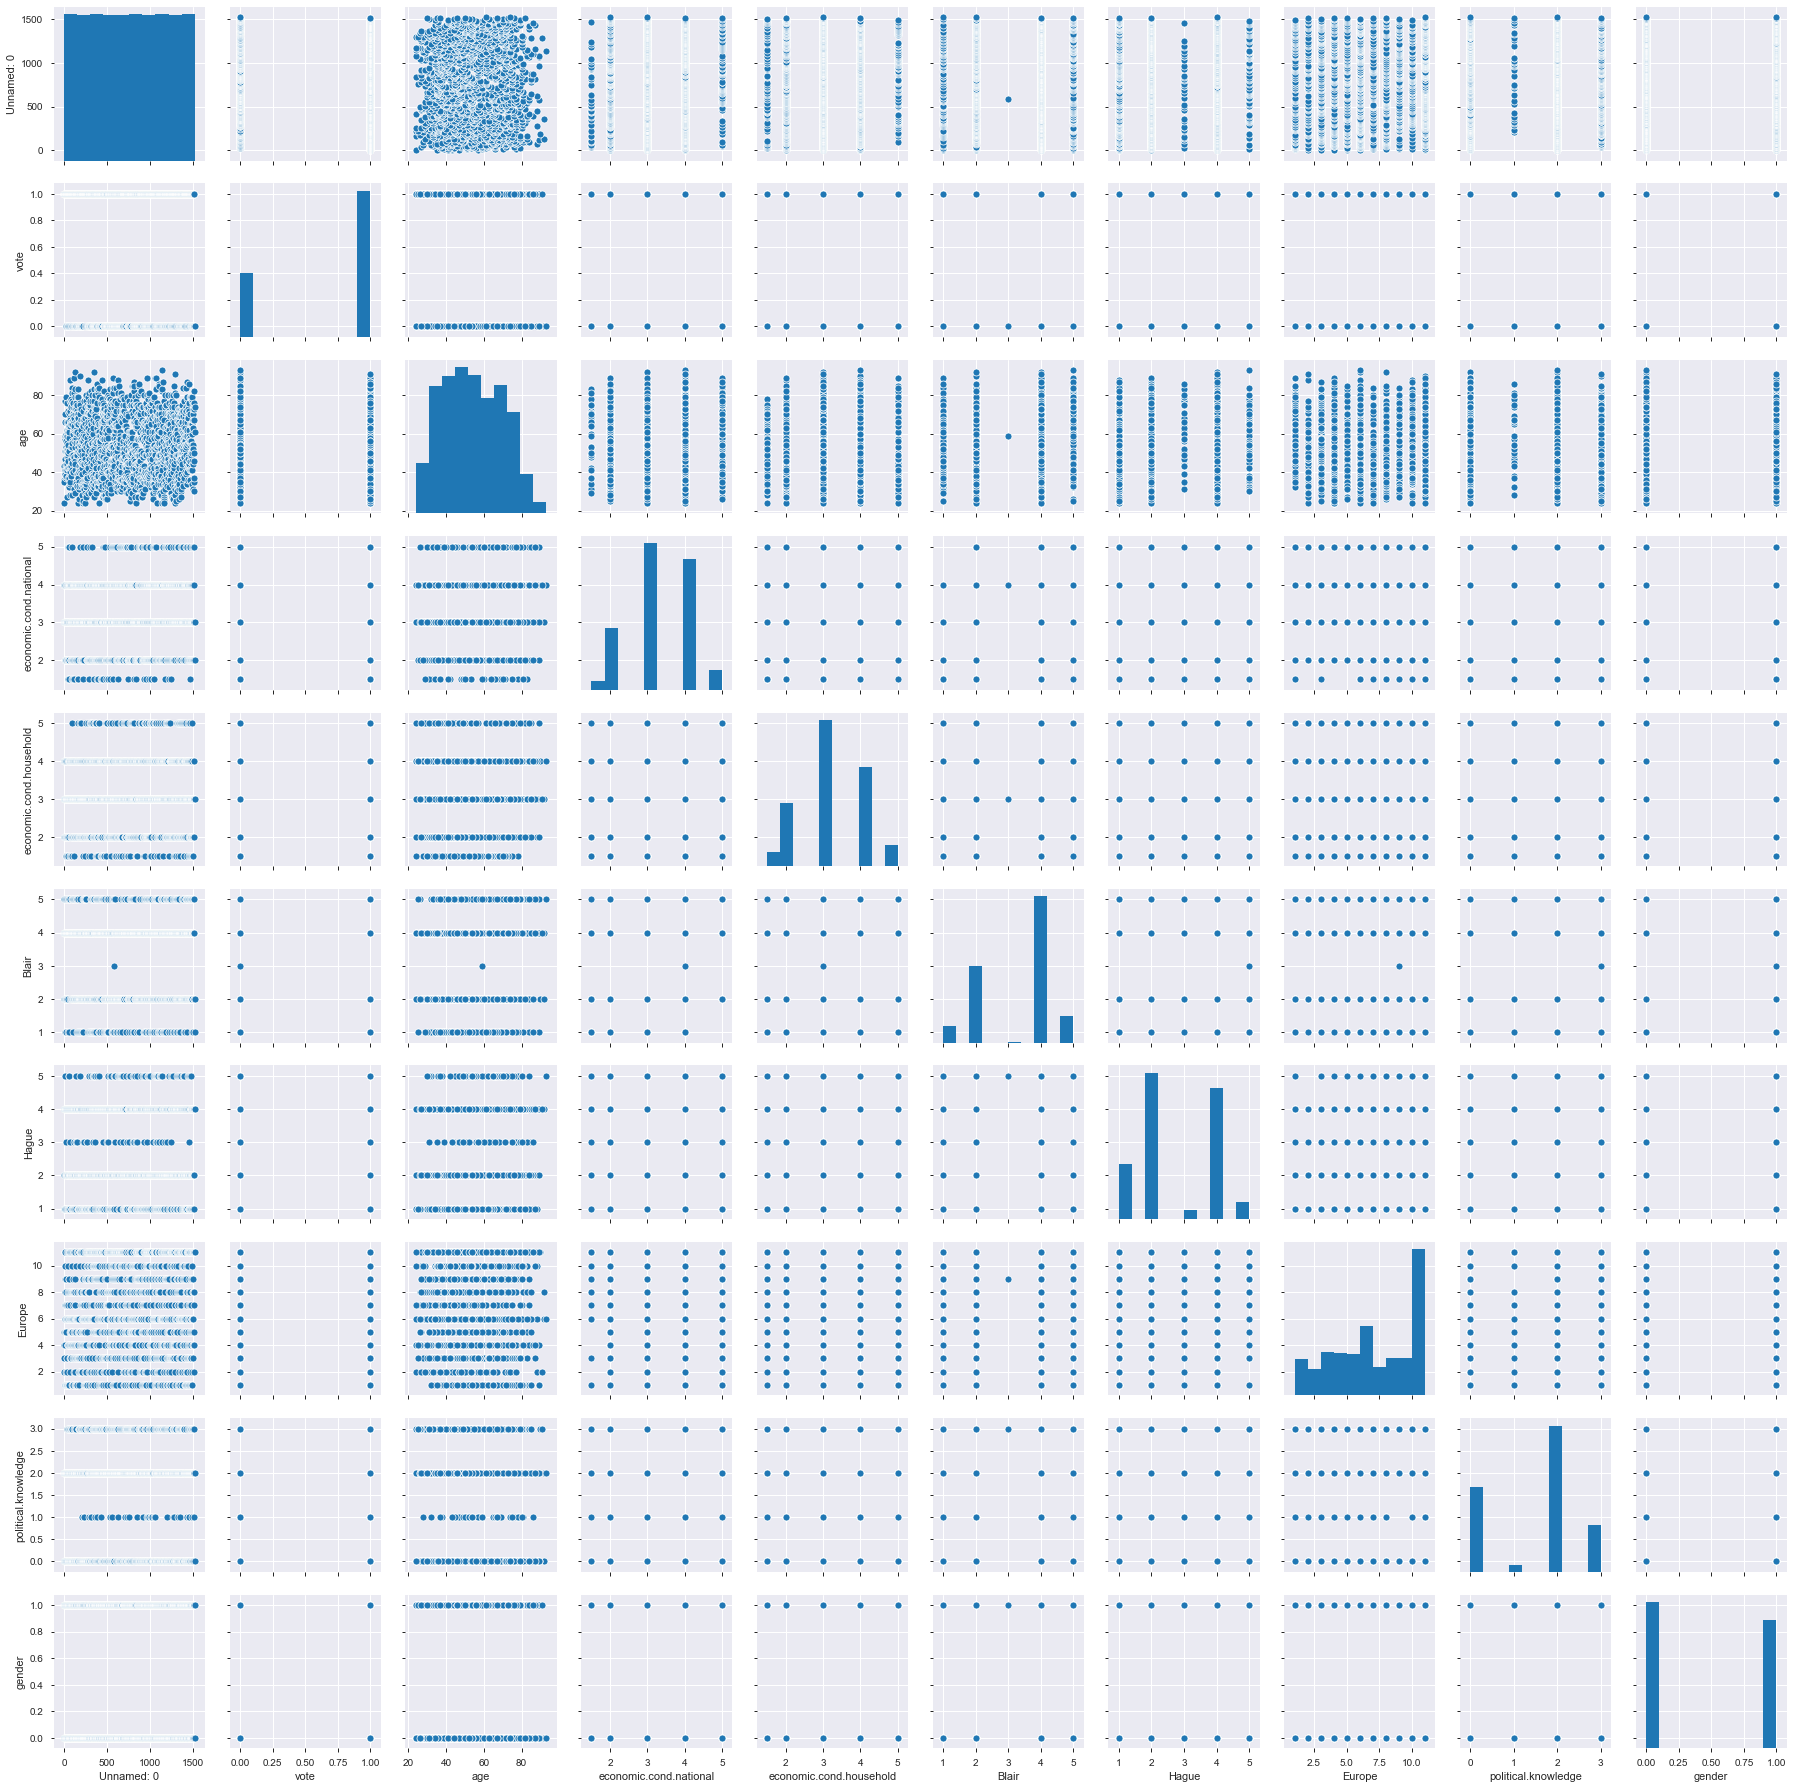

In [66]:
pairdata=pd.read_csv("D:/GL/Total DS Codes2/ML/Assignment Project/Election_Data_cleaned.csv")
sns.pairplot(pairdata)
plt.show()

   vote   age  economic.cond.national  economic.cond.household  Blair  Hague  \
0   1.0  43.0                     3.0                      3.0    4.0    1.0   
1   1.0  36.0                     4.0                      4.0    4.0    4.0   
2   1.0  35.0                     4.0                      4.0    5.0    2.0   
3   1.0  24.0                     4.0                      2.0    2.0    1.0   
4   1.0  41.0                     2.0                      2.0    1.0    1.0   

   Europe  political.knowledge  gender  
0     2.0                  2.0     0.0  
1     5.0                  2.0     1.0  
2     3.0                  2.0     1.0  
3     4.0                  0.0     0.0  
4     6.0                  2.0     1.0  


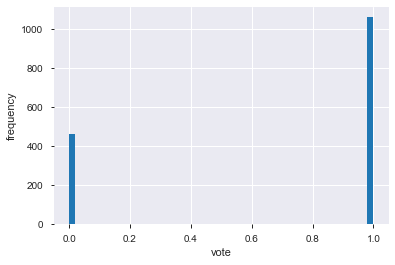

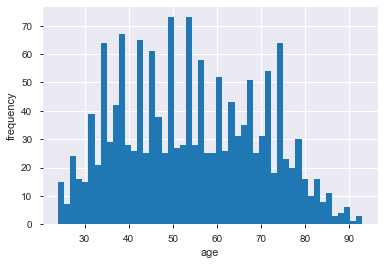

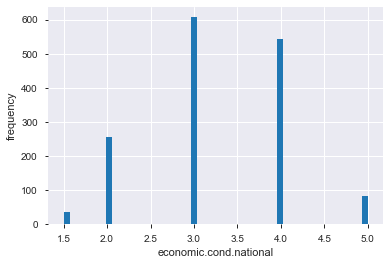

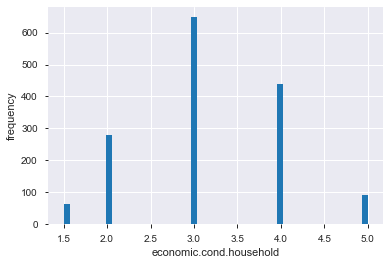

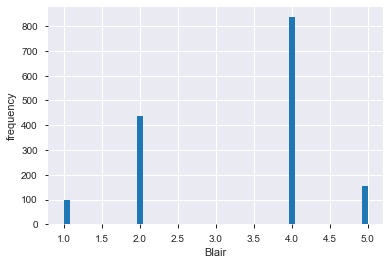

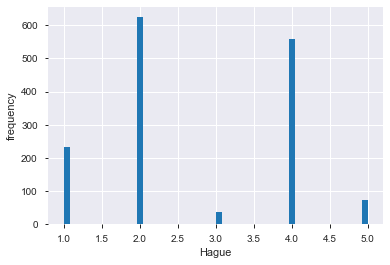

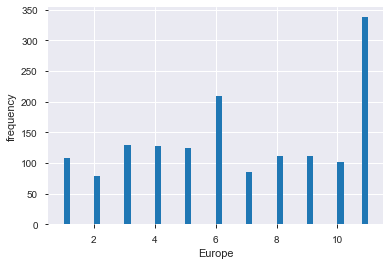

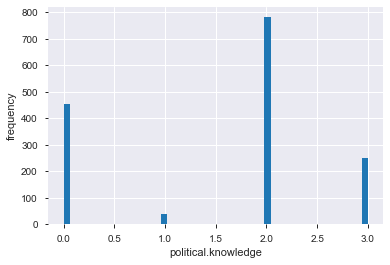

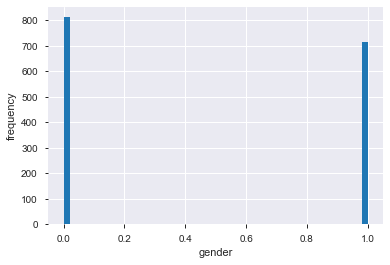

In [67]:
def histplot(data):
        print(data.head(5))
        colnames=list(data.columns.values)
        for i in range(0,9):
            plt.hist(data.iloc[:,i], bins=50)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
histplot(data)

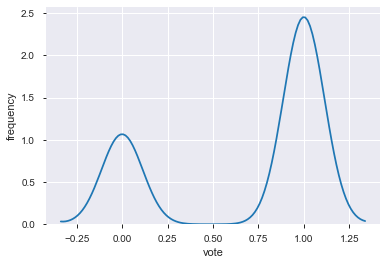

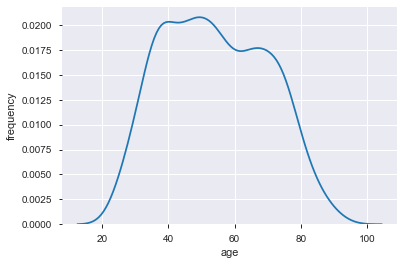

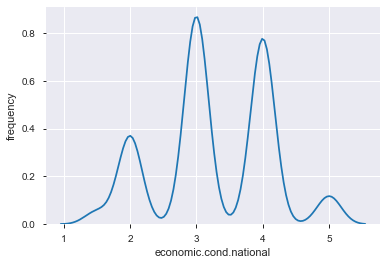

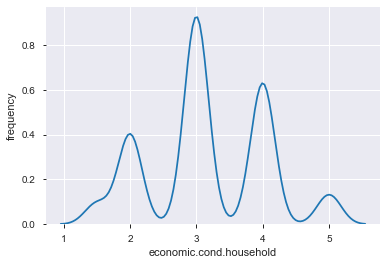

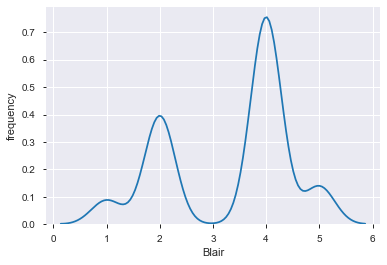

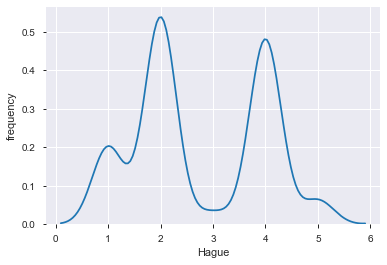

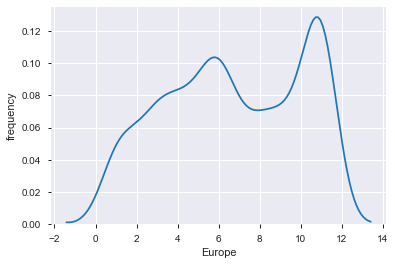

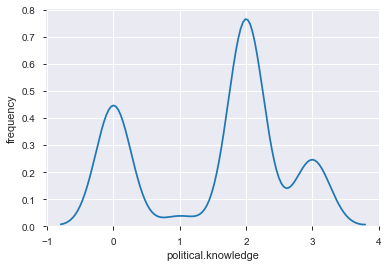

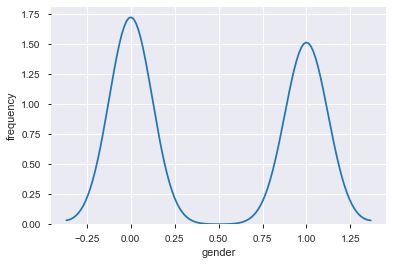

In [68]:
def distplot(data):
        colnames=list(data.columns.values)
        for i in range(0,9):
            sns.distplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
distplot(data)

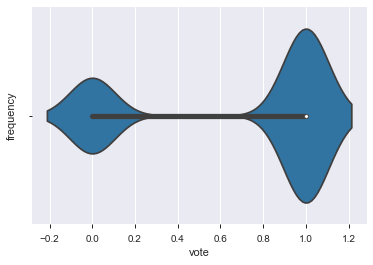

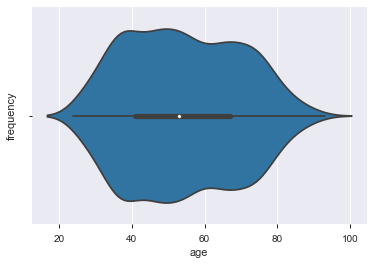

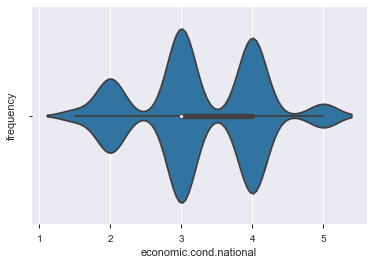

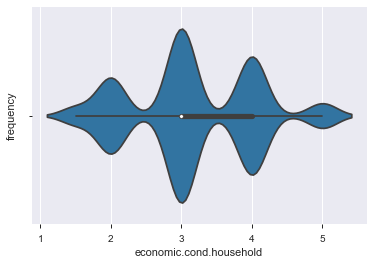

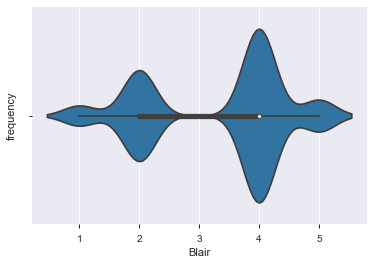

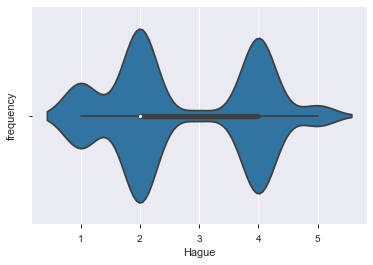

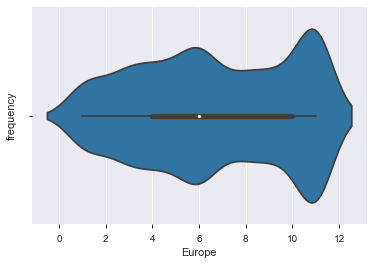

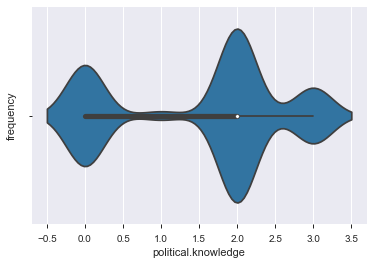

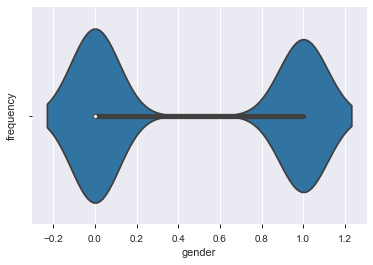

In [69]:
def violinplot(data):
        colnames=list(data.columns.values)
        for i in range(0,9):
            sns.violinplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
violinplot(data)

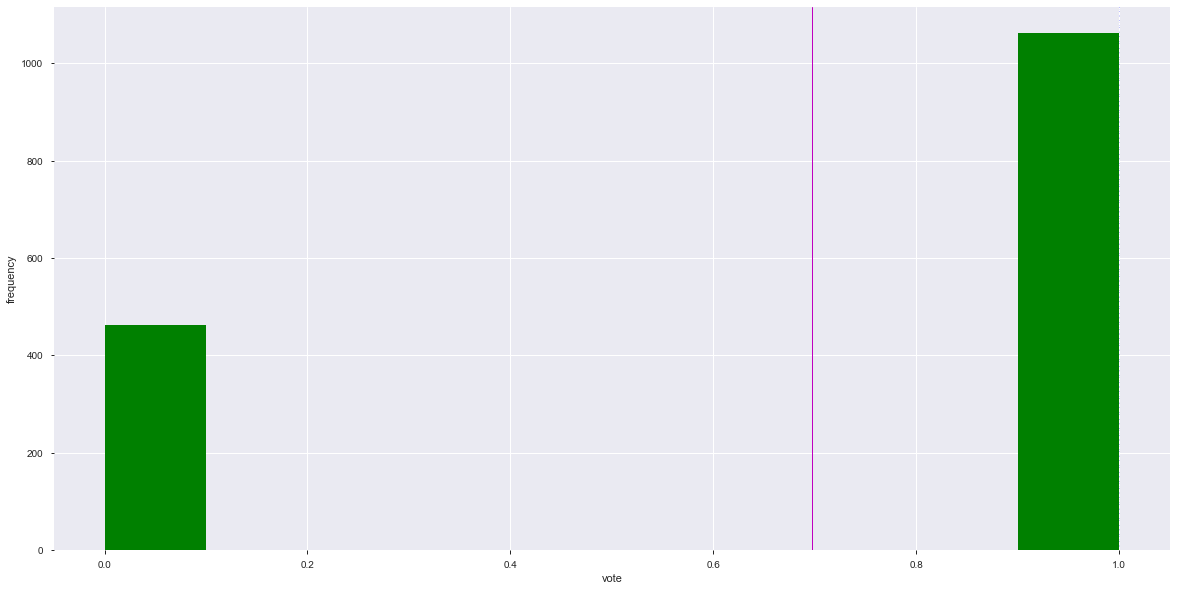

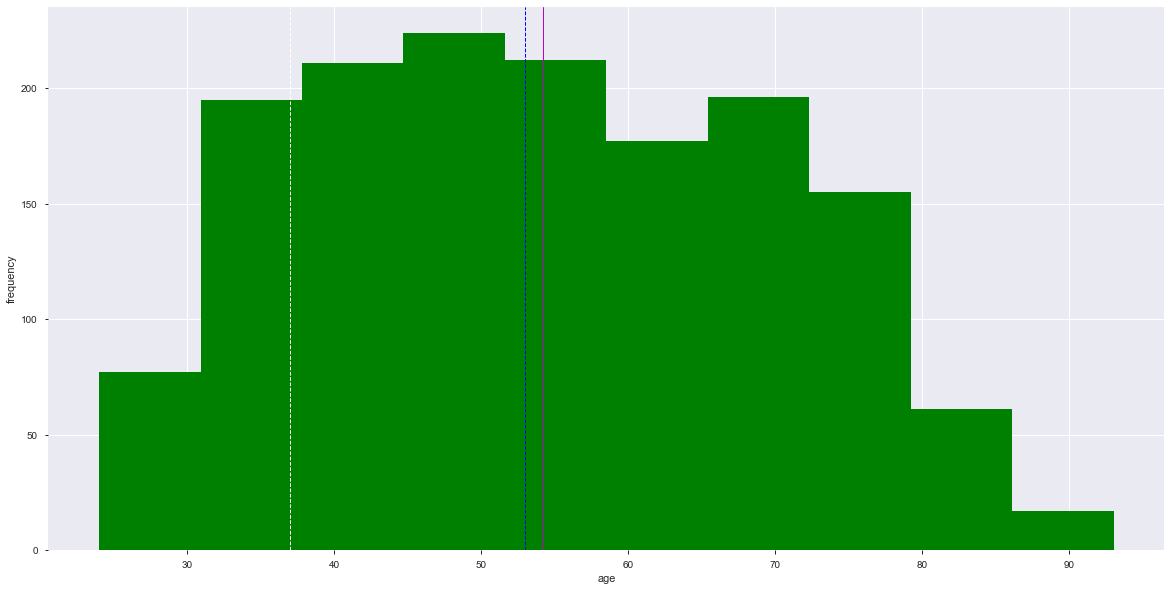

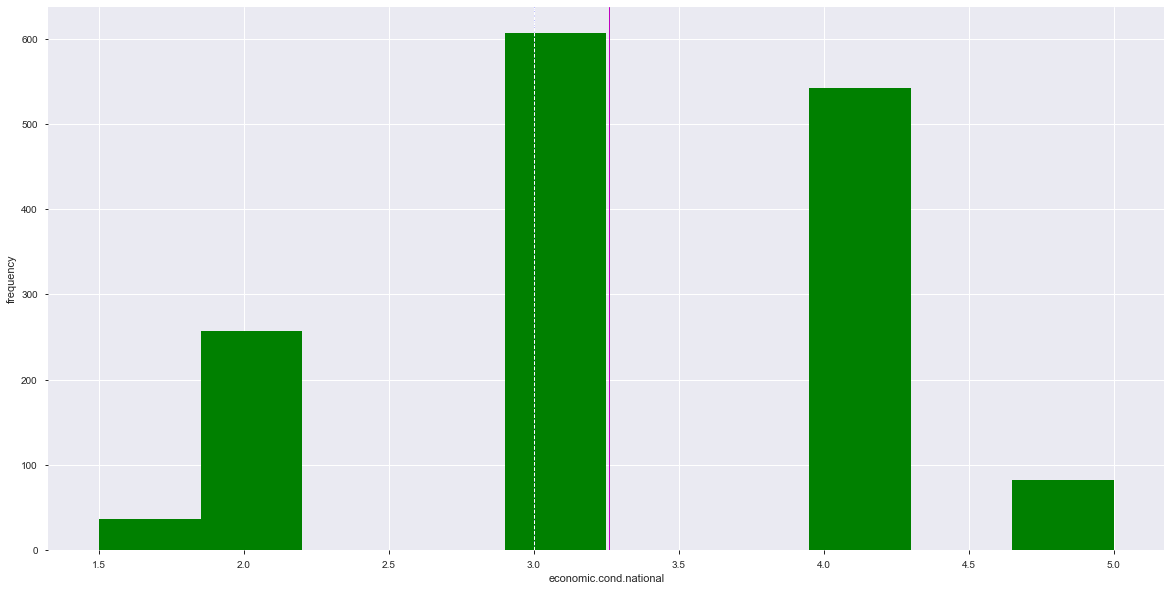

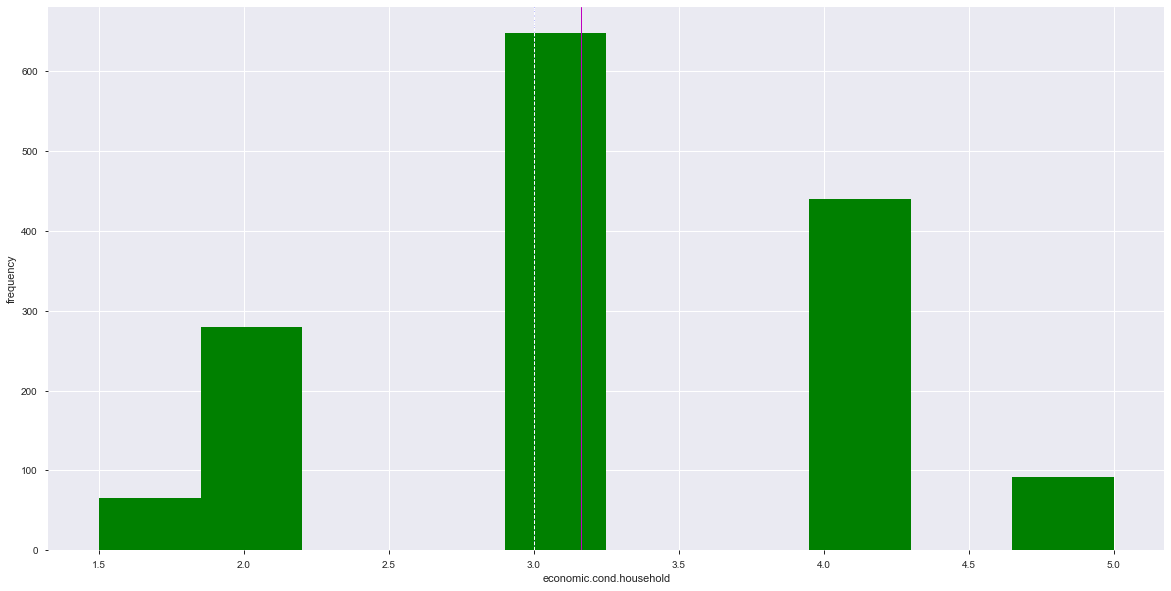

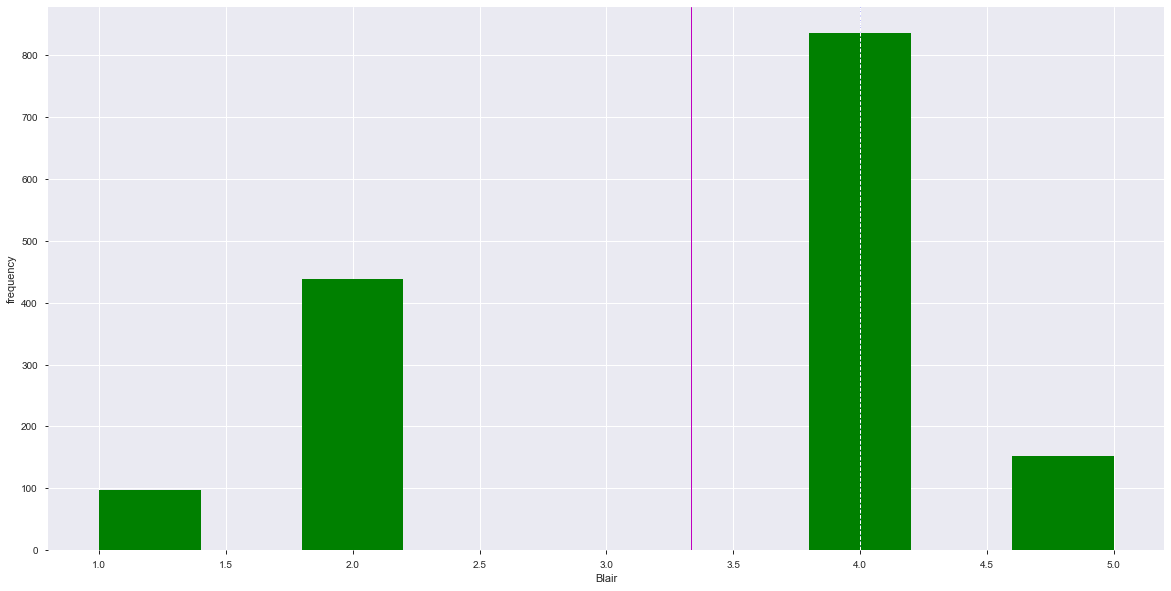

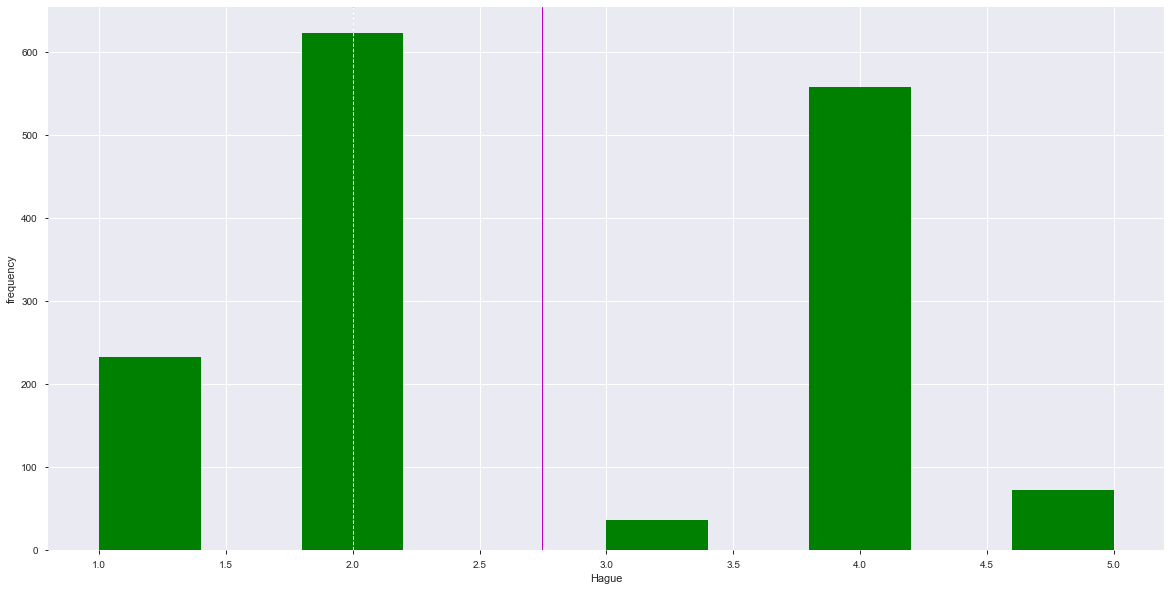

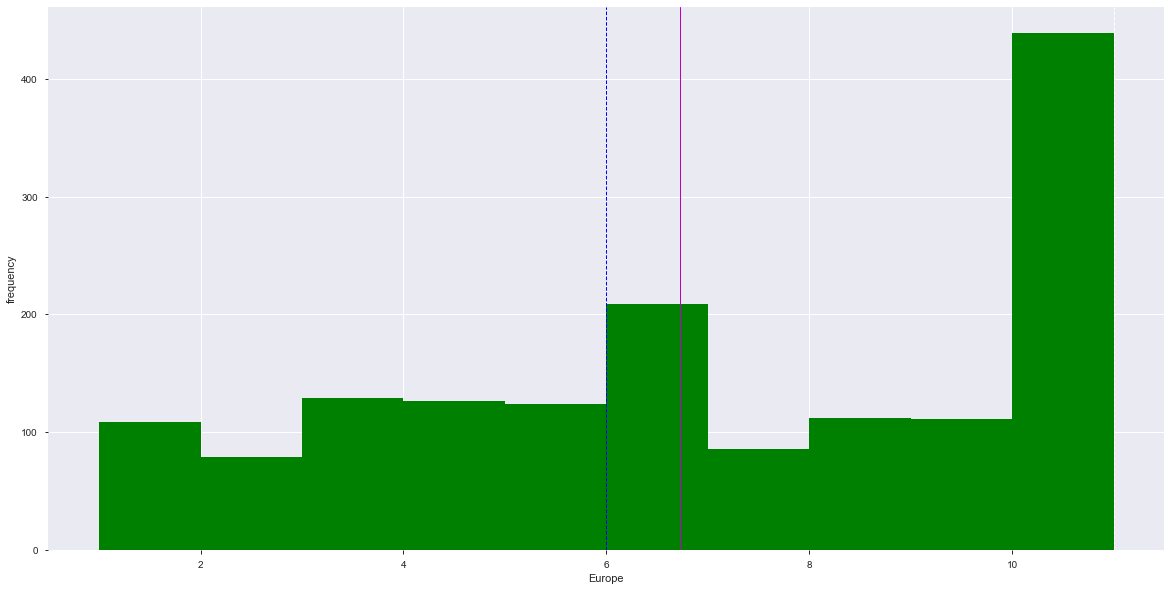

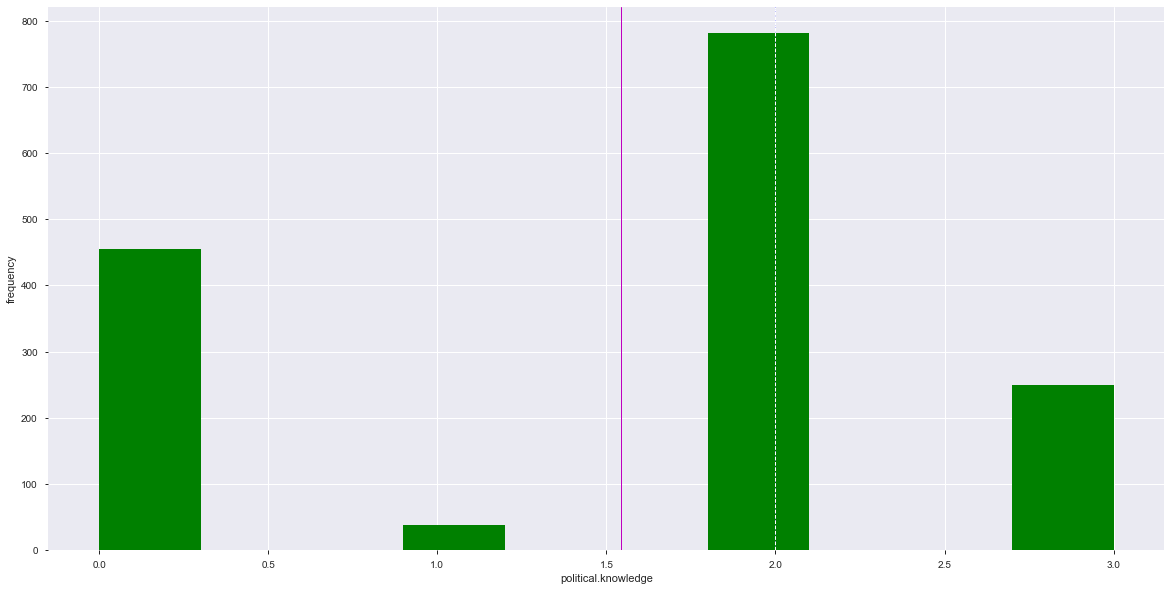

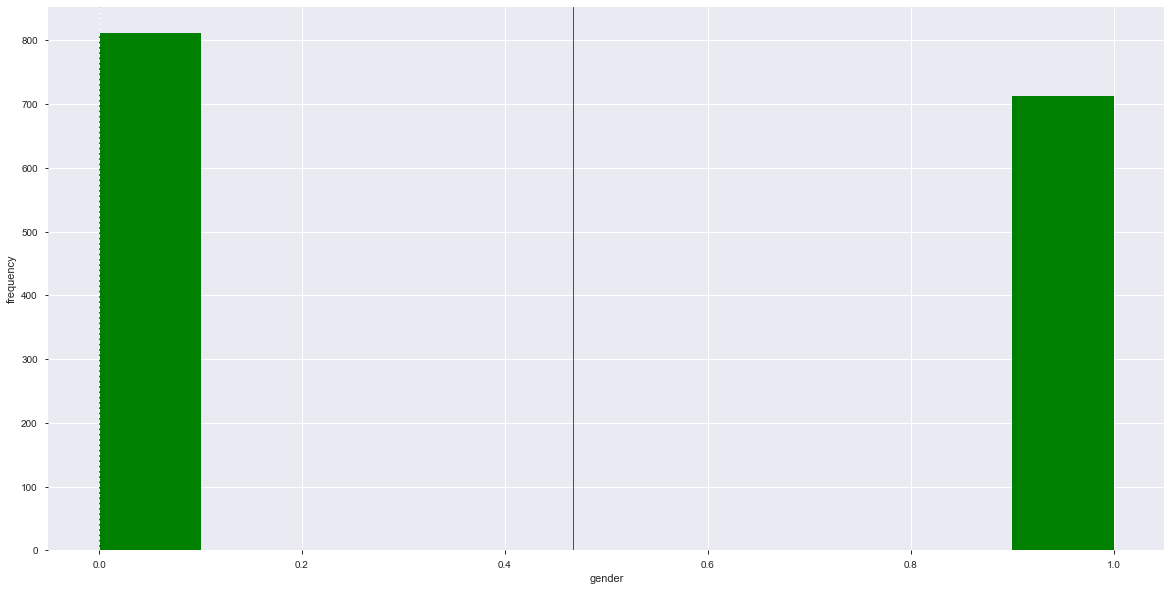

In [70]:
def closelookplot(data):
        colnames=list(data.columns.values)
        for i in range(0,9):
            plt.figure(figsize=(20,10)) # makes the plot wider
            plt.hist(data.iloc[:,i], color='g') # plots a simple histogram
            plt.axvline(data.iloc[:,i].mean(), color='m', linewidth=1)
            plt.axvline(data.iloc[:,i].median(), color='b', linestyle='dashed', linewidth=1)
            plt.axvline(data.iloc[:,i].mode()[0], color='w', linestyle='dashed', linewidth=1)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
closelookplot(data)

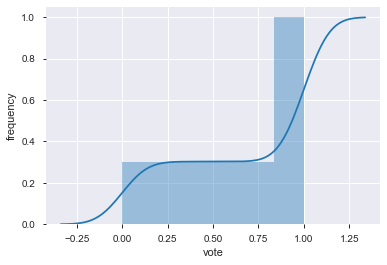

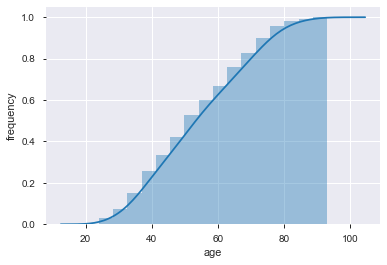

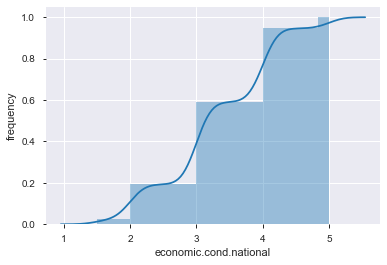

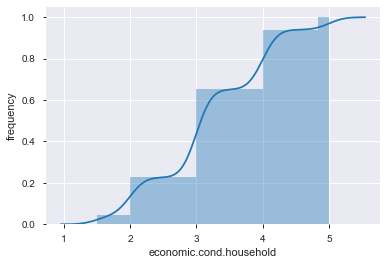

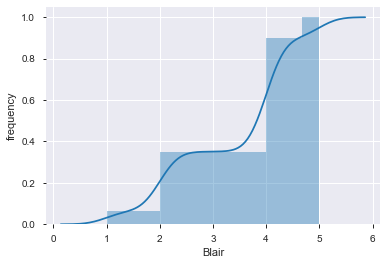

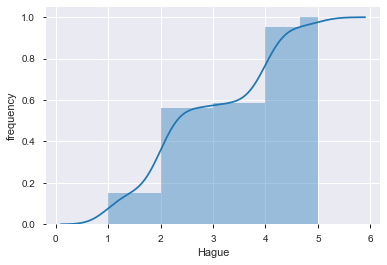

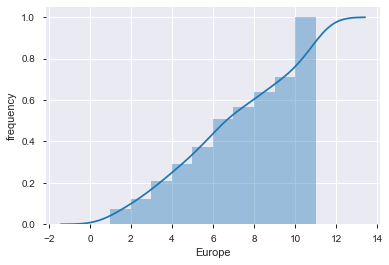

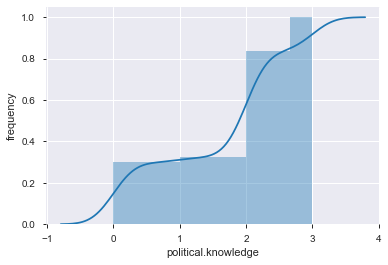

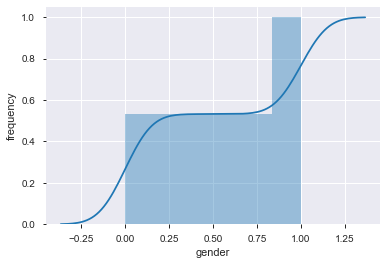

In [71]:
def cumuplot(data):
        colnames=list(data.columns.values)
        for i in range(0,9):
            sns.distplot(data.iloc[:,i], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
cumuplot(data)

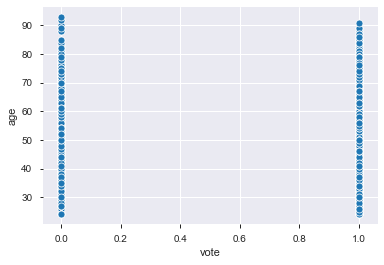

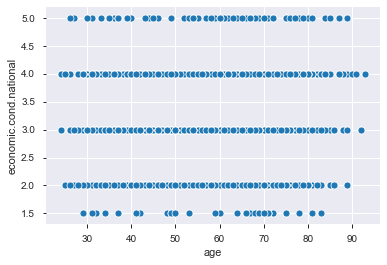

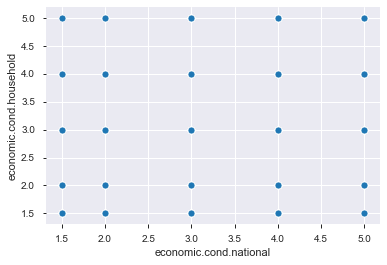

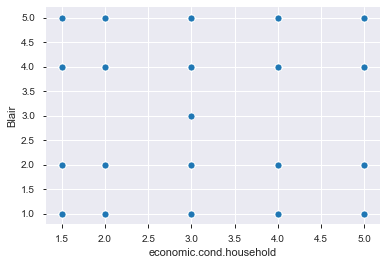

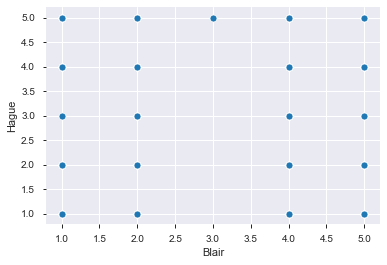

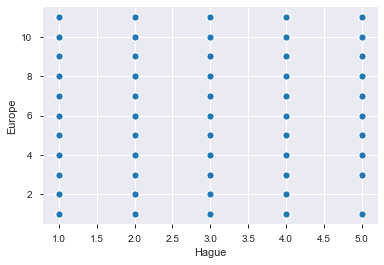

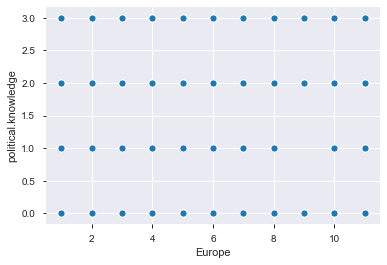

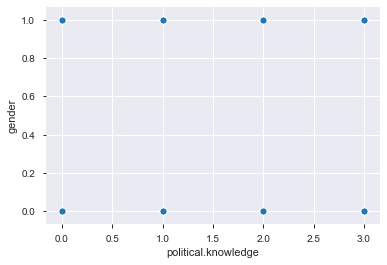

In [72]:
def multiscatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,8):
            sns.scatterplot(data.iloc[:,i], data.iloc[:,i+1]) 
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
multiscatplot(data)

                             vote       age  economic.cond.national  \
vote                     1.000000 -0.112821                0.302428   
age                     -0.112821  1.000000                0.022194   
economic.cond.national   0.302428  0.022194                1.000000   
economic.cond.household  0.176843 -0.047149                0.342942   
Blair                    0.427084  0.030218                0.324402   
Hague                   -0.468508  0.034626               -0.198091   
Europe                  -0.385443  0.068880               -0.206858   
political.knowledge     -0.108653 -0.048490               -0.029395   
gender                   0.037191 -0.019746                0.053982   

                         economic.cond.household     Blair     Hague  \
vote                                    0.176843  0.427084 -0.468508   
age                                    -0.047149  0.030218  0.034626   
economic.cond.national                  0.342942  0.324402 -0.198091   
e

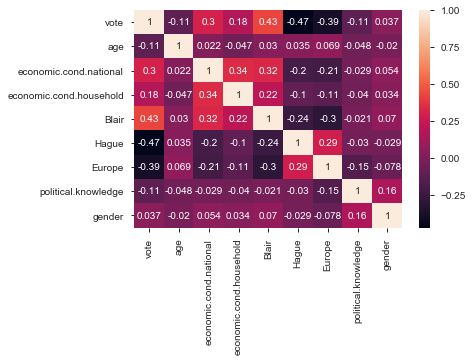

In [73]:
print(data.corr())
sns.heatmap(data.corr(), annot=True)

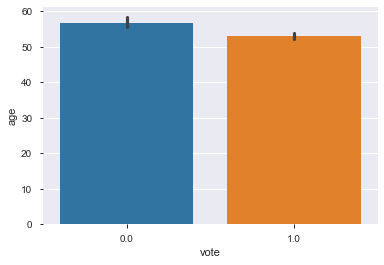

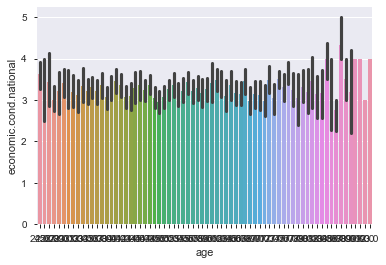

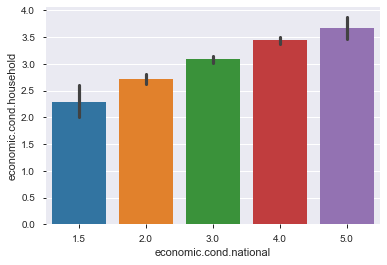

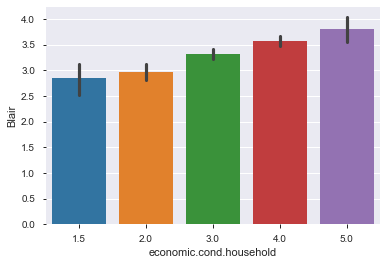

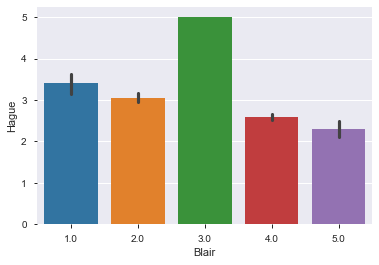

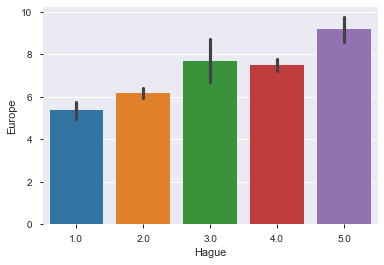

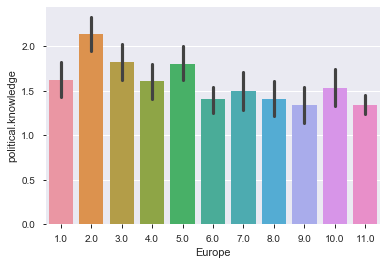

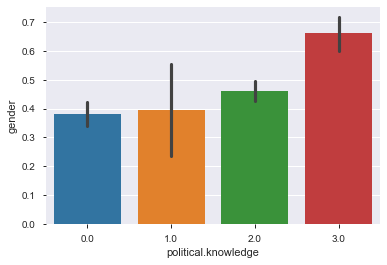

In [74]:
def barplot(data):
        colnames=list(data.columns.values)
        for i in range(0,8):
            sns.barplot(x=colnames[i], y=colnames[i+1], data=data)
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
barplot(data)

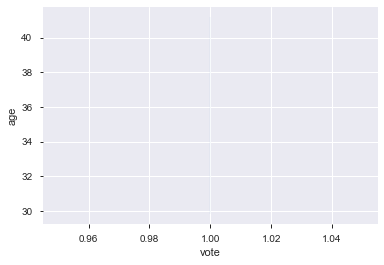

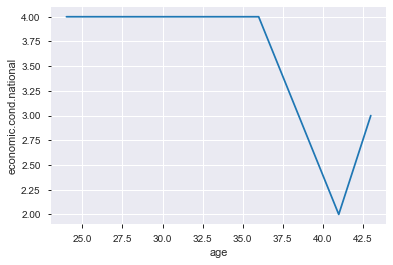

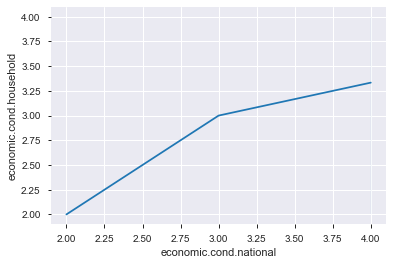

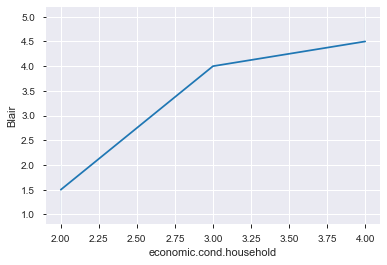

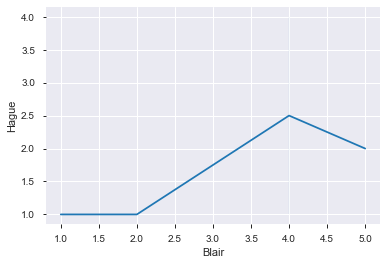

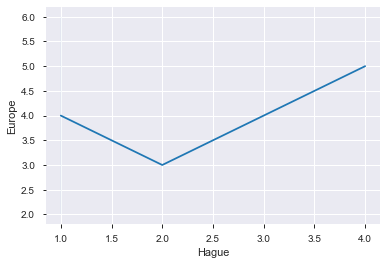

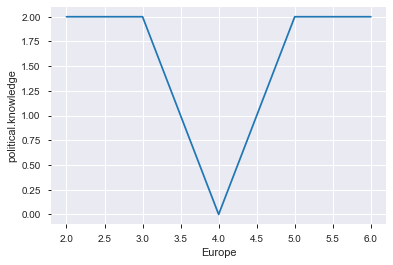

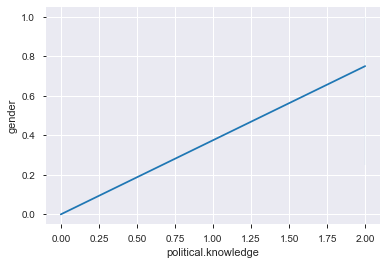

In [75]:
def lineplot(data):
        colnames=list(data.columns.values)
        for i in range(0,8):
            sns.lineplot(x=colnames[i], y=colnames[i+1], data=data.head())
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
lineplot(data)

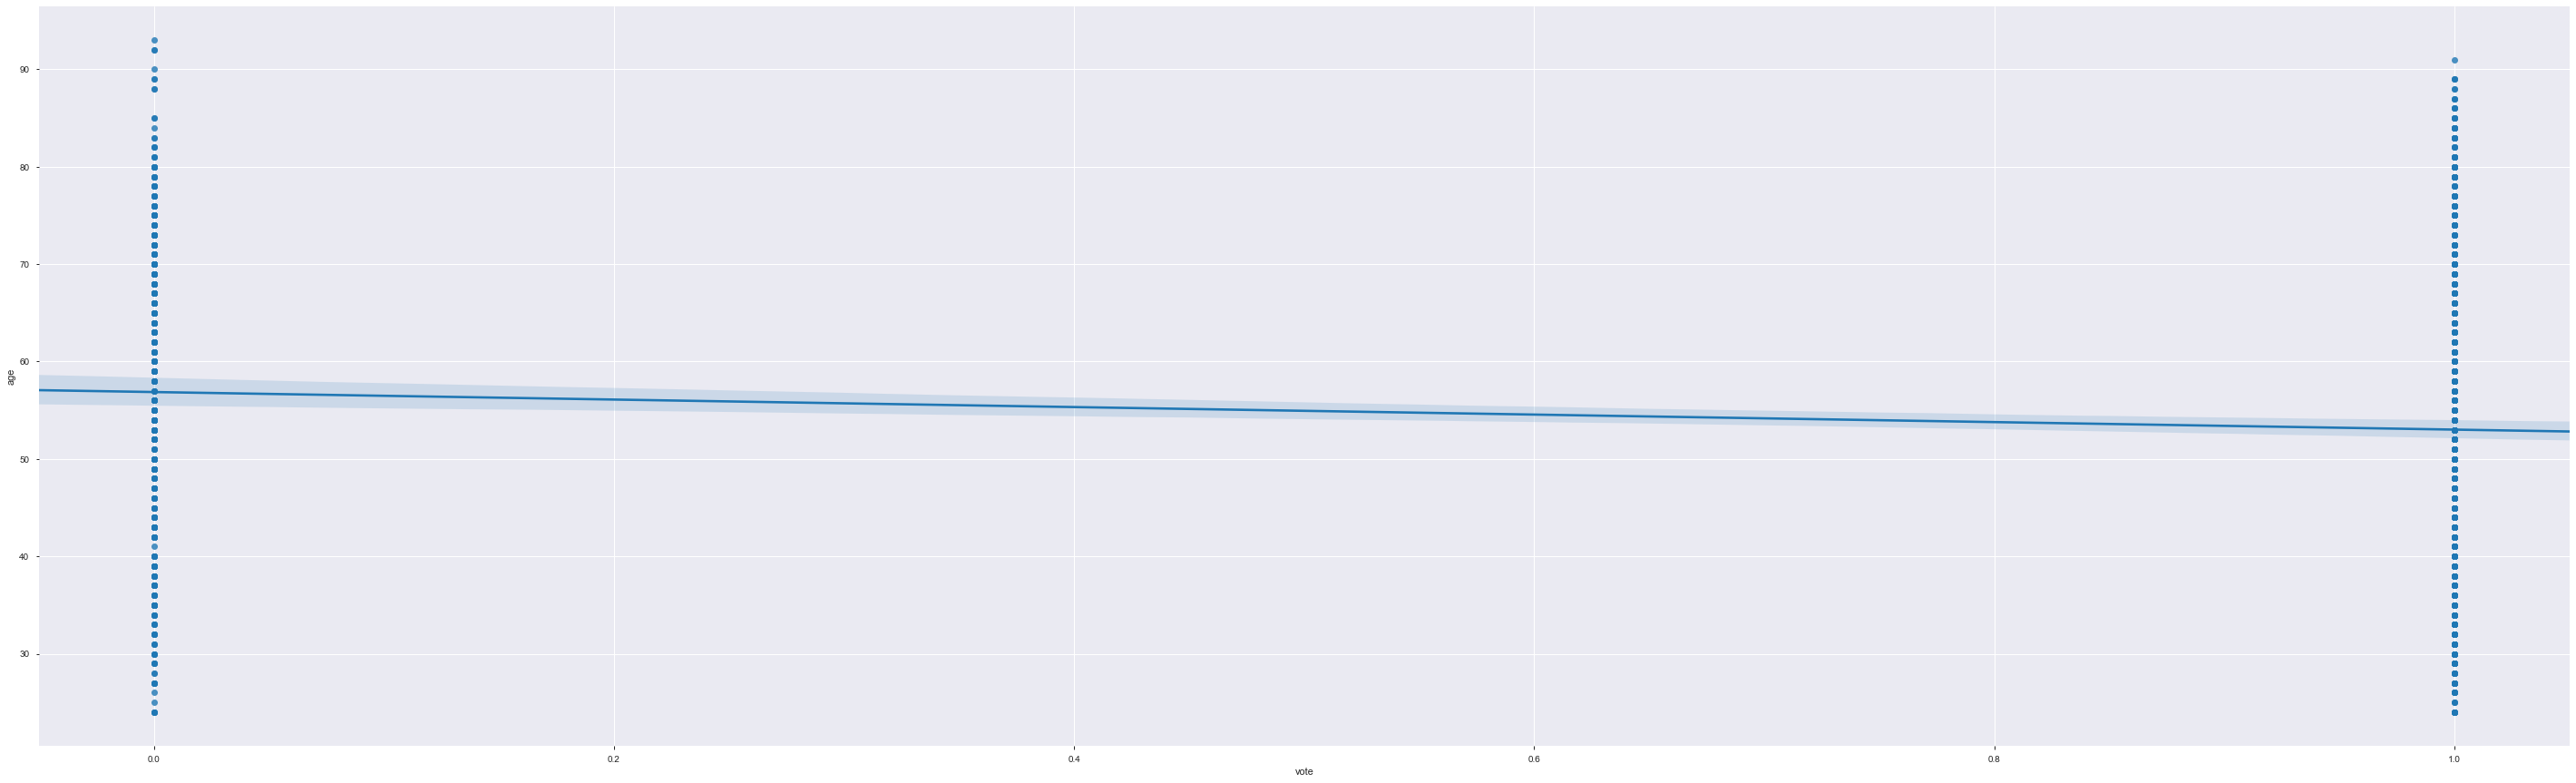

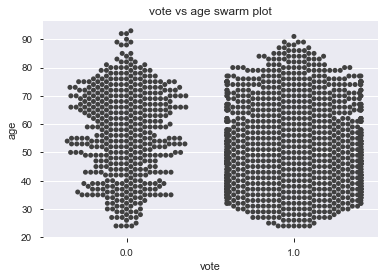

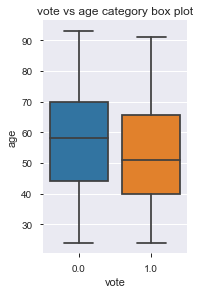

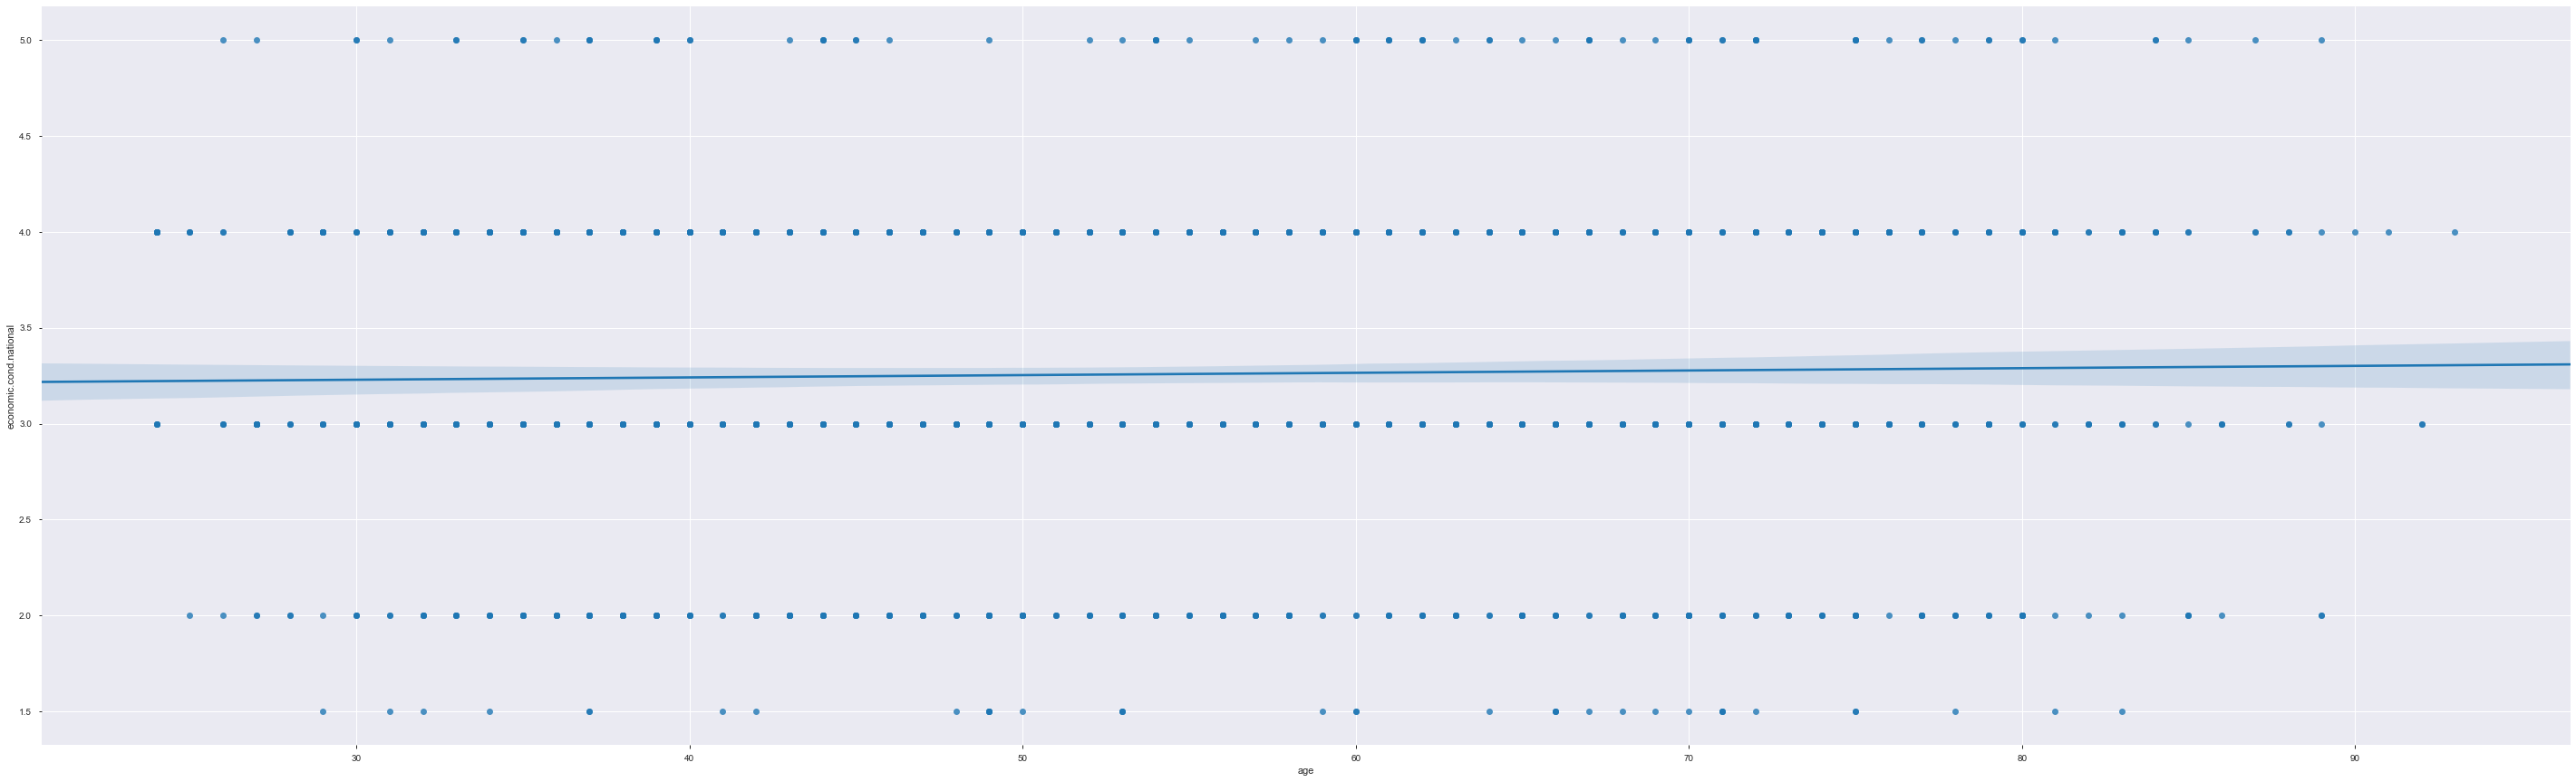

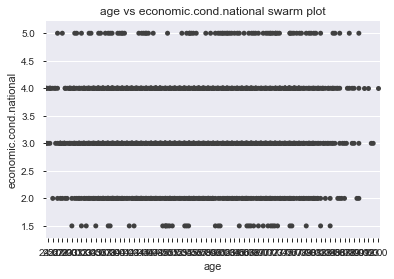

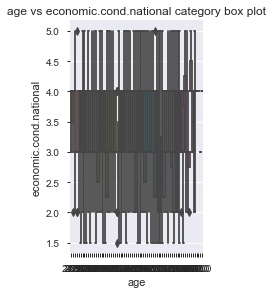

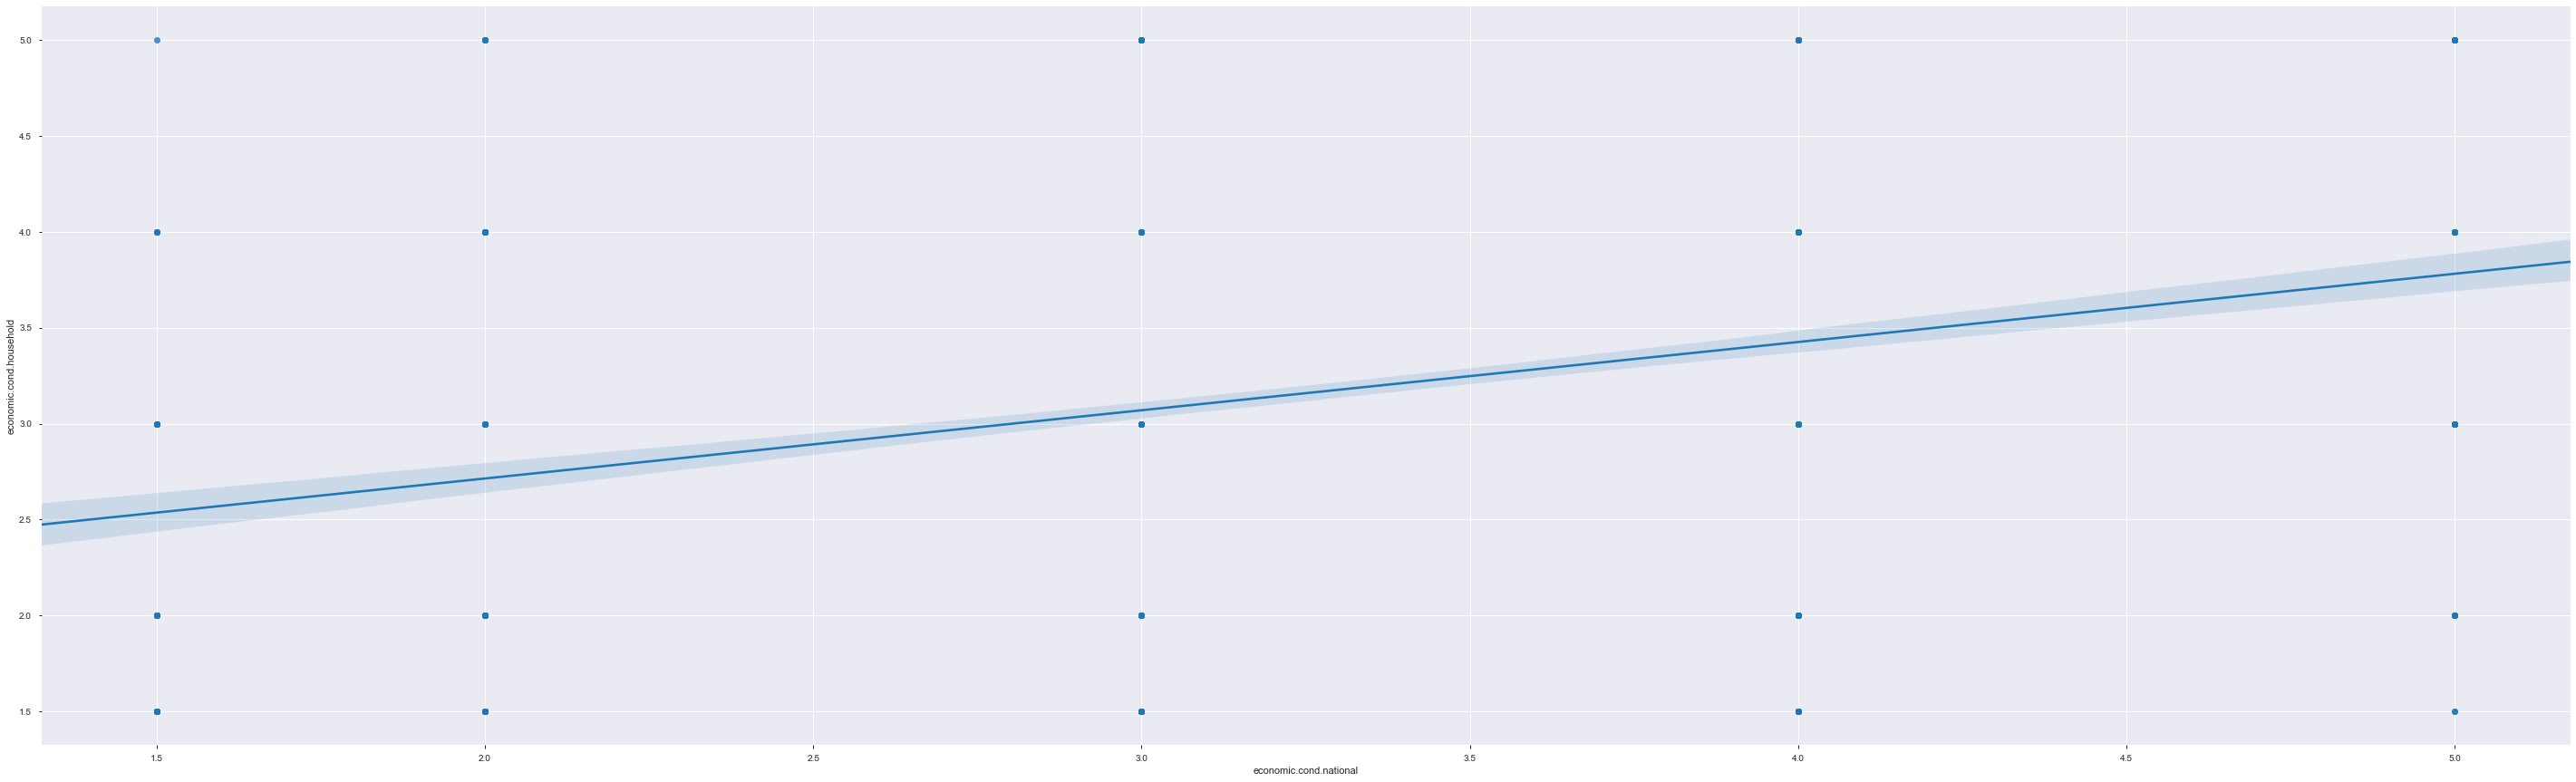

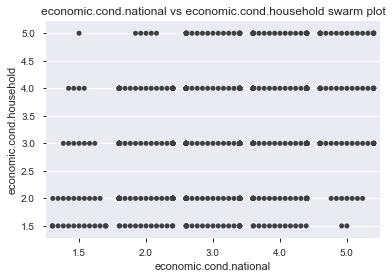

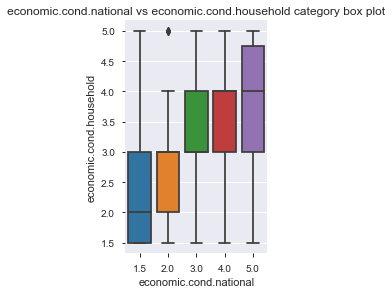

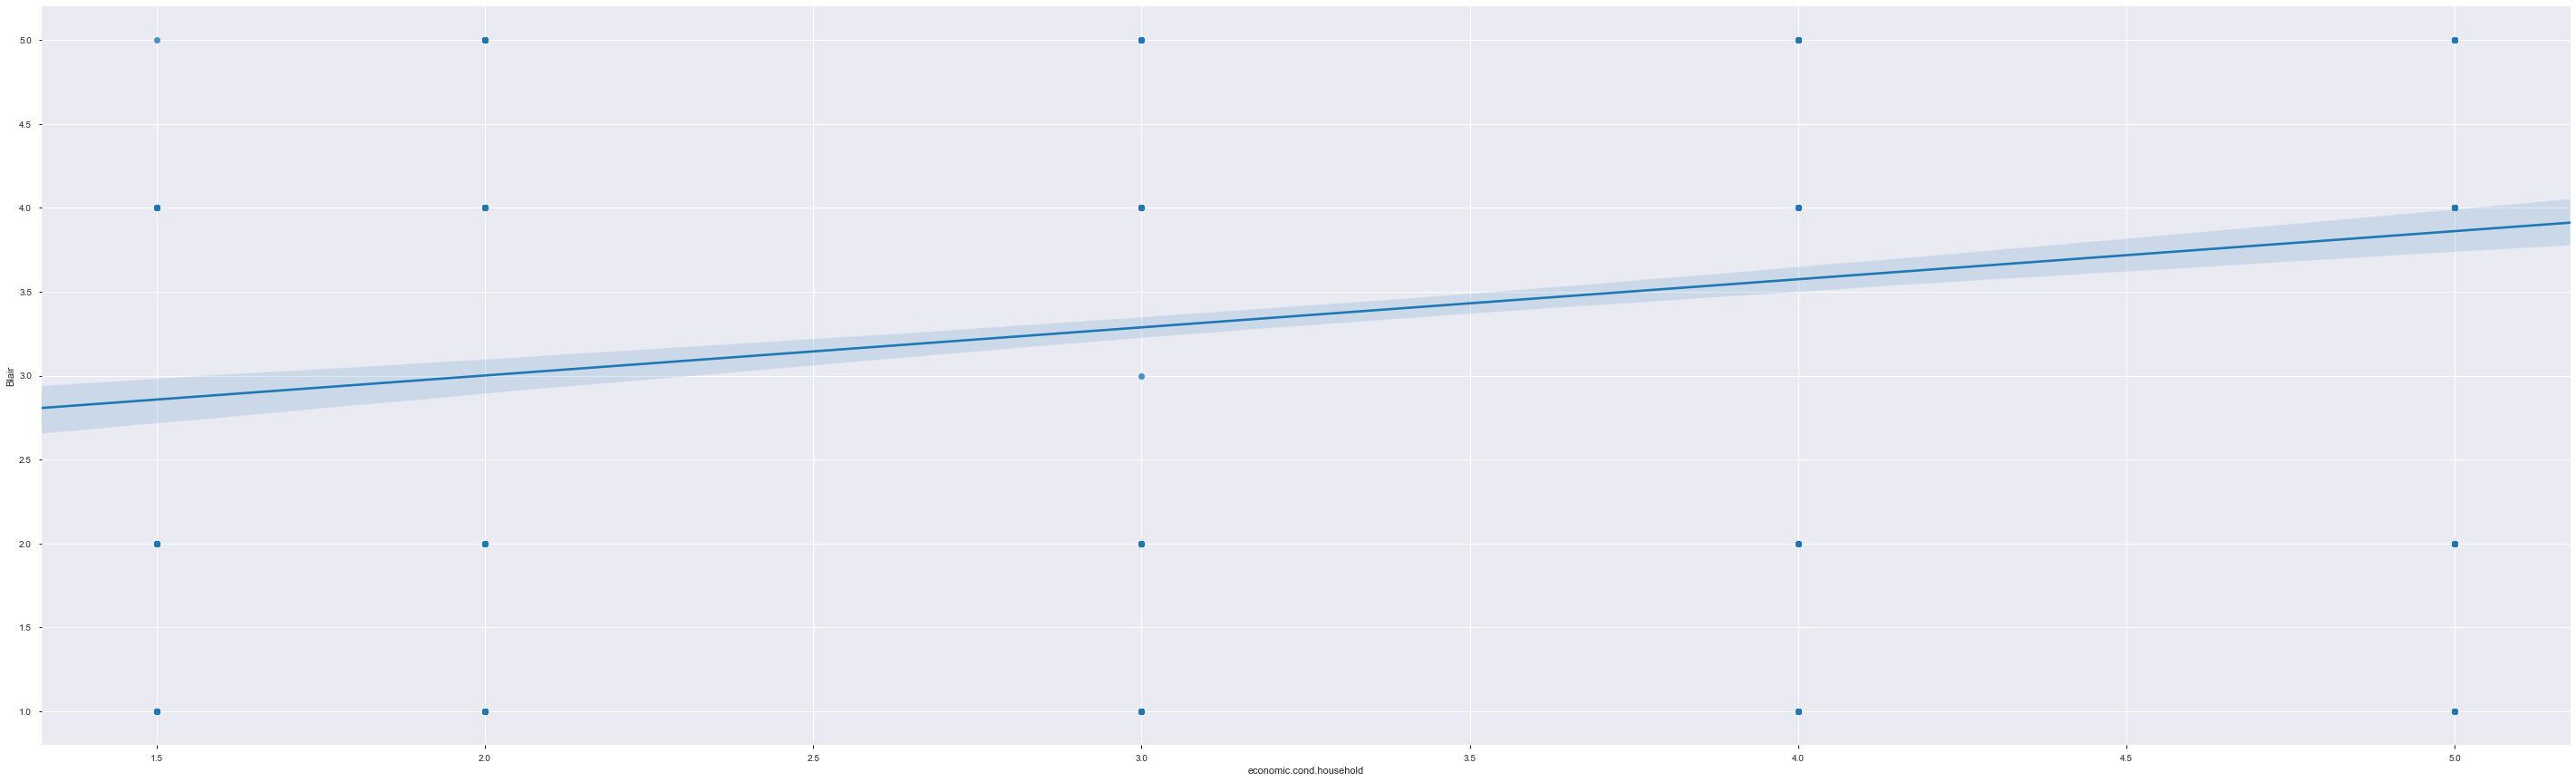

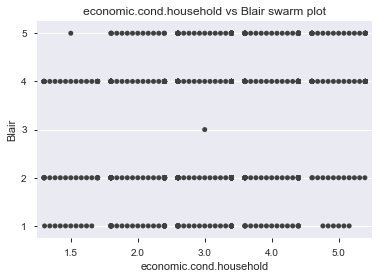

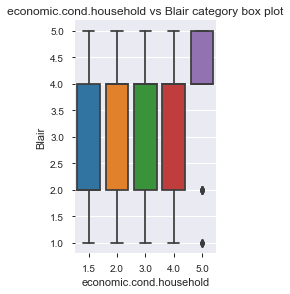

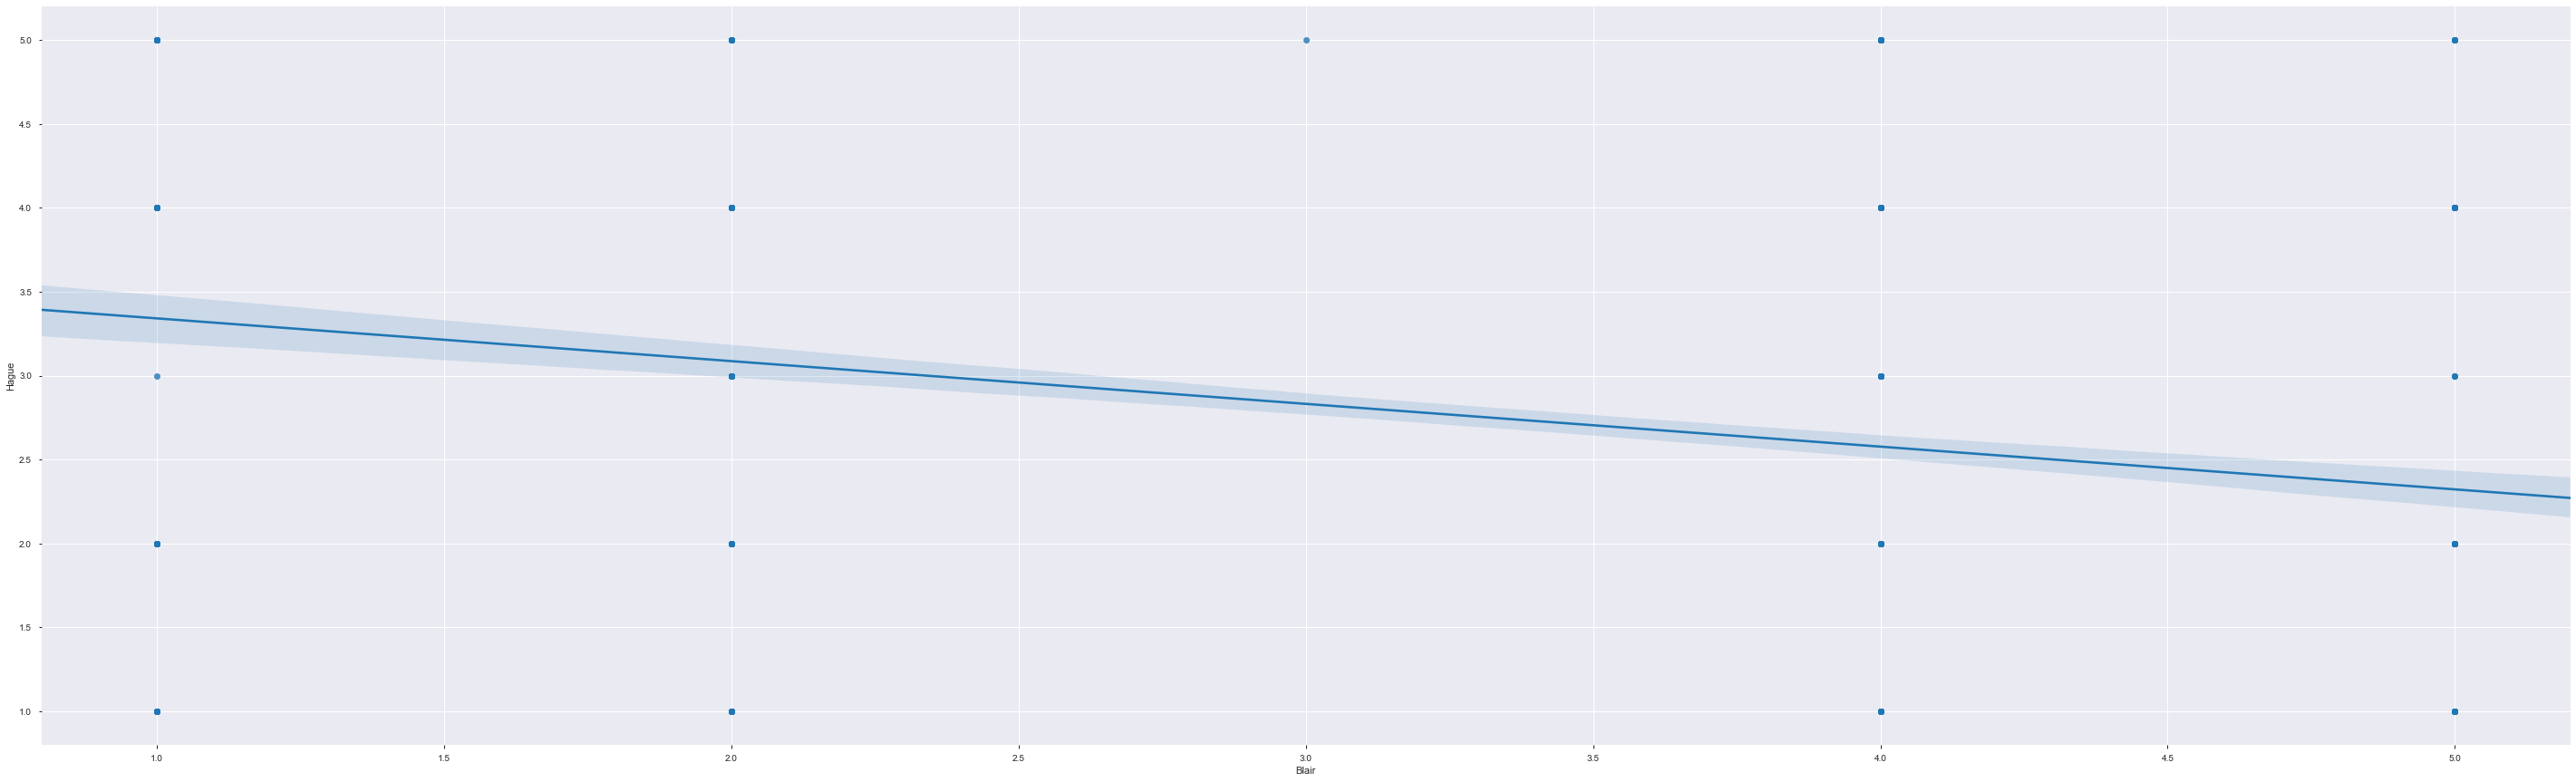

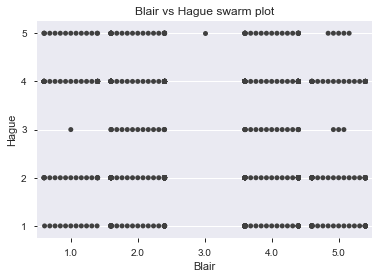

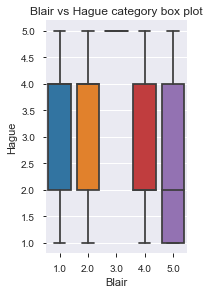

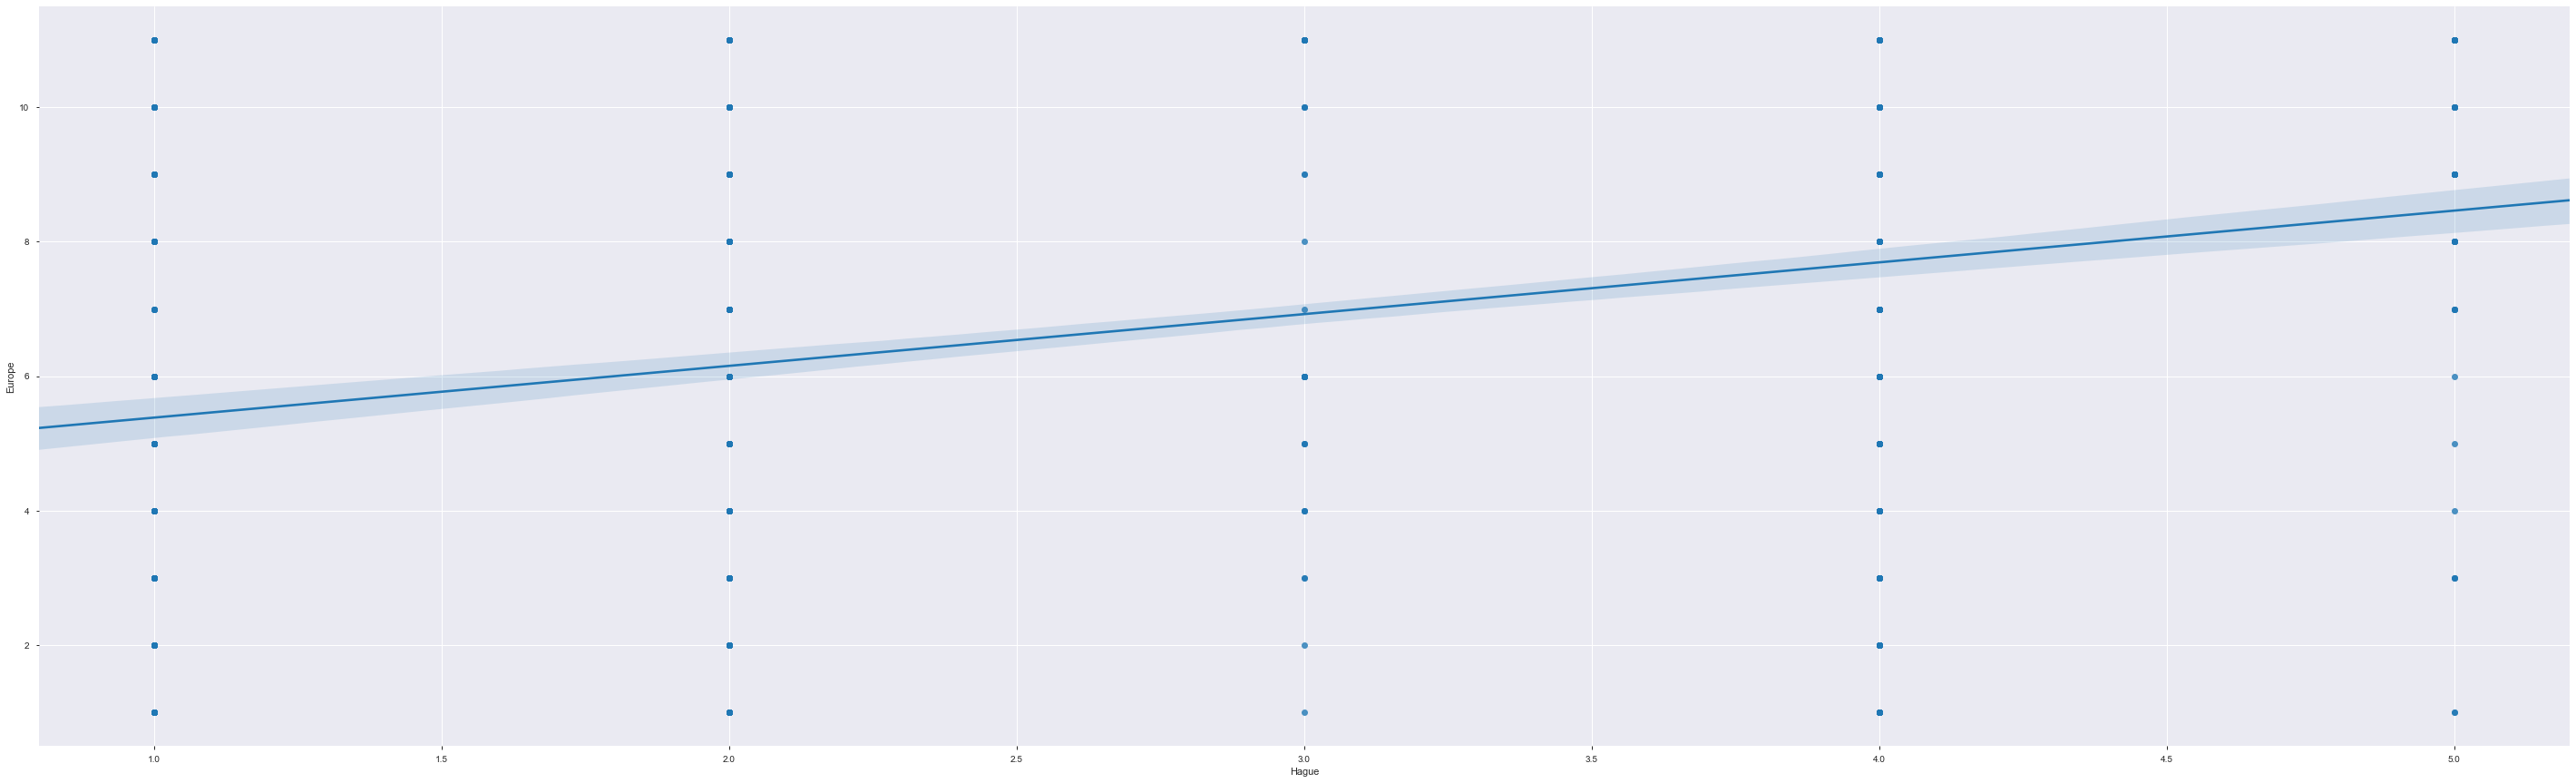

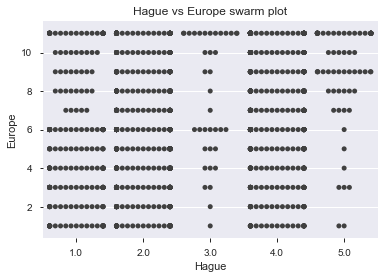

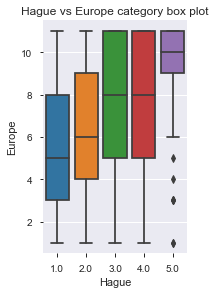

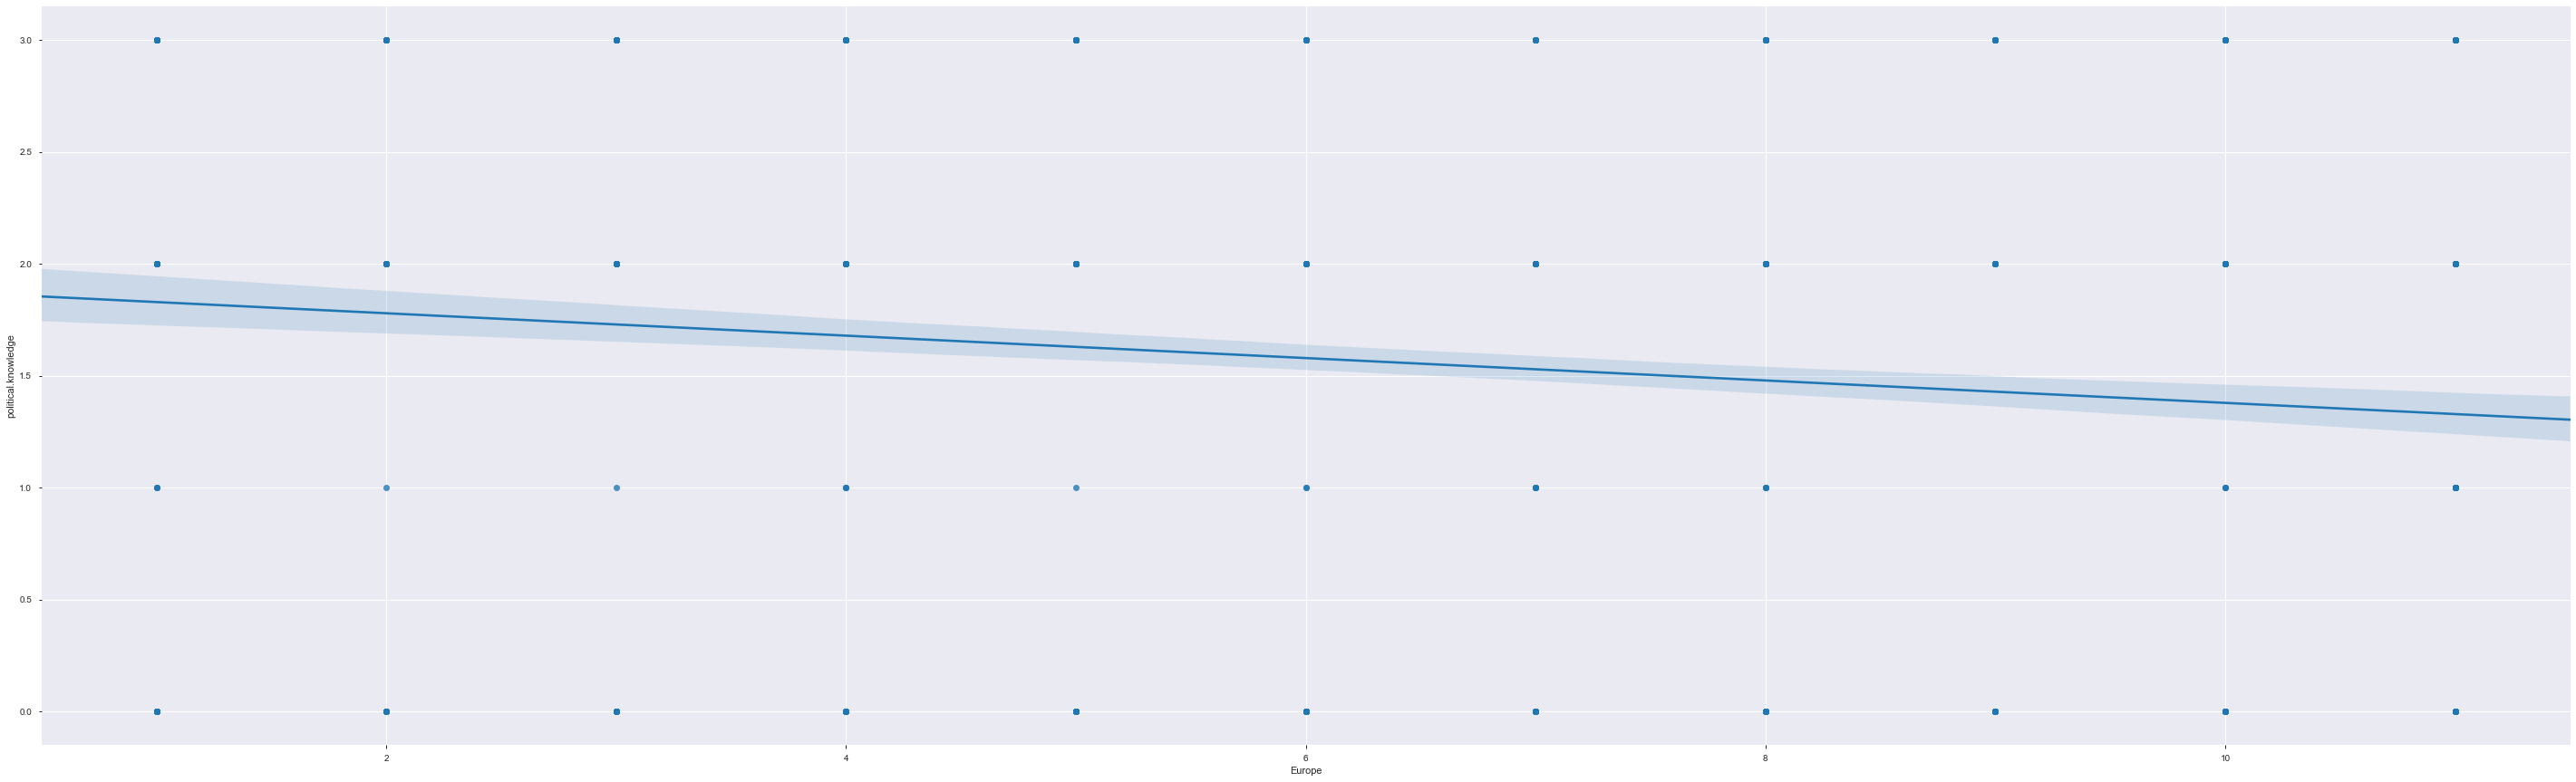

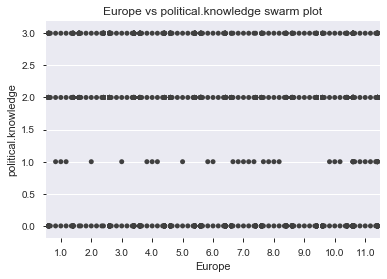

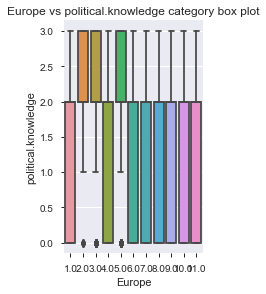

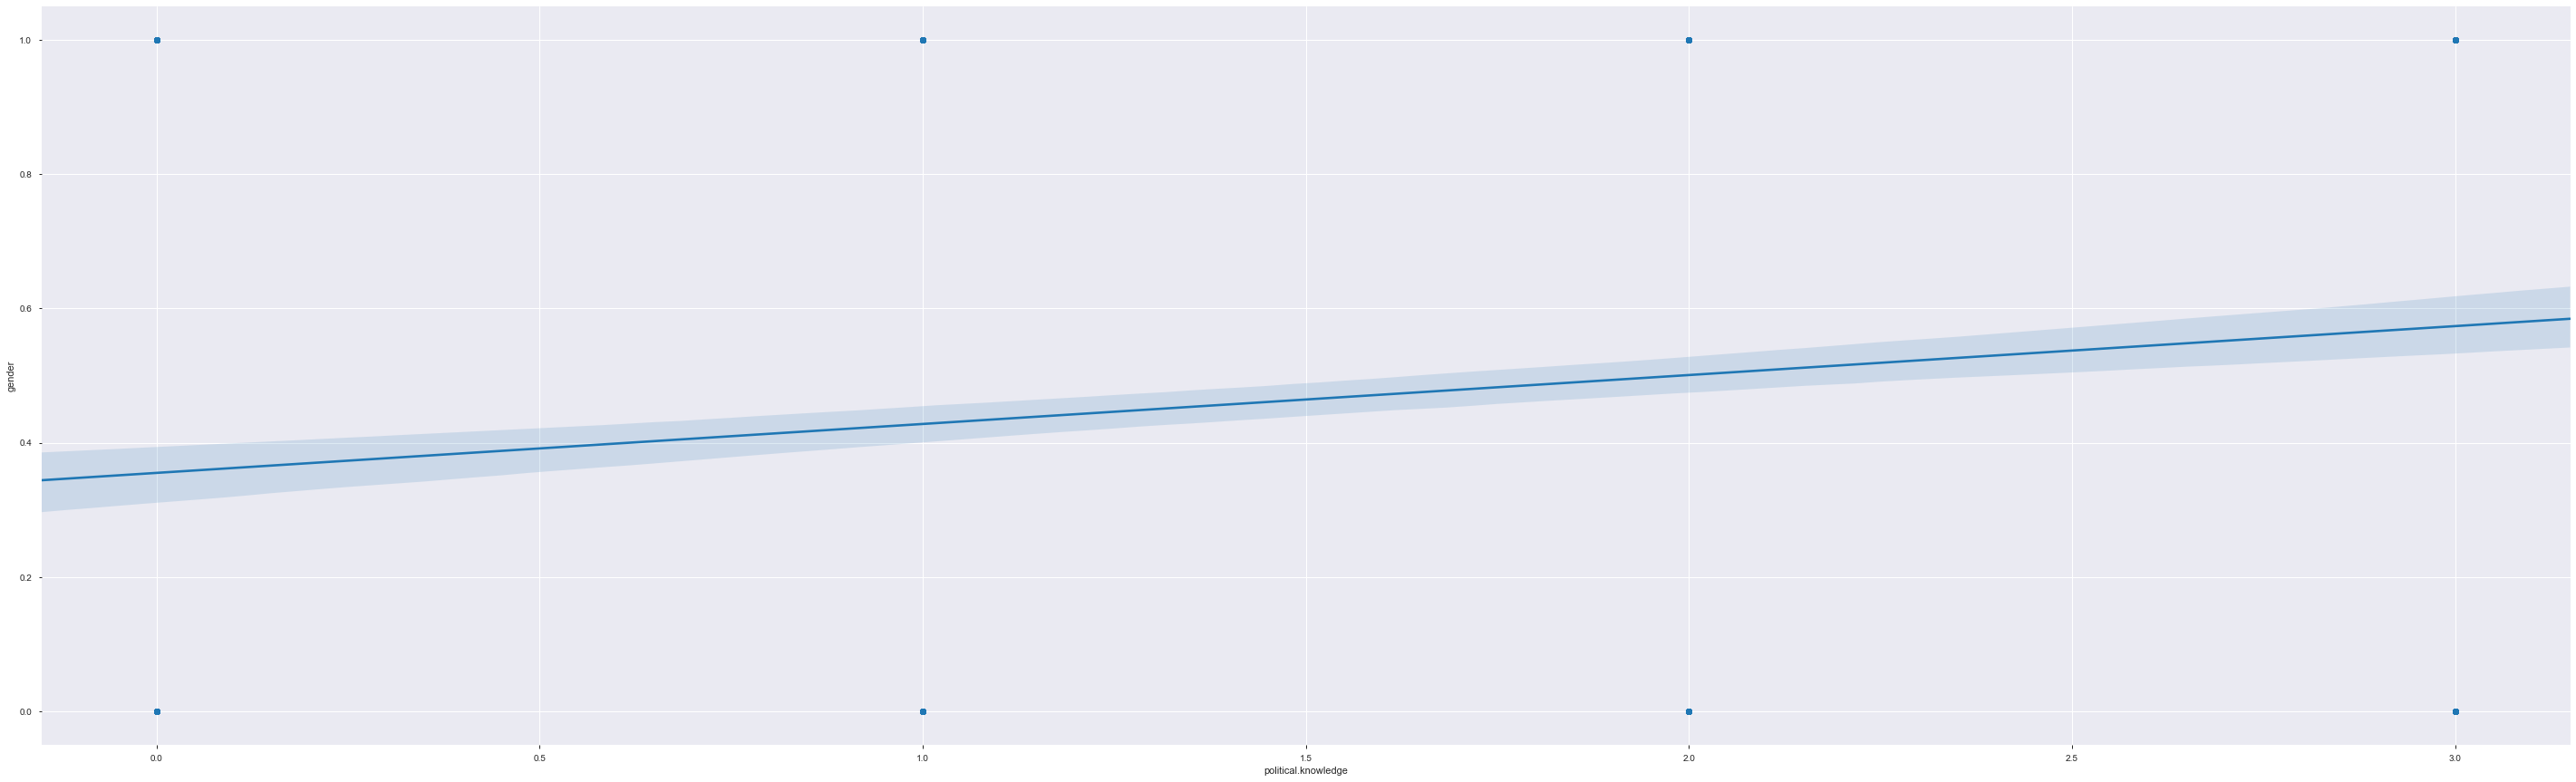

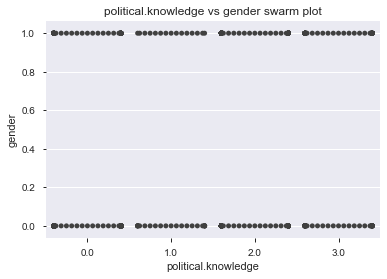

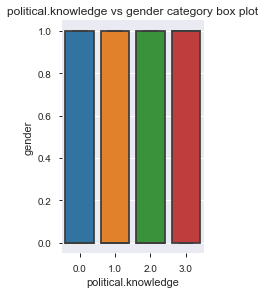

In [76]:
def regrswamcatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,8):
            figure = plt.figure(figsize=(50,15))
            sns.regplot(x=colnames[i], y=colnames[i+1], data=data)
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
            
            sns.swarmplot(x=colnames[i], y=colnames[i+1], data=data,color=".25")
            plt.title(colnames[i]+ " vs "+colnames[i+1]+" swarm plot")
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
            
            sns.catplot(x=colnames[i], y=colnames[i+1],data=data, kind="box",height=4, aspect=.7)
            plt.title(colnames[i]+ " vs "+colnames[i+1]+" category box plot")
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
regrswamcatplot(data)

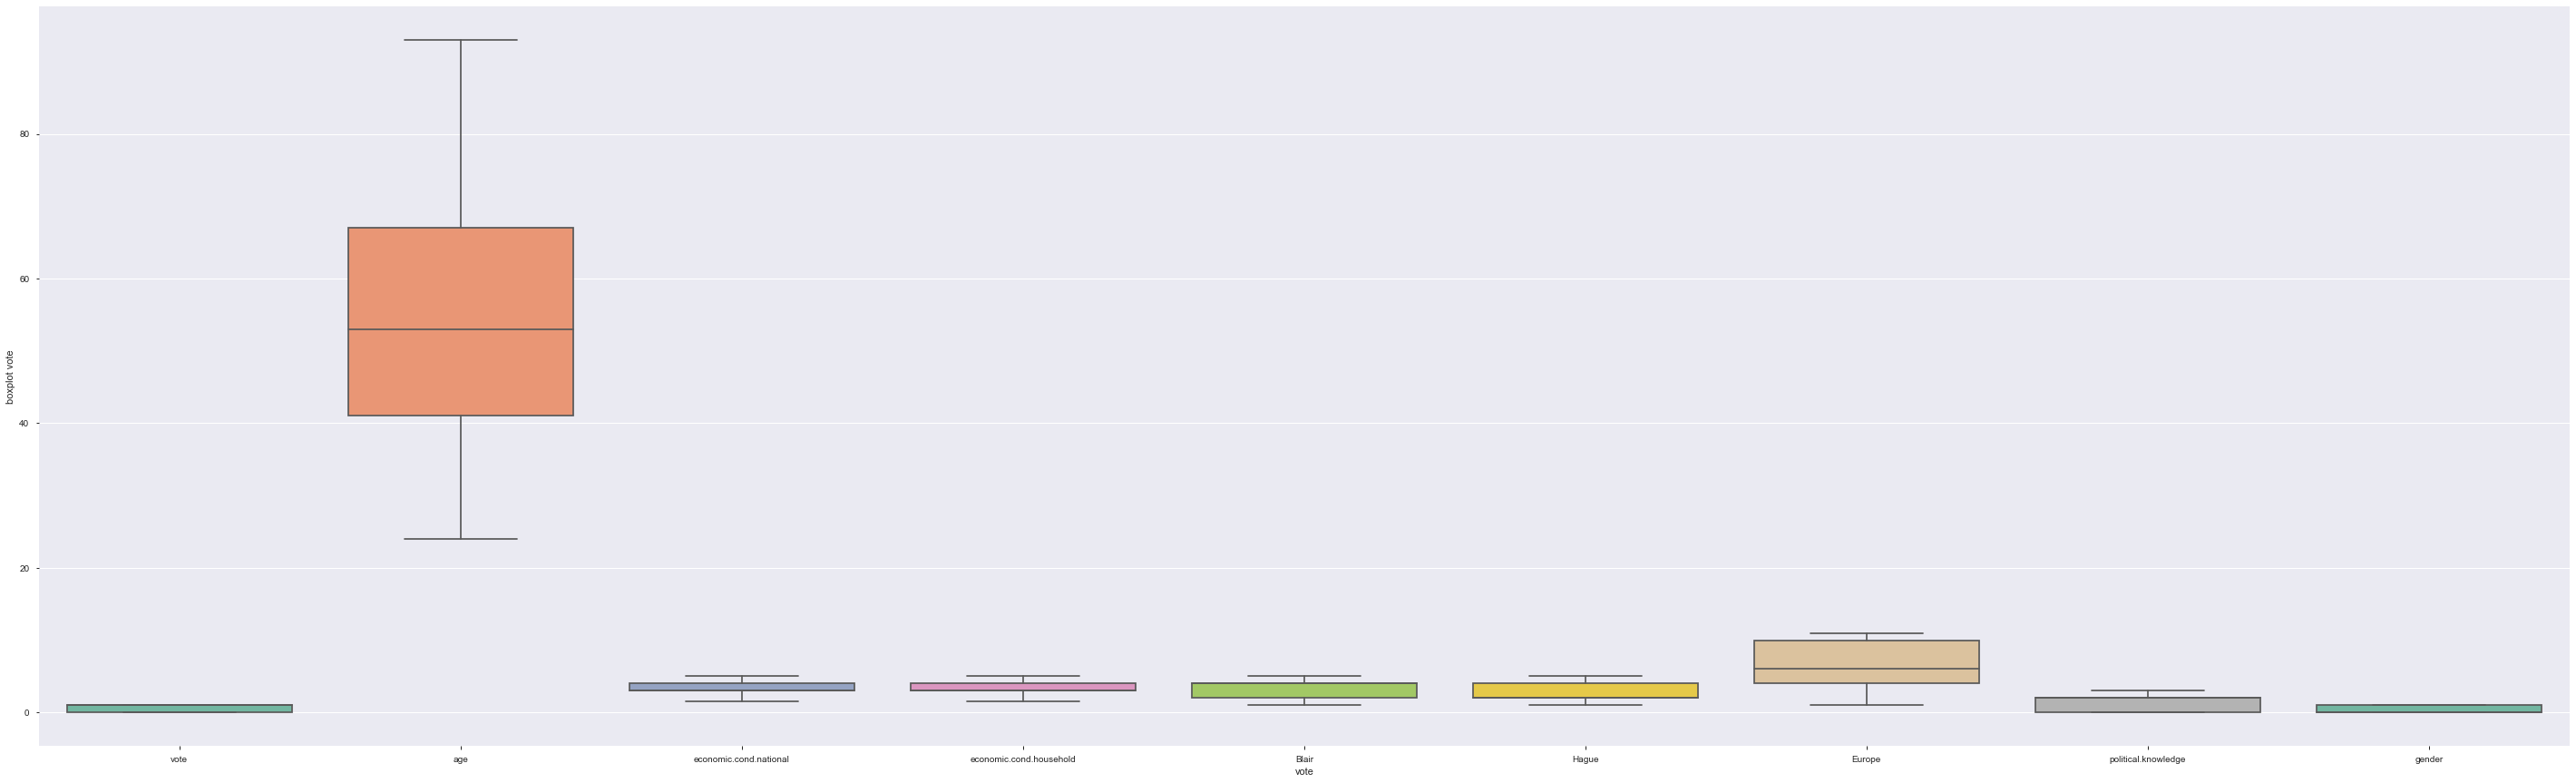

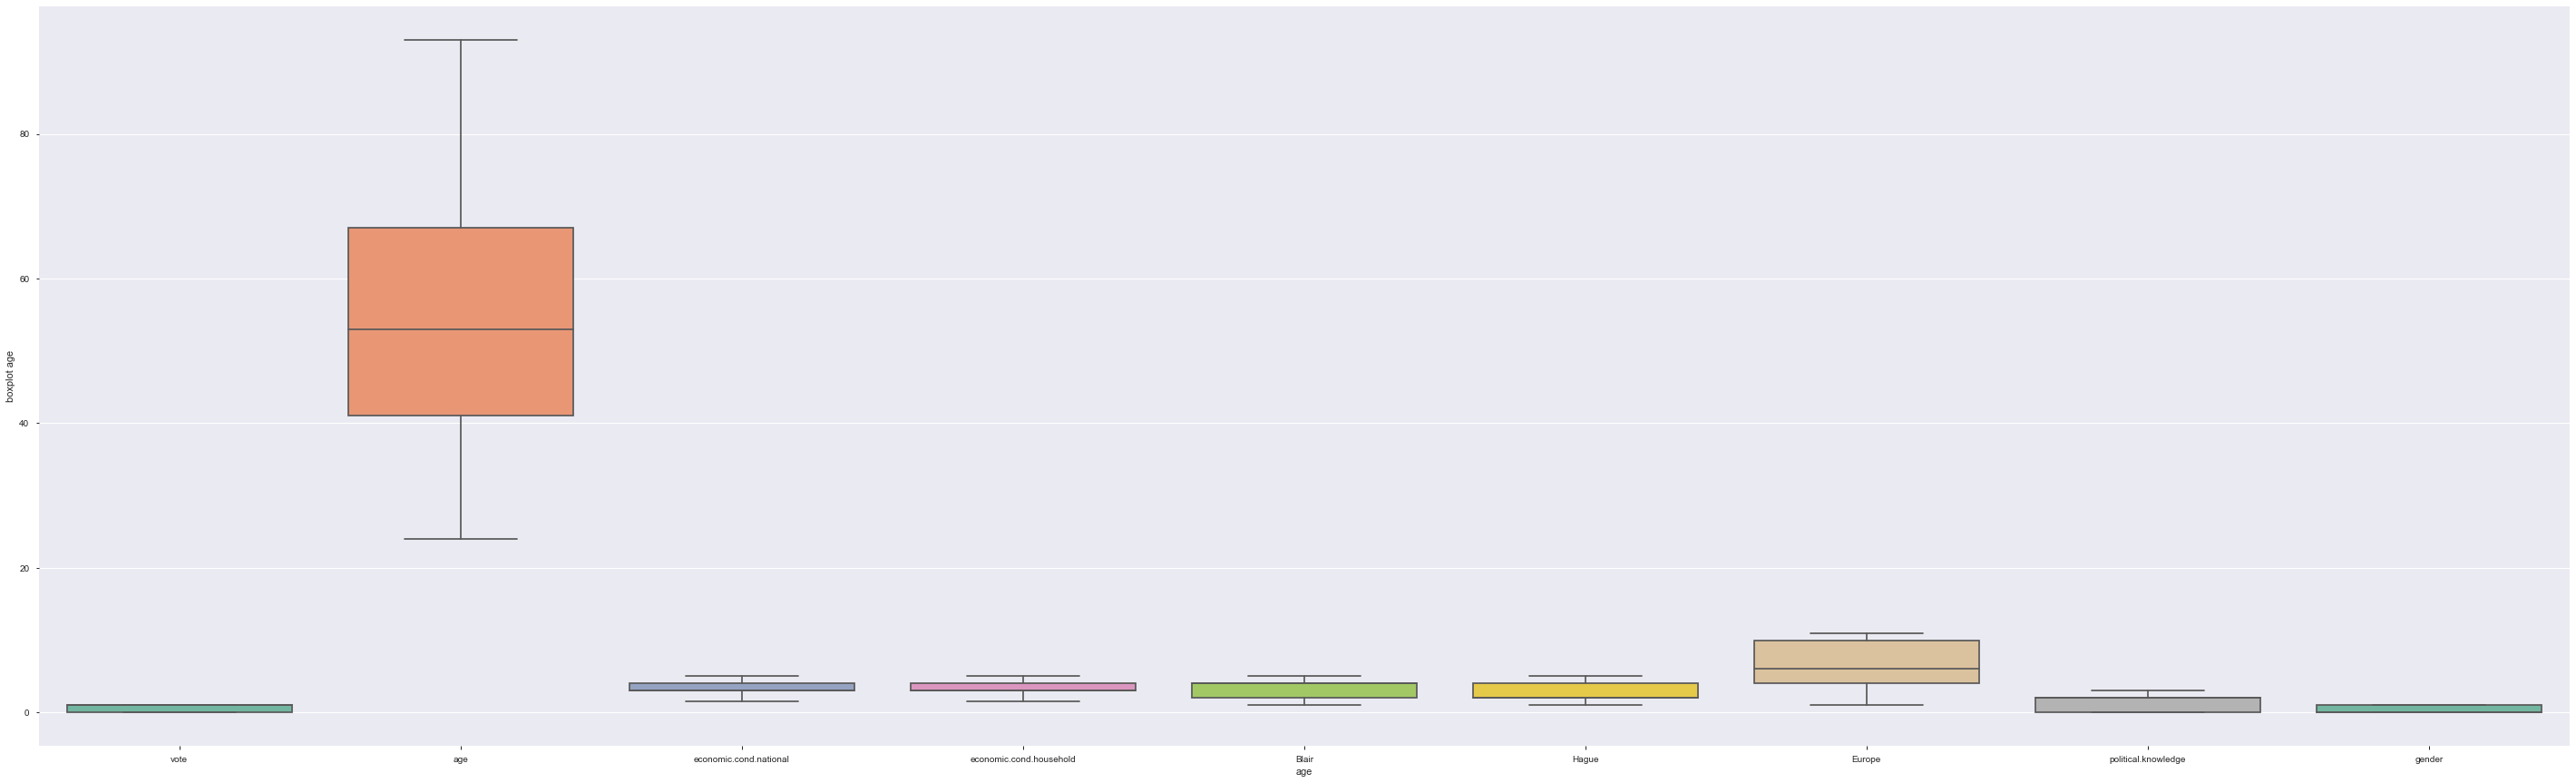

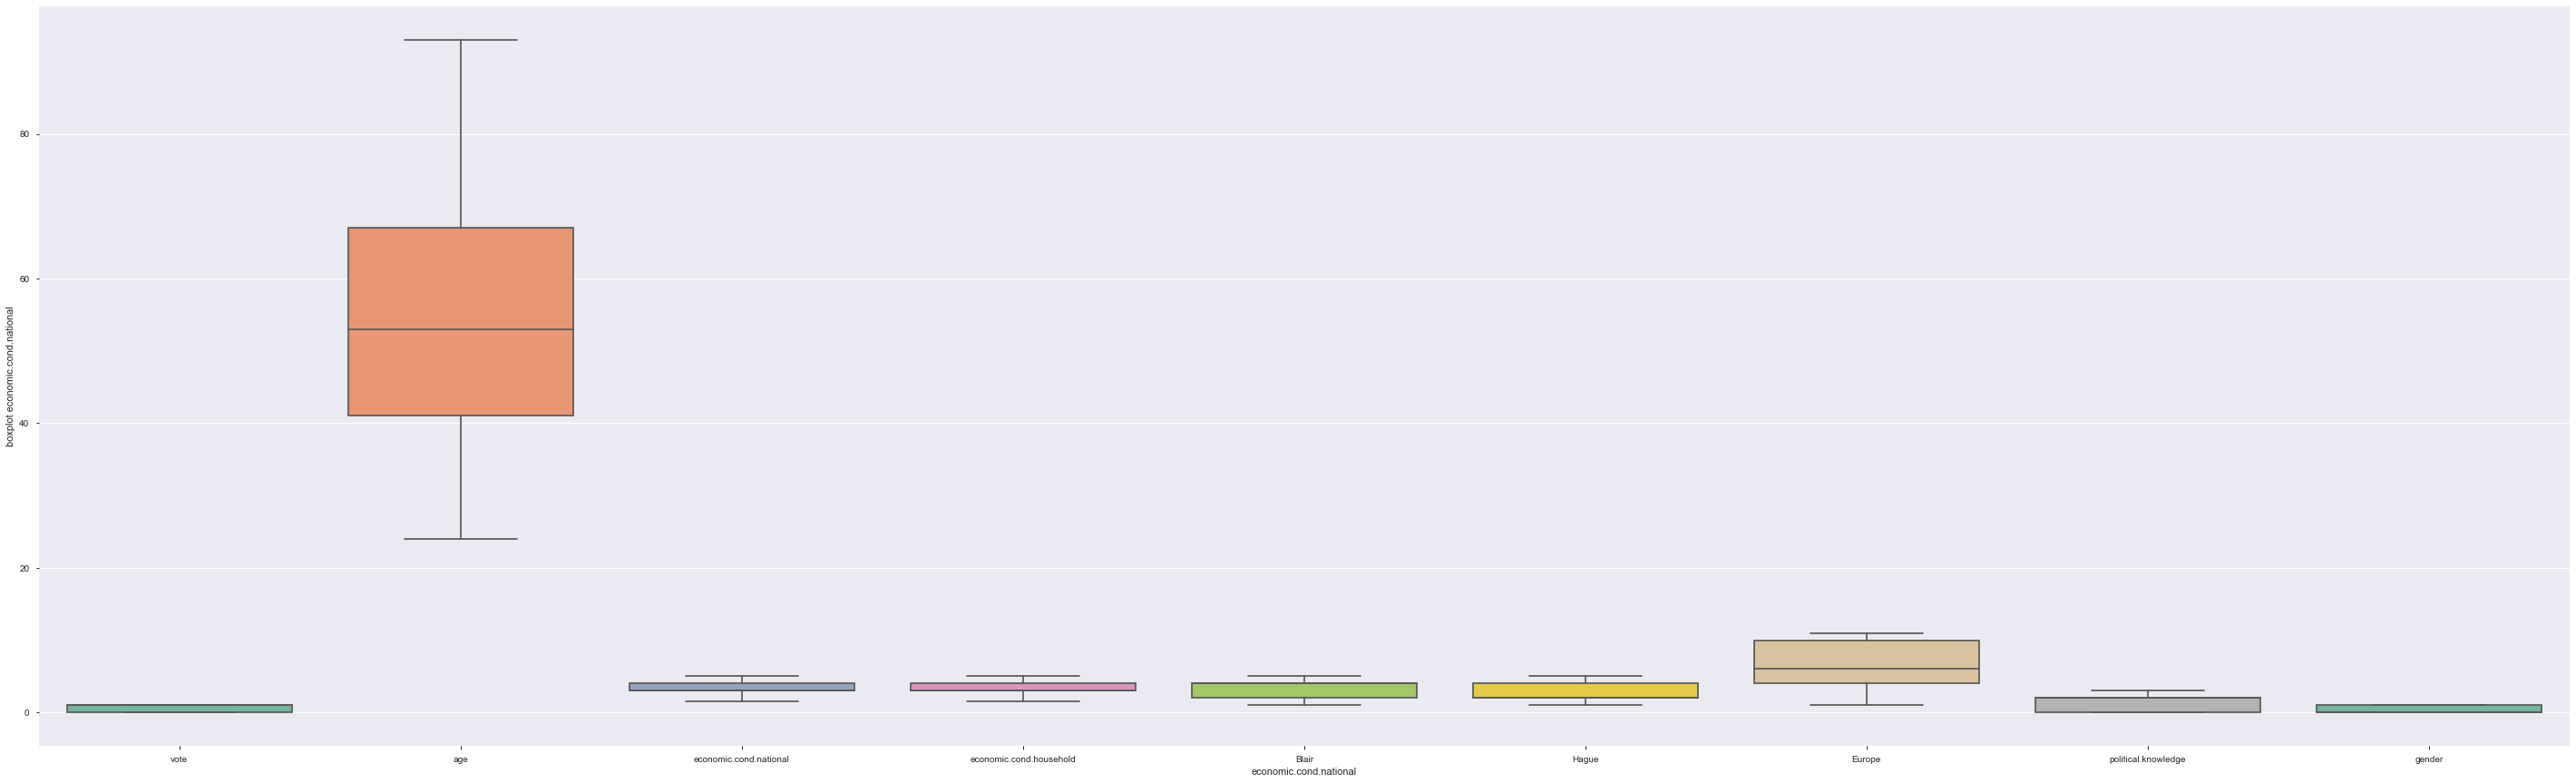

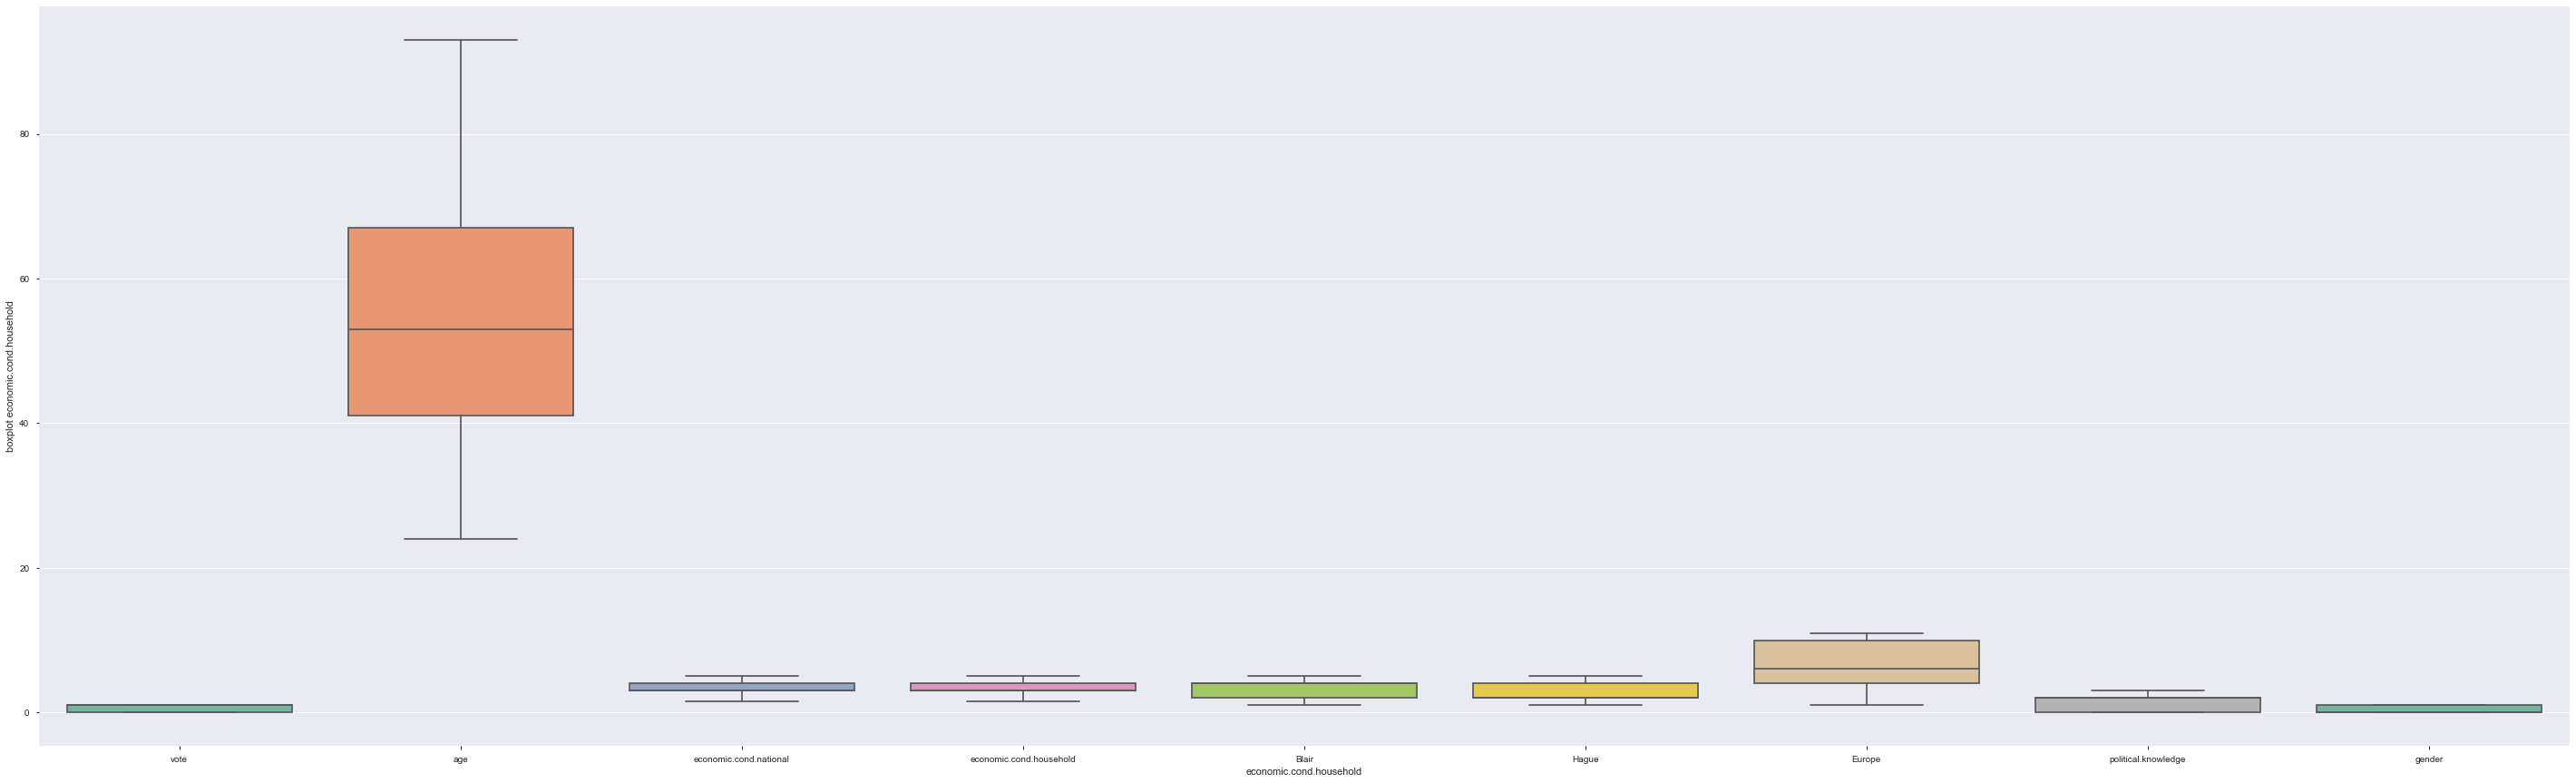

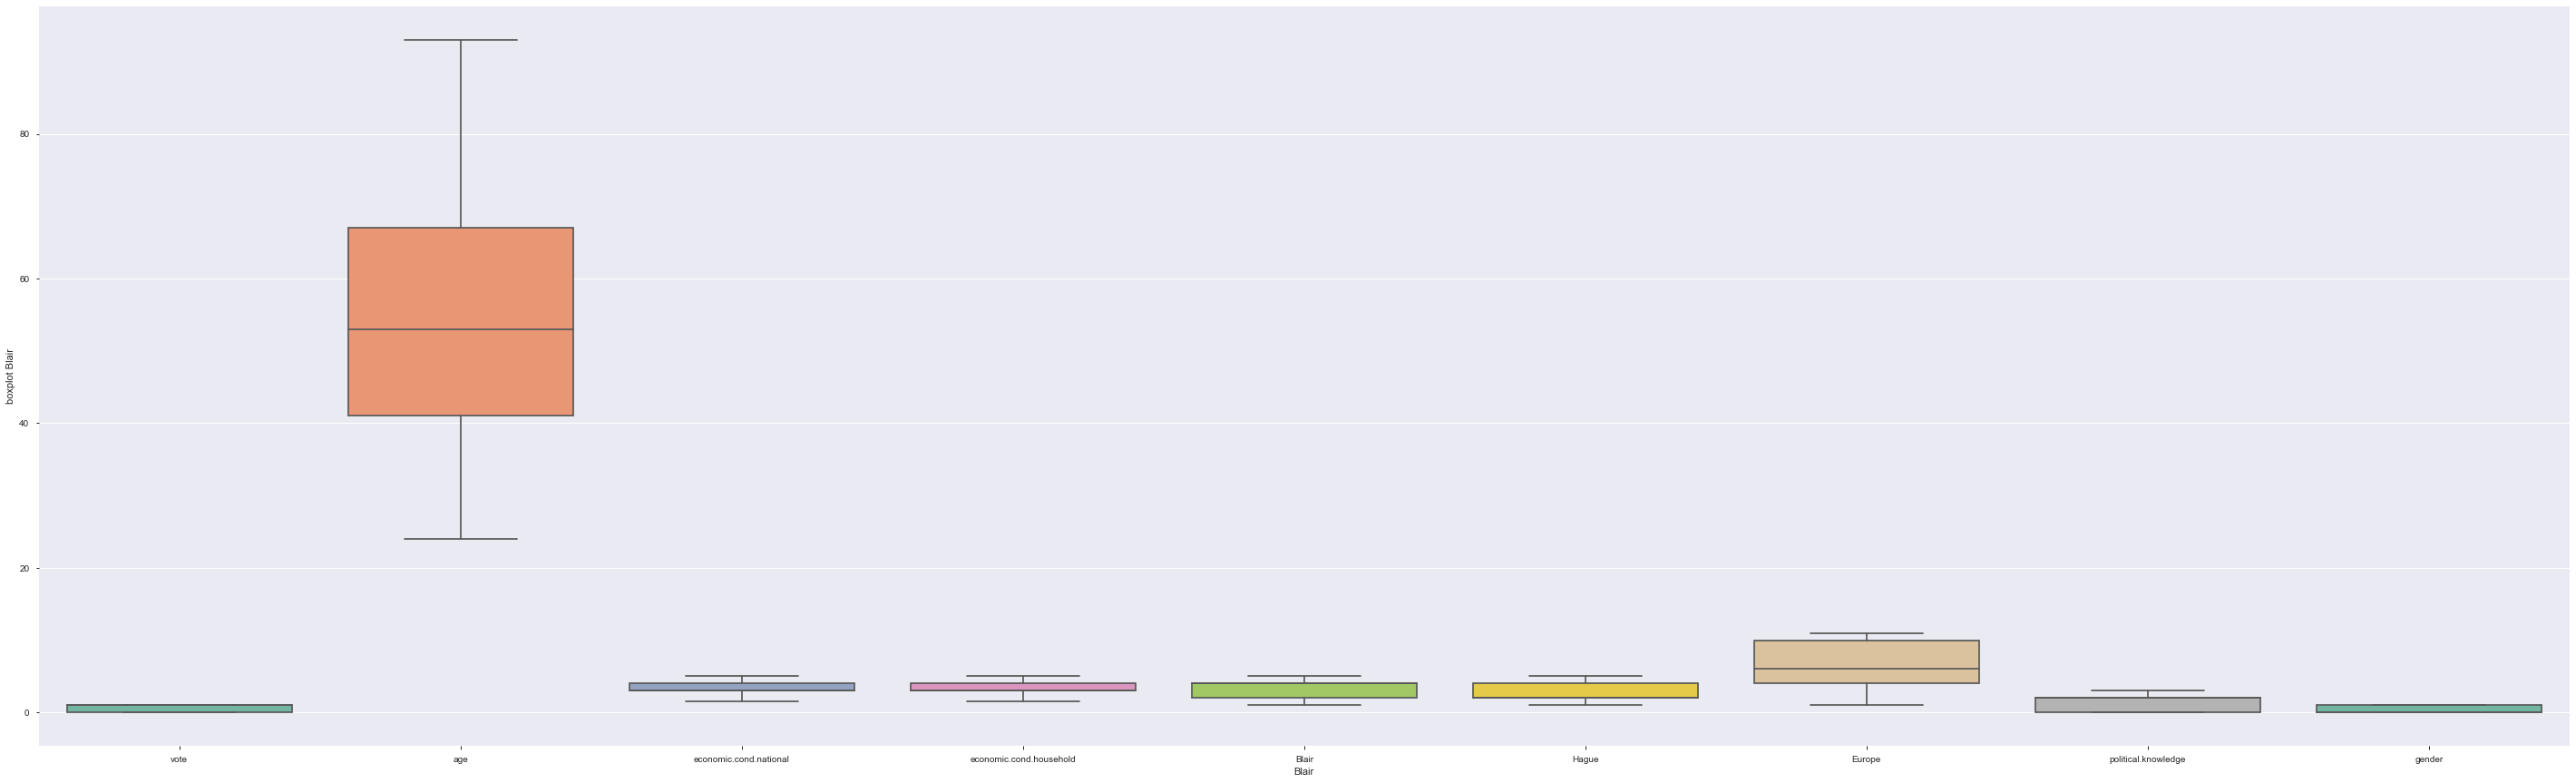

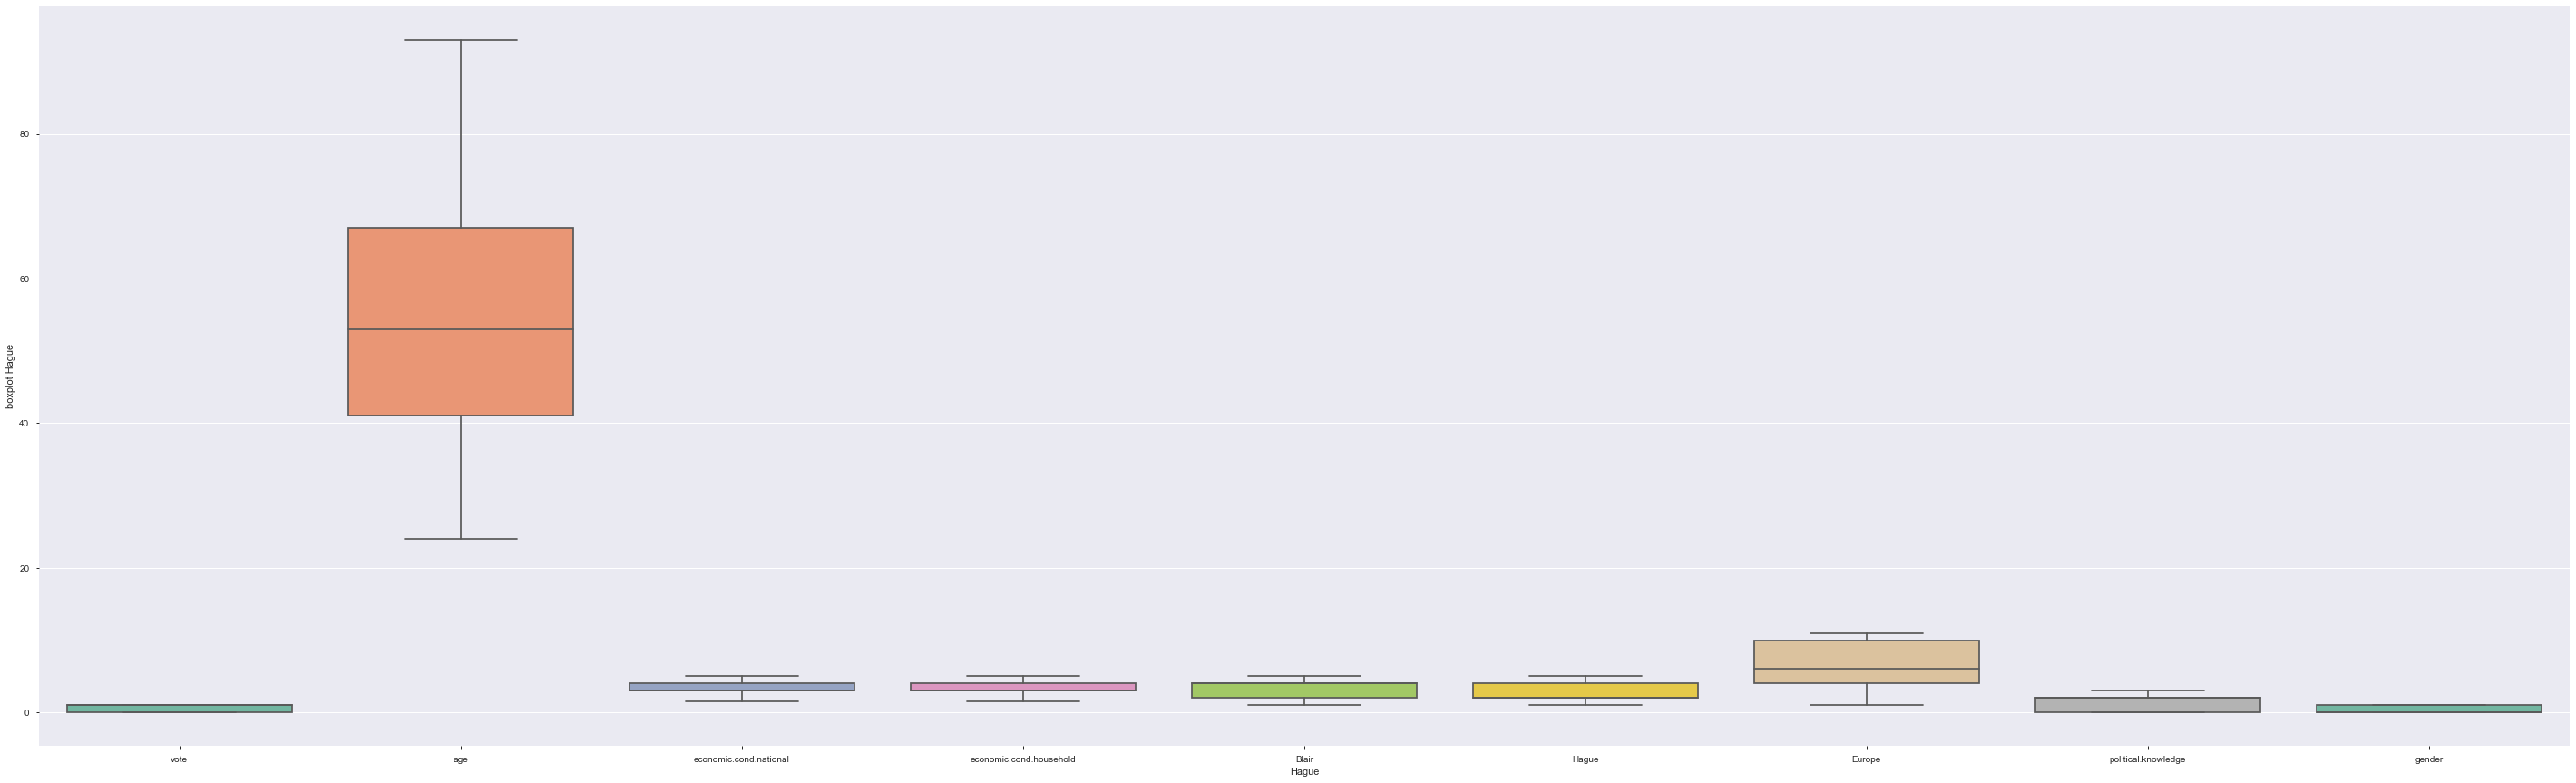

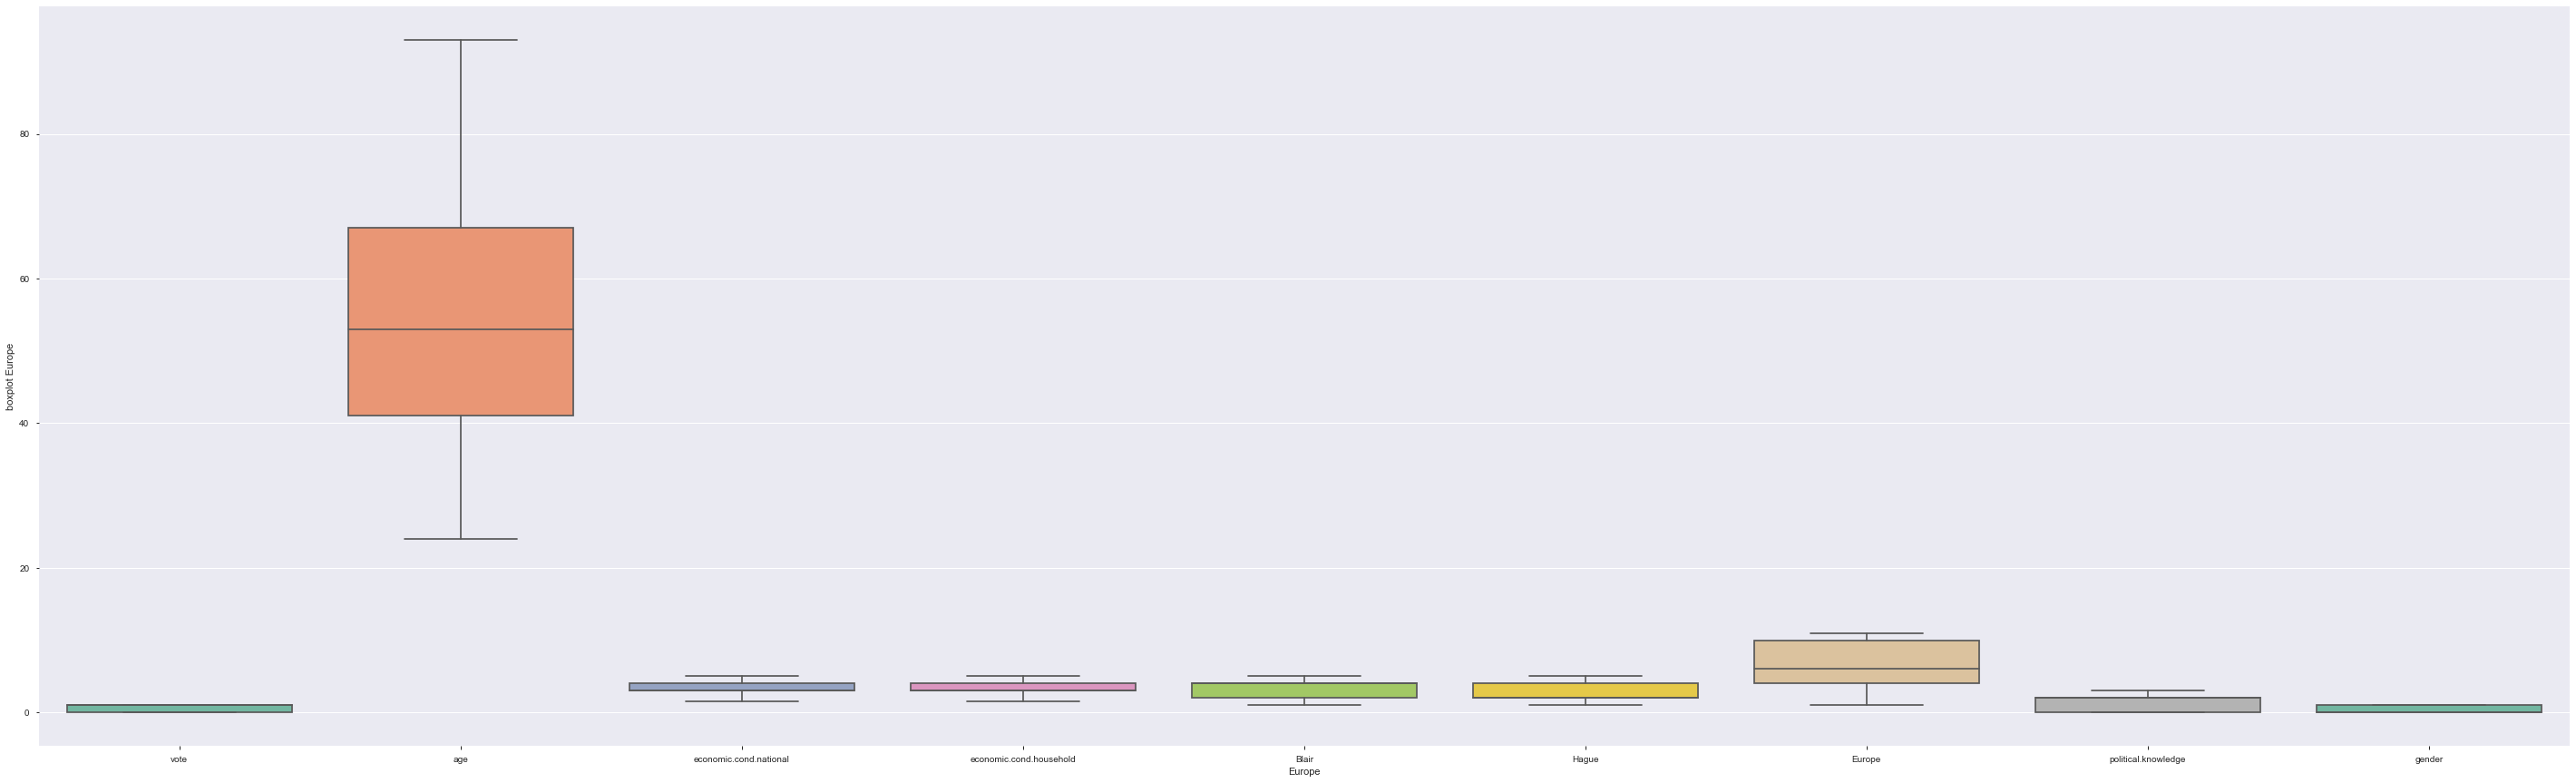

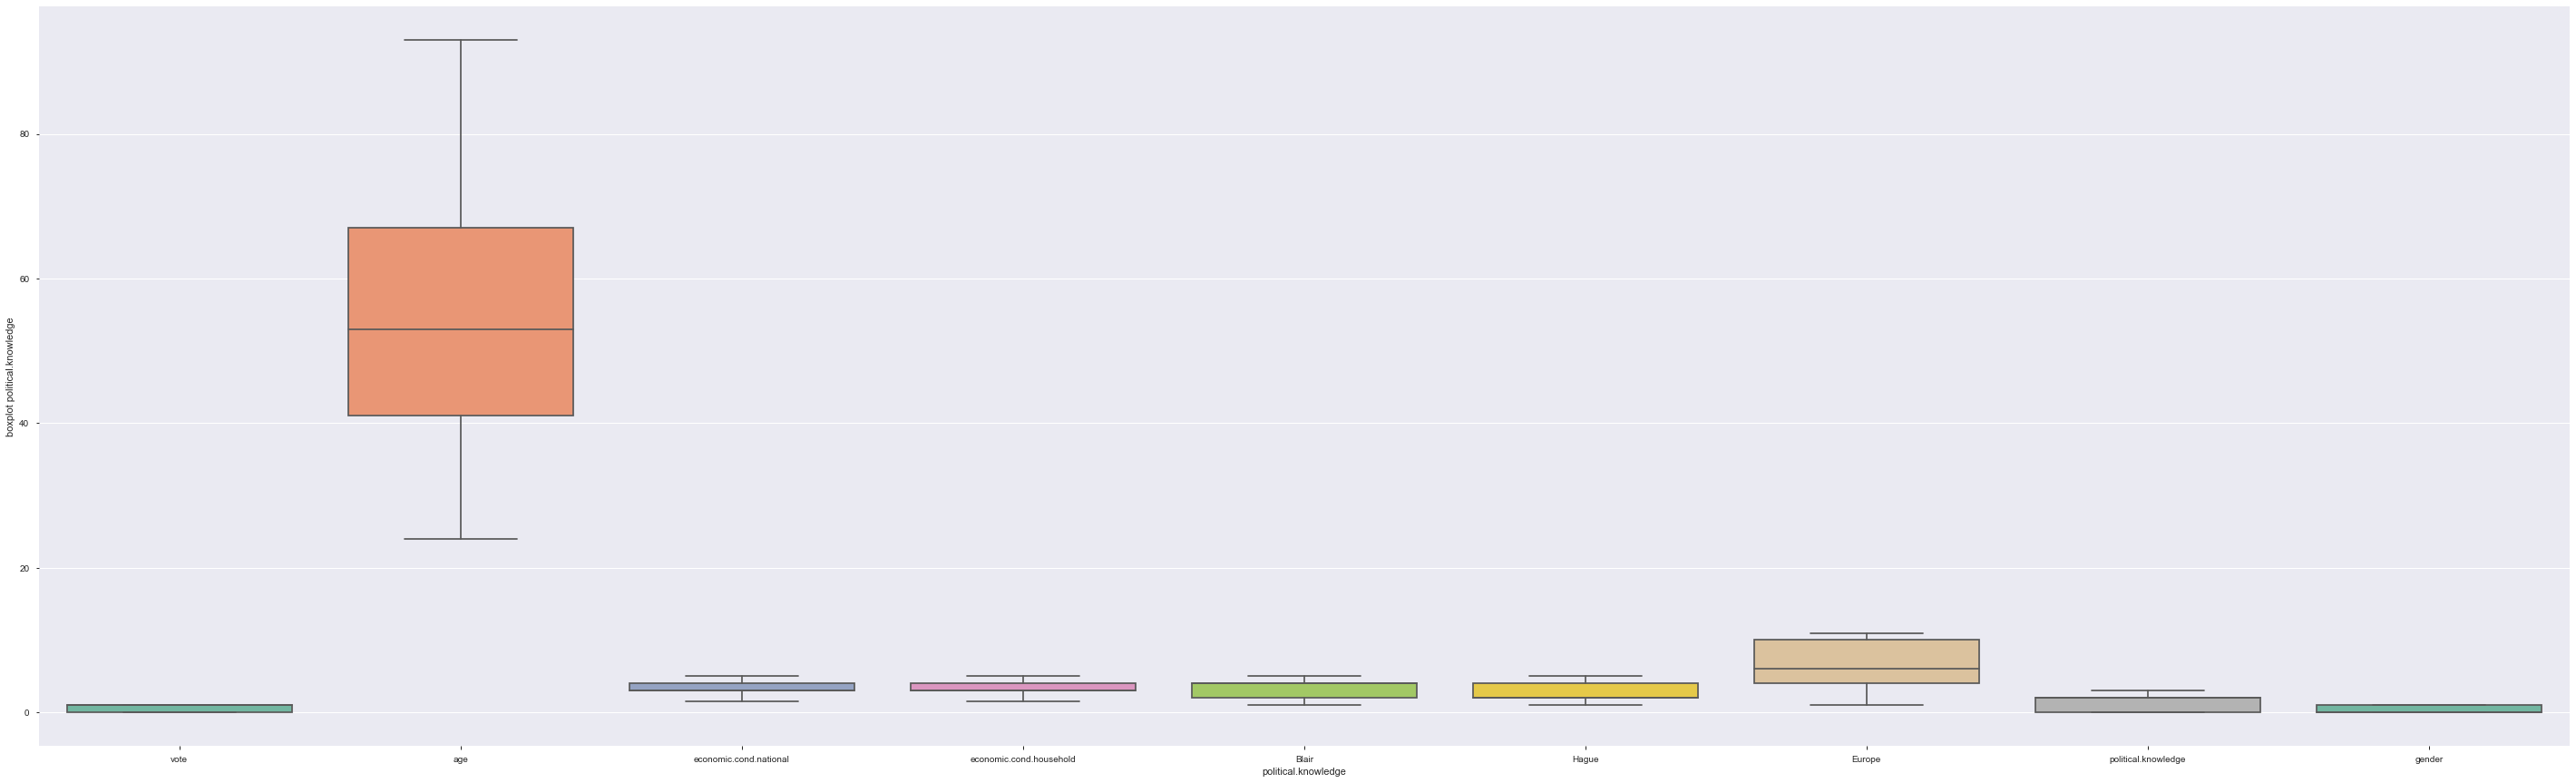

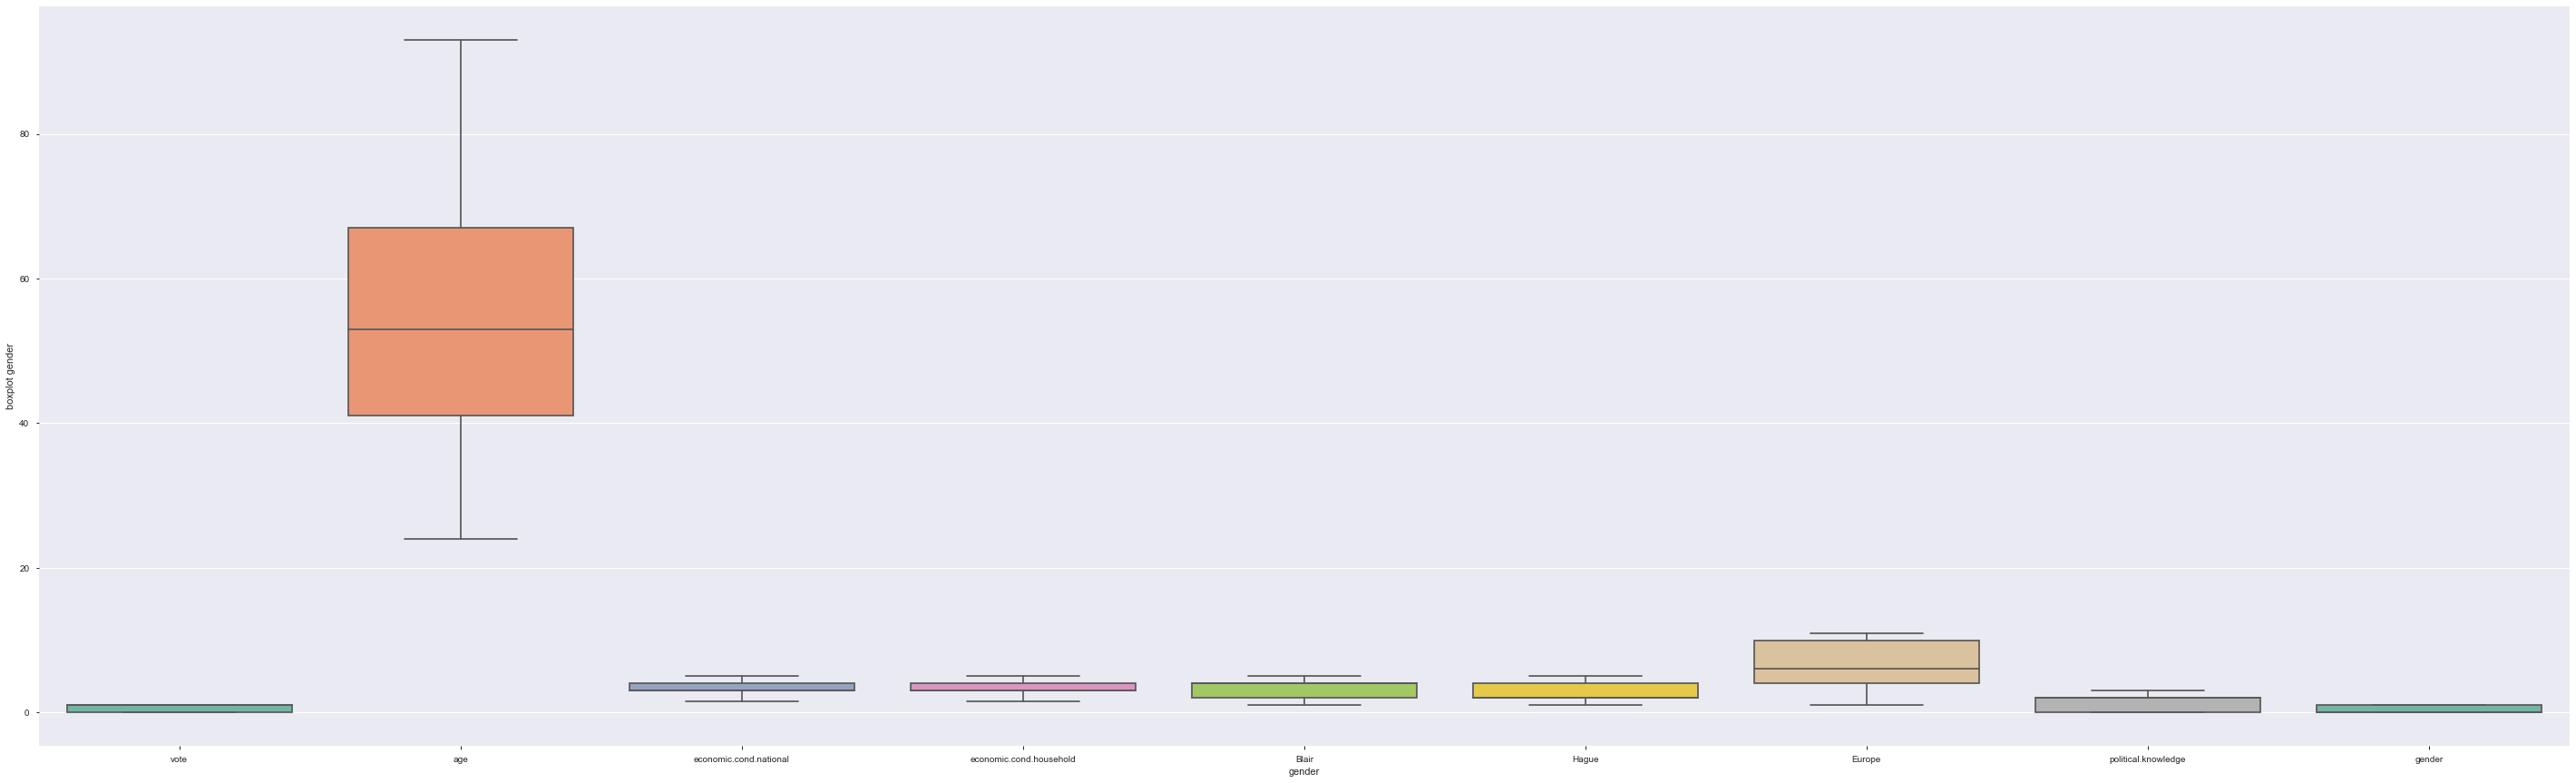

In [77]:
def boxplot(data):
        colnames=list(data.columns.values)
        for i in range(0,9):
            figure = plt.figure(figsize=(50,15))
            sns.boxplot(data=data, orient="v", palette="Set2")
            plt.xlabel(colnames[i])
            plt.ylabel("boxplot "+colnames[i])
            plt.show()
boxplot(data)

In [78]:
# def modedev(modelname,modeltype):
#     x = data.drop(columns=["vote"])
#     y = data["vote"]
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
#     sc = StandardScaler()
#     x_train = sc.fit_transform(x_train)
#     x_test = sc.transform(x_test)
#     sm = SMOTE(random_state=2)
#     x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
#     if modelname=="NB":
#         model = GaussianNB()
#     if modelname=="Logit":
#         model = LogisticRegression()
#     if modelname=="Tree":
#         model = tree.DecisionTreeClassifier()
#     if modelname=="RF":
#         model = RandomForestClassifier(n_estimators=100)
#     if modelname=="SVM":
#         model = svm.SVC()
#     if modelname=="LDA":
#         model = LinearDiscriminantAnalysis()
#     if modelname=="Adaboost":
#         model = AdaBoostClassifier(n_estimators=100)
#     if modelname=="KNN":
#         model = KNeighborsClassifier()
#     if modelname=="XGB":
#         model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)     
#     if modeltype=="normal":
#         model=model.fit(x_train, y_train)
#     if modeltype=="Smote":
#         model=model.fit(x_train_res, y_train_res)
        
#     y_predict = model.predict(x_test)
#     model_score = model.score(x_test, y_test)
#     print("model type {} model name {} model score {}\n".format(modeltype,modelname,model_score))
#     print("model type {} model name {} Conf mat score {}\n".format(modeltype,modelname,metrics.confusion_matrix(y_test, y_predict)))
       
#     # cross validation
#     scores = cross_val_score(model, x_train, y_train, cv=10)
#     print("model type {} model name {} model cv score {}\n".format(modeltype,modelname,scores))
        
        #smote score
#         model=model.fit(x_train_res, y_train_res)
#         y_predict = model.predict(x_test)
#         model_score = model.score(x_test, y_test)
#         print("model name {} model score {}\n".format(modelname,model_score))
#         print("model name {} Conf mat score {}\n".format(modelname,metrics.confusion_matrix(y_test, y_predict)))

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
x = data.drop(columns=["vote"])
y = data["vote"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

model = LogisticRegression()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

y train pred head 
           0         1
0  0.778518  0.221482
1  0.332500  0.667500
2  0.310739  0.689261
3  0.282493  0.717507
4  0.100479  0.899521
y test pred head 
           0         1
0  0.778518  0.221482
1  0.332500  0.667500
2  0.310739  0.689261
3  0.282493  0.717507
4  0.100479  0.899521
model cv score [0.785 0.822 0.869 0.85  0.832 0.822 0.794 0.925 0.83  0.802]



AUC: 0.897


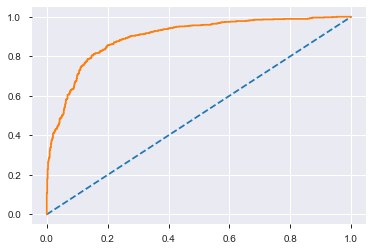

In [80]:
# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr)

AUC: 0.882


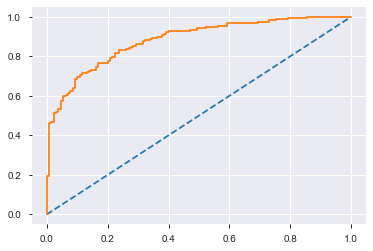

In [81]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr)

In [82]:
print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
logit_train_acc=model.score(x_train_res,y_train_res) 
print(logit_train_acc)
print(classification_report(y_train_res, ytrain_predict))
logit_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_precision=round(df.loc["1.0"][1],2)
logit_train_recall=round(df.loc["1.0"][2],2)
logit_train_f1=round(df.loc["1.0"][0],2)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

[[602 133]
 [126 609]]
0.8238095238095238
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       735
         1.0       0.82      0.83      0.82       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470

logit_train_precision  0.82
logit_train_recall  0.83
logit_train_f1  0.82


In [83]:
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
logit_test_acc=model.score(x_test,y_test)
print(logit_test_acc)
print(classification_report(y_test, ytest_predict))
logit_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_precision=round(df.loc["1.0"][1],2)
logit_test_recall=round(df.loc["1.0"][2],2)
logit_test_f1=round(df.loc["1.0"][0],2)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

[[101  29]
 [ 64 264]]
0.7969432314410481
              precision    recall  f1-score   support

         0.0       0.61      0.78      0.68       130
         1.0       0.90      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.80      0.80       458

logit_test_precision  0.9
logit_test_recall  0.8
logit_test_f1  0.85


Confusion matrix, without normalization testing set
[[101  29]
 [ 64 264]]


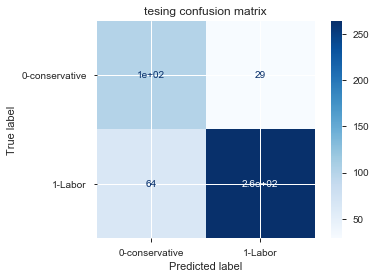

Confusion matrix, without normalization training set
[[602 133]
 [126 609]]


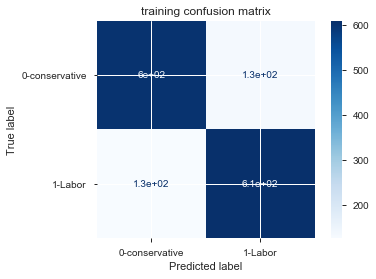

Normalized confusion matrix testing set
[[0.777 0.223]
 [0.195 0.805]]


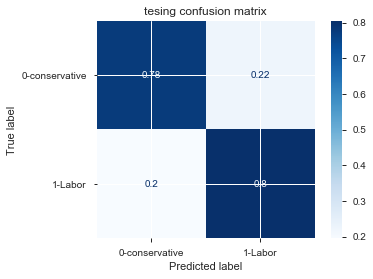

Normalized confusion matrix training set
[[0.819 0.181]
 [0.171 0.829]]


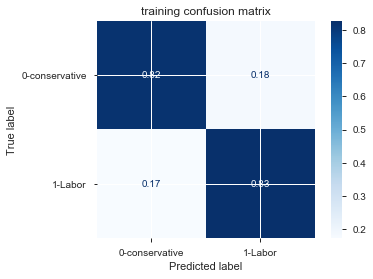

In [84]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

def plotconftmat(class_names, y_test, model):
    np.set_printoptions(precision=3)
    class_names = ["0-conservative", "1-Labor"] # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        test_disp = plot_confusion_matrix(model, x_test, y_test, 
            display_labels=class_names, 
            cmap=plt.cm.Blues, 
            normalize=normalize)
        test_disp.ax_.set_title(title)
        print(title + " testing set")
        print(test_disp.confusion_matrix)
        plt.title("tesing confusion matrix")
        plt.show()
        train_disp = plot_confusion_matrix(model, x_train_res, y_train_res, 
            display_labels=class_names, 
            cmap=plt.cm.Blues, 
            normalize=normalize)
        train_disp.ax_.set_title(title)
        print(title + " training set")
        print(train_disp.confusion_matrix)
        plt.title("training confusion matrix")
        plt.show()
        
plotconftmat(class_names, y_test, model)

In [85]:
model = GaussianNB()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

y train pred head 
           0         1
0  0.876072  0.123928
1  0.422596  0.577404
2  0.136747  0.863253
3  0.313215  0.686785
4  0.021042  0.978958
y test pred head 
           0         1
0  0.876072  0.123928
1  0.422596  0.577404
2  0.136747  0.863253
3  0.313215  0.686785
4  0.021042  0.978958
model cv score [0.813 0.822 0.822 0.85  0.813 0.813 0.832 0.887 0.821 0.821]



In [86]:
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
NaiveBayes_test_acc=model.score(x_test,y_test)
print(NaiveBayes_test_acc)
print(classification_report(y_test, ytest_predict))
NaiveBayes_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(NaiveBayes_metrics).transpose()
NaiveBayes_test_precision=round(df.loc["1.0"][1],2)
NaiveBayes_test_recall=round(df.loc["1.0"][2],2)
NaiveBayes_test_f1=round(df.loc["1.0"][0],2)
print ('NaiveBayes_test_precision ',NaiveBayes_test_precision)
print ('NaiveBayes_test_recall ',NaiveBayes_test_recall)
print ('NaiveBayes_test_f1 ',NaiveBayes_test_f1)

[[103  27]
 [ 66 262]]
0.7969432314410481
              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69       130
         1.0       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.80       458

NaiveBayes_test_precision  0.91
NaiveBayes_test_recall  0.8
NaiveBayes_test_f1  0.85


AUC: 0.897


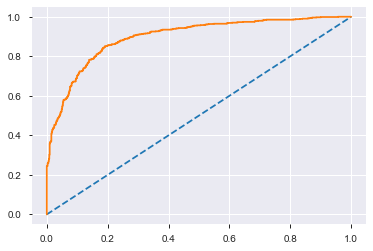

In [87]:
# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NaiveBayes_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % NaiveBayes_train_auc)
# calculate roc curve
NaiveBayes_train_fpr, NaiveBayes_train_tpr, NaiveBayes_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NaiveBayes_train_fpr, NaiveBayes_train_tpr)

AUC: 0.882


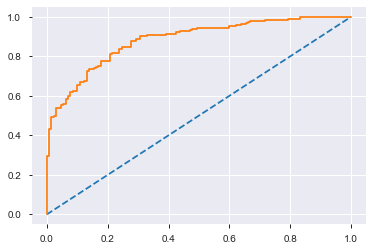

In [88]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NaiveBayes_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NaiveBayes_test_auc)
# calculate roc curve
NaiveBayes_test_fpr, NaiveBayes_test_tpr, NaiveBayes_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NaiveBayes_test_fpr, NaiveBayes_test_tpr)

[[601 134]
 [121 614]]
0.826530612244898
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       735
         1.0       0.82      0.84      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470

NaiveBayes_train_precision  0.82
NaiveBayes_train_recall  0.84
NaiveBayes_train_f1  0.83
Confusion matrix, without normalization testing set
[[103  27]
 [ 66 262]]


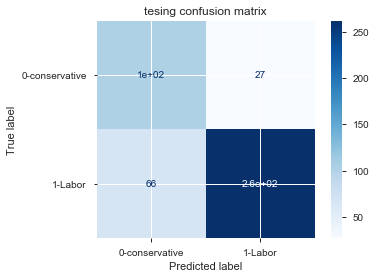

Confusion matrix, without normalization training set
[[601 134]
 [121 614]]


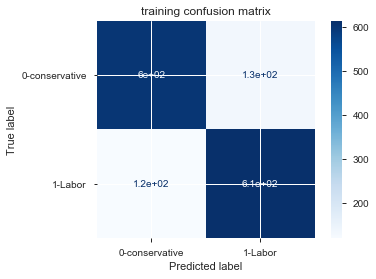

Normalized confusion matrix testing set
[[0.792 0.208]
 [0.201 0.799]]


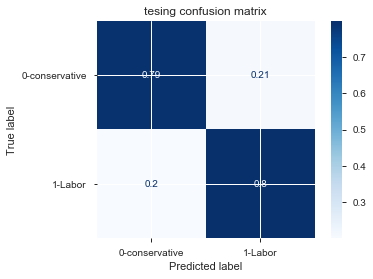

Normalized confusion matrix training set
[[0.818 0.182]
 [0.165 0.835]]


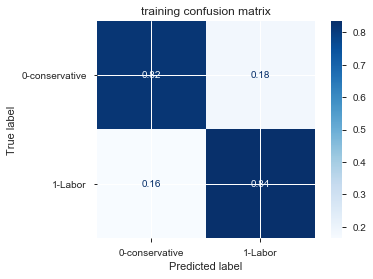

In [89]:
print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
NaiveBayes_train_acc=model.score(x_train_res,y_train_res) 
print(NaiveBayes_train_acc)
print(classification_report(y_train_res, ytrain_predict))
NaiveBayes_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(NaiveBayes_metrics).transpose()
NaiveBayes_train_precision=round(df.loc["1.0"][1],2)
NaiveBayes_train_recall=round(df.loc["1.0"][2],2)
NaiveBayes_train_f1=round(df.loc["1.0"][0],2)
print ('NaiveBayes_train_precision ',NaiveBayes_train_precision)
print ('NaiveBayes_train_recall ',NaiveBayes_train_recall)
print ('NaiveBayes_train_f1 ',NaiveBayes_train_f1)
plotconftmat(class_names, y_test, model)

y train pred head 
      0    1
0  0.0  1.0
1  1.0  0.0
2  0.0  1.0
3  0.0  1.0
4  1.0  0.0
y test pred head 
      0    1
0  0.0  1.0
1  1.0  0.0
2  0.0  1.0
3  0.0  1.0
4  1.0  0.0
model cv score [0.729 0.72  0.738 0.776 0.794 0.766 0.776 0.84  0.708 0.736]

AUC: 1.000
AUC: 0.719
[[735   0]
 [  1 734]]
0.9993197278911564
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       735
         1.0       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470

DecisionTree_train_precision  1.0
DecisionTree_train_recall  1.0
DecisionTree_train_f1  1.0
[[ 83  47]
 [ 66 262]]
0.7532751091703057
              precision    recall  f1-score   support

         0.0       0.56      0.64      0.59       130
         1.0       0.85      0.80      0.82       328

    accuracy                           0.75       

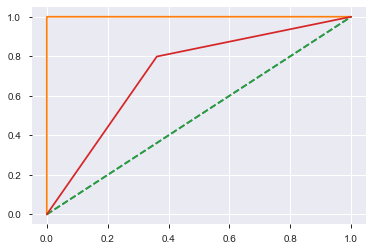

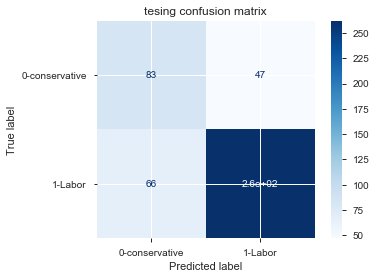

Confusion matrix, without normalization training set
[[735   0]
 [  1 734]]


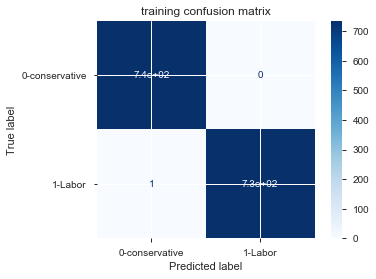

Normalized confusion matrix testing set
[[0.638 0.362]
 [0.201 0.799]]


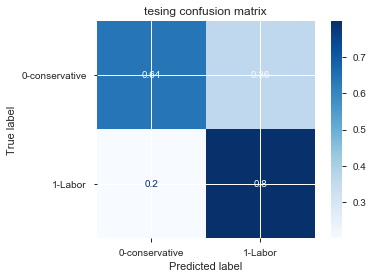

Normalized confusion matrix training set
[[1.    0.   ]
 [0.001 0.999]]


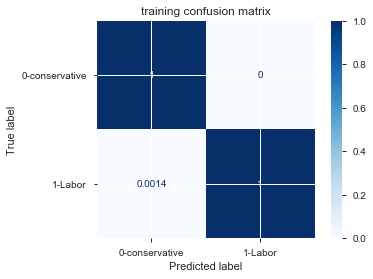

In [90]:
model = tree.DecisionTreeClassifier()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
DecisionTree_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % DecisionTree_train_auc)
# calculate roc curve
DecisionTree_train_fpr, DecisionTree_train_tpr, DecisionTree_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DecisionTree_train_fpr, DecisionTree_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
DecisionTree_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % DecisionTree_test_auc)
# calculate roc curve
DecisionTree_test_fpr, DecisionTree_test_tpr, DecisionTree_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DecisionTree_test_fpr, DecisionTree_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
DecisionTree_train_acc=model.score(x_train_res,y_train_res) 
print(DecisionTree_train_acc)
print(classification_report(y_train_res, ytrain_predict))
DecisionTree_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(DecisionTree_metrics).transpose()
DecisionTree_train_precision=round(df.loc["1.0"][1],2)
DecisionTree_train_recall=round(df.loc["1.0"][2],2)
DecisionTree_train_f1=round(df.loc["1.0"][0],2)
print ('DecisionTree_train_precision ',DecisionTree_train_precision)
print ('DecisionTree_train_recall ',DecisionTree_train_recall)
print ('DecisionTree_train_f1 ',DecisionTree_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
DecisionTree_test_acc=model.score(x_test,y_test)
print(DecisionTree_test_acc)
print(classification_report(y_test, ytest_predict))
DecisionTree_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(DecisionTree_metrics).transpose()
DecisionTree_test_precision=round(df.loc["1.0"][1],2)
DecisionTree_test_recall=round(df.loc["1.0"][2],2)
DecisionTree_test_f1=round(df.loc["1.0"][0],2)
print ('DecisionTree_test_precision ',DecisionTree_test_precision)
print ('DecisionTree_test_recall ',DecisionTree_test_recall)
print ('DecisionTree_test_f1 ',DecisionTree_test_f1)
plotconftmat(class_names, y_test, model)

y train pred head 
       0     1
0  0.24  0.76
1  0.79  0.21
2  0.12  0.88
3  0.09  0.91
4  0.65  0.35
y test pred head 
       0     1
0  0.24  0.76
1  0.79  0.21
2  0.12  0.88
3  0.09  0.91
4  0.65  0.35
model cv score [0.766 0.794 0.85  0.832 0.832 0.813 0.822 0.906 0.811 0.83 ]

AUC: 1.000
AUC: 0.891
[[734   1]
 [  0 735]]
0.9993197278911564
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       735
         1.0       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470

RandomForest_train_precision  1.0
RandomForest_train_recall  1.0
RandomForest_train_f1  1.0
[[ 95  35]
 [ 46 282]]
0.8231441048034934
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70       130
         1.0       0.89      0.86      0.87       328

    accuracy              

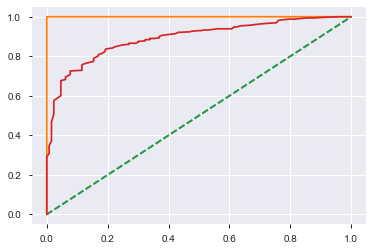

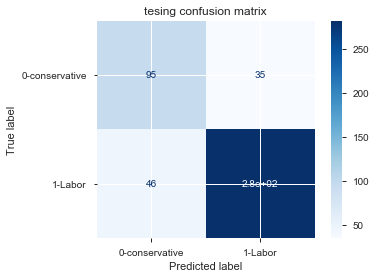

Confusion matrix, without normalization training set
[[734   1]
 [  0 735]]


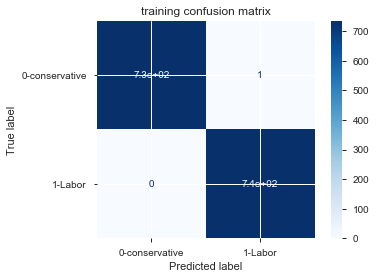

Normalized confusion matrix testing set
[[0.731 0.269]
 [0.14  0.86 ]]


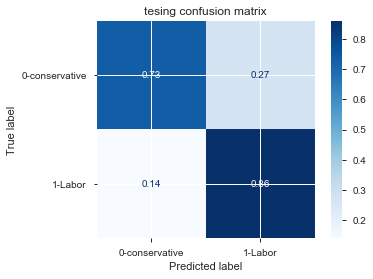

Normalized confusion matrix training set
[[0.999 0.001]
 [0.    1.   ]]


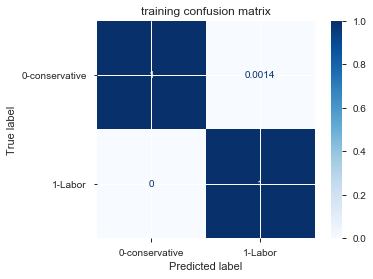

In [91]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
RandomForest_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % RandomForest_train_auc)
# calculate roc curve
RandomForest_train_fpr, RandomForest_train_tpr, RandomForest_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RandomForest_train_fpr, RandomForest_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RandomForest_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RandomForest_test_auc)
# calculate roc curve
RandomForest_test_fpr, RandomForest_test_tpr, RandomForest_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RandomForest_test_fpr, RandomForest_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
RandomForest_train_acc=model.score(x_train_res,y_train_res) 
print(RandomForest_train_acc)
print(classification_report(y_train_res, ytrain_predict))
RandomForest_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(RandomForest_metrics).transpose()
RandomForest_train_precision=round(df.loc["1.0"][1],2)
RandomForest_train_recall=round(df.loc["1.0"][2],2)
RandomForest_train_f1=round(df.loc["1.0"][0],2)
print ('RandomForest_train_precision ',RandomForest_train_precision)
print ('RandomForest_train_recall ',RandomForest_train_recall)
print ('RandomForest_train_f1 ',RandomForest_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
RandomForest_test_acc=model.score(x_test,y_test)
print(RandomForest_test_acc)
print(classification_report(y_test, ytest_predict))
RandomForest_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(RandomForest_metrics).transpose()
RandomForest_test_precision=round(df.loc["1.0"][1],2)
RandomForest_test_recall=round(df.loc["1.0"][2],2)
RandomForest_test_f1=round(df.loc["1.0"][0],2)
print ('RandomForest_test_precision ',RandomForest_test_precision)
print ('RandomForest_test_recall ',RandomForest_test_recall)
print ('RandomForest_test_f1 ',RandomForest_test_f1)
plotconftmat(class_names, y_test, model)

y train pred head 
           0         1
0  0.870952  0.129048
1  0.362232  0.637768
2  0.131482  0.868518
3  0.161952  0.838048
4  0.470758  0.529242
y test pred head 
           0         1
0  0.870952  0.129048
1  0.362232  0.637768
2  0.131482  0.868518
3  0.161952  0.838048
4  0.470758  0.529242
model cv score [0.794 0.794 0.86  0.832 0.85  0.822 0.804 0.887 0.821 0.811]

AUC: 0.936
AUC: 0.894
[[649  86]
 [101 634]]
0.8727891156462585
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       735
         1.0       0.88      0.86      0.87       735

    accuracy                           0.87      1470
   macro avg       0.87      0.87      0.87      1470
weighted avg       0.87      0.87      0.87      1470

SVM_train_precision  0.88
SVM_train_recall  0.86
SVM_train_f1  0.87
[[104  26]
 [ 62 266]]
0.8078602620087336
              precision    recall  f1-score   support

         0.0       0.63      0.80      0.70       130
         

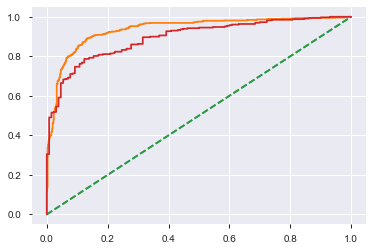

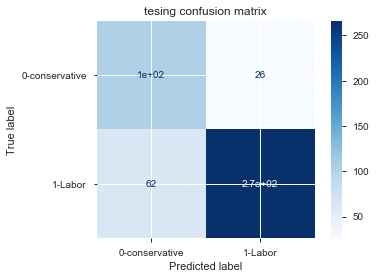

Confusion matrix, without normalization training set
[[649  86]
 [101 634]]


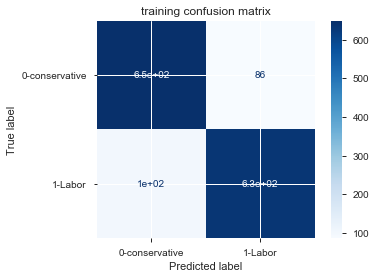

Normalized confusion matrix testing set
[[0.8   0.2  ]
 [0.189 0.811]]


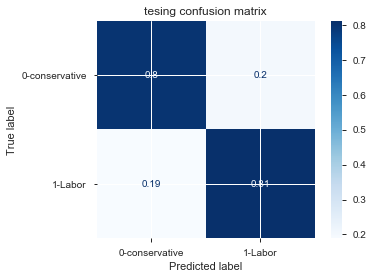

Normalized confusion matrix training set
[[0.883 0.117]
 [0.137 0.863]]


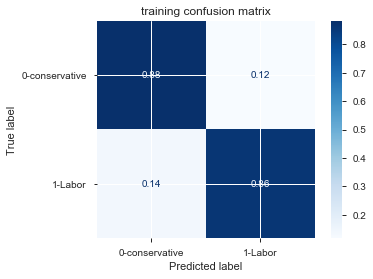

In [92]:
model = svm.SVC(probability=True)
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
SVM_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % SVM_train_auc)
# calculate roc curve
SVM_train_fpr, SVM_train_tpr, SVM_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_train_fpr, SVM_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % SVM_test_auc)
# calculate roc curve
SVM_test_fpr, SVM_test_tpr, SVM_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_test_fpr, SVM_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
SVM_train_acc=model.score(x_train_res,y_train_res) 
print(SVM_train_acc)
print(classification_report(y_train_res, ytrain_predict))
SVM_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()
SVM_train_precision=round(df.loc["1.0"][1],2)
SVM_train_recall=round(df.loc["1.0"][2],2)
SVM_train_f1=round(df.loc["1.0"][0],2)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
SVM_test_acc=model.score(x_test,y_test)
print(SVM_test_acc)
print(classification_report(y_test, ytest_predict))
SVM_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()
SVM_test_precision=round(df.loc["1.0"][1],2)
SVM_test_recall=round(df.loc["1.0"][2],2)
SVM_test_f1=round(df.loc["1.0"][0],2)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)
plotconftmat(class_names, y_test, model)

y train pred head 
           0         1
0  0.798334  0.201666
1  0.290992  0.709008
2  0.312541  0.687459
3  0.245262  0.754738
4  0.079282  0.920718
y test pred head 
           0         1
0  0.798334  0.201666
1  0.290992  0.709008
2  0.312541  0.687459
3  0.245262  0.754738
4  0.079282  0.920718
model cv score [0.785 0.822 0.86  0.85  0.841 0.822 0.804 0.925 0.821 0.802]

AUC: 0.897
AUC: 0.882
[[601 134]
 [127 608]]
0.8224489795918367
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       735
         1.0       0.82      0.83      0.82       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470

LDA_train_precision  0.82
LDA_train_recall  0.83
LDA_train_f1  0.82
[[101  29]
 [ 64 264]]
0.7969432314410481
              precision    recall  f1-score   support

         0.0       0.61      0.78      0.68       130
         

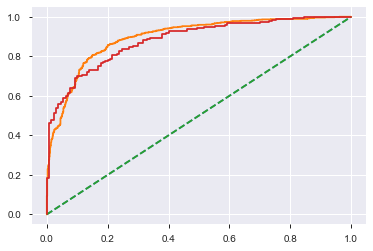

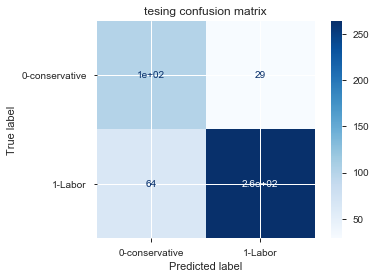

Confusion matrix, without normalization training set
[[601 134]
 [127 608]]


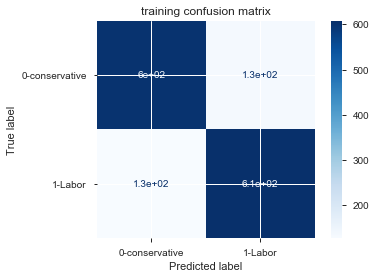

Normalized confusion matrix testing set
[[0.777 0.223]
 [0.195 0.805]]


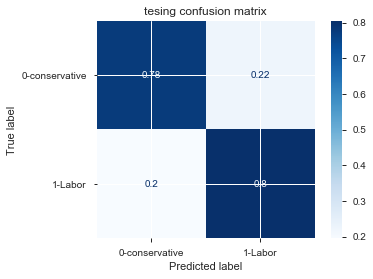

Normalized confusion matrix training set
[[0.818 0.182]
 [0.173 0.827]]


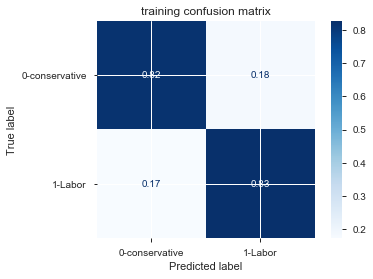

In [93]:
model = LinearDiscriminantAnalysis()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
LDA_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
LDA_train_acc=model.score(x_train_res,y_train_res) 
print(LDA_train_acc)
print(classification_report(y_train_res, ytrain_predict))
LDA_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1.0"][1],2)
LDA_train_recall=round(df.loc["1.0"][2],2)
LDA_train_f1=round(df.loc["1.0"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
LDA_test_acc=model.score(x_test,y_test)
print(LDA_test_acc)
print(classification_report(y_test, ytest_predict))
LDA_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1.0"][1],2)
LDA_test_recall=round(df.loc["1.0"][2],2)
LDA_test_f1=round(df.loc["1.0"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)
plotconftmat(class_names, y_test, model)

y train pred head 
           0         1
0  0.503194  0.496806
1  0.499532  0.500468
2  0.498316  0.501684
3  0.498476  0.501524
4  0.499908  0.500092
y test pred head 
           0         1
0  0.503194  0.496806
1  0.499532  0.500468
2  0.498316  0.501684
3  0.498476  0.501524
4  0.499908  0.500092
model cv score [0.785 0.776 0.822 0.869 0.822 0.822 0.813 0.887 0.83  0.792]

AUC: 0.946
AUC: 0.877
[[645  90]
 [107 628]]
0.8659863945578231
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       735
         1.0       0.87      0.85      0.86       735

    accuracy                           0.87      1470
   macro avg       0.87      0.87      0.87      1470
weighted avg       0.87      0.87      0.87      1470

AdaBoost_train_precision  0.87
AdaBoost_train_recall  0.85
AdaBoost_train_f1  0.86
[[ 99  31]
 [ 57 271]]
0.8078602620087336
              precision    recall  f1-score   support

         0.0       0.63      0.76      0.69     

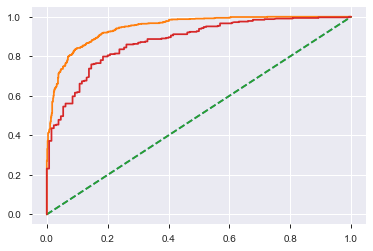

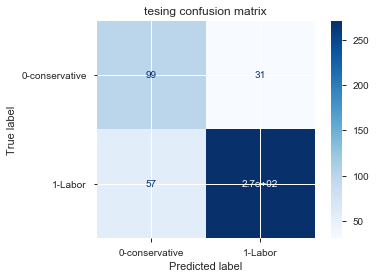

Confusion matrix, without normalization training set
[[645  90]
 [107 628]]


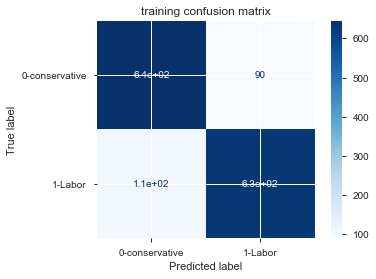

Normalized confusion matrix testing set
[[0.762 0.238]
 [0.174 0.826]]


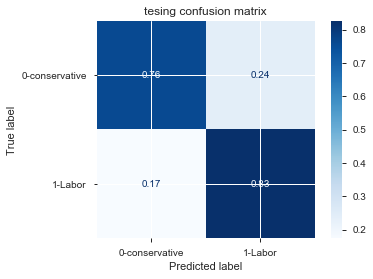

Normalized confusion matrix training set
[[0.878 0.122]
 [0.146 0.854]]


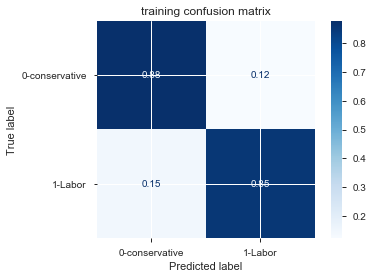

In [94]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
AdaBoost_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % AdaBoost_train_auc)
# calculate roc curve
AdaBoost_train_fpr, AdaBoost_train_tpr, AdaBoost_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(AdaBoost_train_fpr, AdaBoost_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
AdaBoost_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % AdaBoost_test_auc)
# calculate roc curve
AdaBoost_test_fpr, AdaBoost_test_tpr, AdaBoost_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(AdaBoost_test_fpr, AdaBoost_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
AdaBoost_train_acc=model.score(x_train_res,y_train_res) 
print(AdaBoost_train_acc)
print(classification_report(y_train_res, ytrain_predict))
AdaBoost_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(AdaBoost_metrics).transpose()
AdaBoost_train_precision=round(df.loc["1.0"][1],2)
AdaBoost_train_recall=round(df.loc["1.0"][2],2)
AdaBoost_train_f1=round(df.loc["1.0"][0],2)
print ('AdaBoost_train_precision ',AdaBoost_train_precision)
print ('AdaBoost_train_recall ',AdaBoost_train_recall)
print ('AdaBoost_train_f1 ',AdaBoost_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
AdaBoost_test_acc=model.score(x_test,y_test)
print(AdaBoost_test_acc)
print(classification_report(y_test, ytest_predict))
AdaBoost_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(AdaBoost_metrics).transpose()
AdaBoost_test_precision=round(df.loc["1.0"][1],2)
AdaBoost_test_recall=round(df.loc["1.0"][2],2)
AdaBoost_test_f1=round(df.loc["1.0"][0],2)
print ('AdaBoost_test_precision ',AdaBoost_test_precision)
print ('AdaBoost_test_recall ',AdaBoost_test_recall)
print ('AdaBoost_test_f1 ',AdaBoost_test_f1)
plotconftmat(class_names, y_test, model)

y train pred head 
      0    1
0  0.8  0.2
1  0.4  0.6
2  0.2  0.8
3  0.2  0.8
4  0.8  0.2
y test pred head 
      0    1
0  0.8  0.2
1  0.4  0.6
2  0.2  0.8
3  0.2  0.8
4  0.8  0.2
model cv score [0.794 0.813 0.841 0.804 0.832 0.748 0.813 0.896 0.792 0.811]

AUC: 0.966
AUC: 0.859
[[693  42]
 [126 609]]
0.8857142857142857
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       735
         1.0       0.94      0.83      0.88       735

    accuracy                           0.89      1470
   macro avg       0.89      0.89      0.89      1470
weighted avg       0.89      0.89      0.89      1470

KNN_train_precision  0.94
KNN_train_recall  0.83
KNN_train_f1  0.88
[[105  25]
 [ 73 255]]
0.7860262008733624
              precision    recall  f1-score   support

         0.0       0.59      0.81      0.68       130
         1.0       0.91      0.78      0.84       328

    accuracy                           0.79       458
   macro avg       0

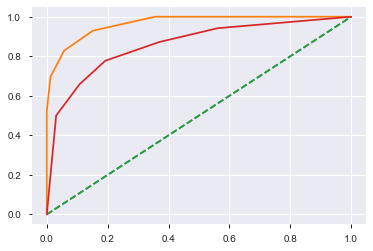

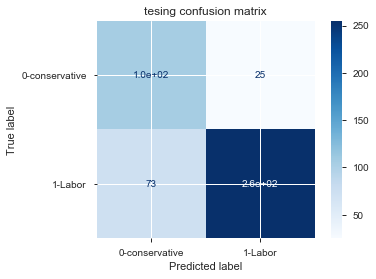

Confusion matrix, without normalization training set
[[693  42]
 [126 609]]


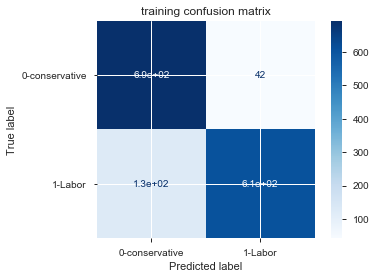

Normalized confusion matrix testing set
[[0.808 0.192]
 [0.223 0.777]]


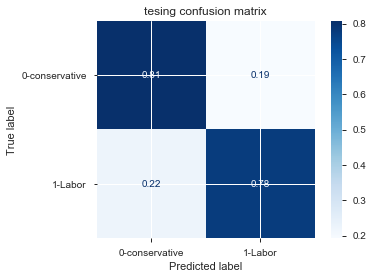

Normalized confusion matrix training set
[[0.943 0.057]
 [0.171 0.829]]


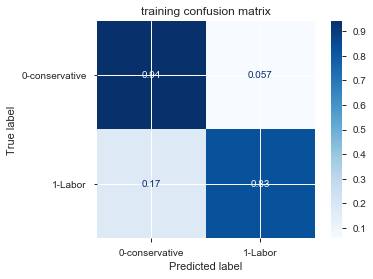

In [95]:
model = KNeighborsClassifier()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
KNN_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
KNN_train_acc=model.score(x_train_res,y_train_res) 
print(KNN_train_acc)
print(classification_report(y_train_res, ytrain_predict))
KNN_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df.loc["1.0"][1],2)
KNN_train_recall=round(df.loc["1.0"][2],2)
KNN_train_f1=round(df.loc["1.0"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
KNN_test_acc=model.score(x_test,y_test)
print(KNN_test_acc)
print(classification_report(y_test, ytest_predict))
KNN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1.0"][1],2)
KNN_test_recall=round(df.loc["1.0"][2],2)
KNN_test_f1=round(df.loc["1.0"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)
plotconftmat(class_names, y_test, model)

y train pred head 
           0         1
0  0.644629  0.355371
1  0.492274  0.507726
2  0.472308  0.527692
3  0.262723  0.737277
4  0.355918  0.644082
y test pred head 
           0         1
0  0.644629  0.355371
1  0.492274  0.507726
2  0.472308  0.527692
3  0.262723  0.737277
4  0.355918  0.644082
model cv score [0.813 0.776 0.804 0.794 0.841 0.757 0.813 0.877 0.849 0.83 ]

AUC: 0.920
AUC: 0.894
[[610 125]
 [106 629]]
0.8428571428571429
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       735
         1.0       0.83      0.86      0.84       735

    accuracy                           0.84      1470
   macro avg       0.84      0.84      0.84      1470
weighted avg       0.84      0.84      0.84      1470

XGBoost_train_precision  0.83
XGBoost_train_recall  0.86
XGBoost_train_f1  0.84
[[105  25]
 [ 58 270]]
0.8187772925764192
              precision    recall  f1-score   support

         0.0       0.64      0.81      0.72       1

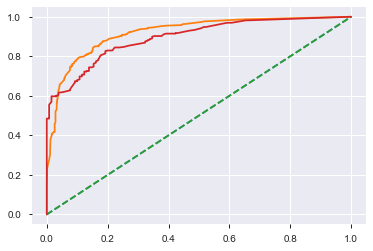

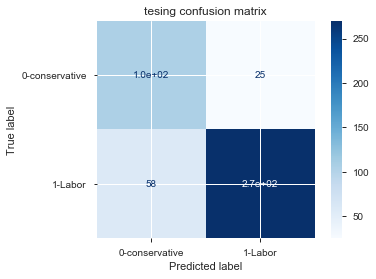

Confusion matrix, without normalization training set
[[610 125]
 [106 629]]


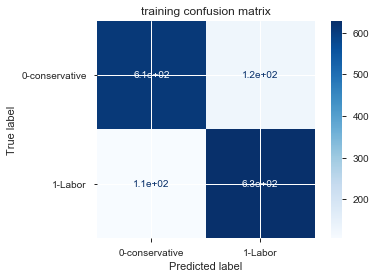

Normalized confusion matrix testing set
[[0.808 0.192]
 [0.177 0.823]]


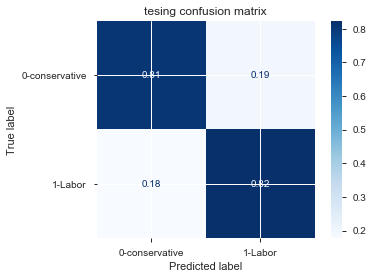

Normalized confusion matrix training set
[[0.83  0.17 ]
 [0.144 0.856]]


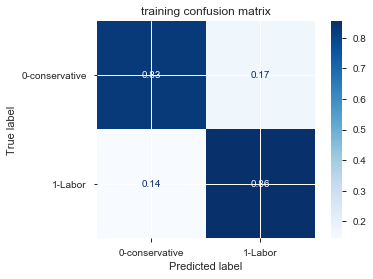

In [96]:
model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train, y_train, cv=10)
print("model cv score {}\n".format(scores))

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
XGBoost_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % XGBoost_train_auc)
# calculate roc curve
XGBoost_train_fpr, XGBoost_train_tpr, XGBoost_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGBoost_train_fpr, XGBoost_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
XGBoost_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % XGBoost_test_auc)
# calculate roc curve
XGBoost_test_fpr, XGBoost_test_tpr, XGBoost_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGBoost_test_fpr, XGBoost_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
XGBoost_train_acc=model.score(x_train_res,y_train_res) 
print(XGBoost_train_acc)
print(classification_report(y_train_res, ytrain_predict))
XGBoost_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(XGBoost_metrics).transpose()
XGBoost_train_precision=round(df.loc["1.0"][1],2)
XGBoost_train_recall=round(df.loc["1.0"][2],2)
XGBoost_train_f1=round(df.loc["1.0"][0],2)
print ('XGBoost_train_precision ',XGBoost_train_precision)
print ('XGBoost_train_recall ',XGBoost_train_recall)
print ('XGBoost_train_f1 ',XGBoost_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
XGBoost_test_acc=model.score(x_test,y_test)
print(XGBoost_test_acc)
print(classification_report(y_test, ytest_predict))
XGBoost_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(XGBoost_metrics).transpose()
XGBoost_test_precision=round(df.loc["1.0"][1],2)
XGBoost_test_recall=round(df.loc["1.0"][2],2)
XGBoost_test_f1=round(df.loc["1.0"][0],2)
print ('XGBoost_test_precision ',XGBoost_test_precision)
print ('XGBoost_test_recall ',XGBoost_test_recall)
print ('XGBoost_test_f1 ',XGBoost_test_f1)
plotconftmat(class_names, y_test, model)

In [97]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
metdata = pd.DataFrame({'logit Train':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
        'logit Test':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
       'NaiveBayes Train':[NaiveBayes_train_acc,NaiveBayes_train_auc,NaiveBayes_train_recall,NaiveBayes_train_precision,NaiveBayes_train_f1],
        'NaiveBayes Test':[NaiveBayes_test_acc,NaiveBayes_test_auc,NaiveBayes_test_recall,NaiveBayes_test_precision,NaiveBayes_test_f1],
        'DecisionTree Train':[DecisionTree_train_acc,DecisionTree_train_auc,DecisionTree_train_recall,DecisionTree_train_precision,DecisionTree_train_f1],
        'DecisionTree Test':[DecisionTree_test_acc,DecisionTree_test_auc,DecisionTree_test_recall,DecisionTree_test_precision,DecisionTree_test_f1],
        'RandomForest Train':[RandomForest_train_acc,RandomForest_train_auc,RandomForest_train_recall,RandomForest_train_precision,RandomForest_train_f1],
        'RandomForest Test':[RandomForest_test_acc,RandomForest_test_auc,RandomForest_test_recall,RandomForest_test_precision,RandomForest_test_f1],
        'SVM Train':[SVM_train_acc,SVM_train_auc,SVM_train_recall,SVM_train_precision,SVM_train_f1],
        'SVM Test':[SVM_test_acc,SVM_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1],
        'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'AdaBoost Train':[AdaBoost_train_acc,AdaBoost_train_auc,AdaBoost_train_recall,AdaBoost_train_precision,AdaBoost_train_f1],
        'AdaBoost Test':[AdaBoost_test_acc,AdaBoost_test_auc,AdaBoost_test_recall,AdaBoost_test_precision,AdaBoost_test_f1],
        'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'XGBoost Train':[XGBoost_train_acc,XGBoost_train_auc,XGBoost_train_recall,XGBoost_train_precision,XGBoost_train_f1],
        'XGBoost Test':[XGBoost_test_acc,XGBoost_test_auc,XGBoost_test_recall,XGBoost_test_precision,XGBoost_test_f1]
       },index=index)
print(round(metdata,2))
metdata.T.to_csv('D:/GL/Total DS Codes2/ML/Assignment Project/Election_Data_Metrics.csv')

           logit Train  logit Test  NaiveBayes Train  NaiveBayes Test  \
Accuracy          0.82        0.80              0.83             0.80   
AUC               0.90        0.88              0.90             0.88   
Recall            0.83        0.80              0.84             0.80   
Precision         0.82        0.90              0.82             0.91   
F1 Score          0.82        0.85              0.83             0.85   

           DecisionTree Train  DecisionTree Test  RandomForest Train  \
Accuracy                  1.0               0.75                 1.0   
AUC                       1.0               0.72                 1.0   
Recall                    1.0               0.80                 1.0   
Precision                 1.0               0.85                 1.0   
F1 Score                  1.0               0.82                 1.0   

           RandomForest Test  SVM Train  SVM Test  LDA Train  LDA Test  \
Accuracy                0.82       0.87      0.81     

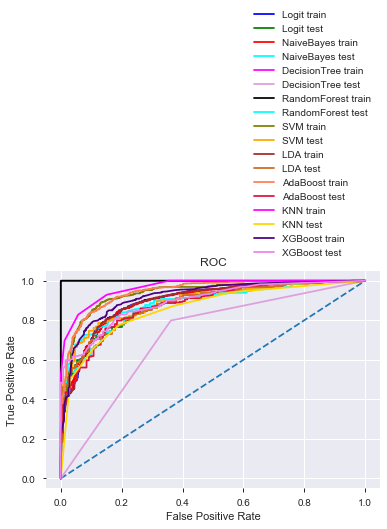

In [98]:
# https://matplotlib.org/tutorials/colors/colors.html
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='blue',label="Logit train")
plt.plot(logit_test_fpr, logit_test_tpr,color='green',label="Logit test")
plt.plot(NaiveBayes_train_fpr, NaiveBayes_train_tpr,color='red',label="NaiveBayes train")
plt.plot(NaiveBayes_test_fpr, NaiveBayes_test_tpr,color='cyan',label="NaiveBayes test")
plt.plot(DecisionTree_train_fpr, DecisionTree_train_tpr,color='magenta',label="DecisionTree train")
plt.plot(DecisionTree_test_fpr, DecisionTree_test_tpr,color='plum',label="DecisionTree test")
plt.plot(RandomForest_train_fpr, RandomForest_train_tpr,color='black',label="RandomForest train")
plt.plot(RandomForest_test_fpr, RandomForest_test_tpr,color='aqua',label="RandomForest test")
plt.plot(SVM_train_fpr, SVM_train_tpr,color='olive',label="SVM train")
plt.plot(SVM_test_fpr, SVM_test_tpr,color='orange',label="SVM test")
plt.plot(LDA_train_fpr, LDA_train_tpr,color='brown',label="LDA train")
plt.plot(LDA_test_fpr, LDA_test_tpr,color='chocolate',label="LDA test")
plt.plot(AdaBoost_train_fpr, AdaBoost_train_tpr,color='coral',label="AdaBoost train")
plt.plot(AdaBoost_test_fpr, AdaBoost_test_tpr,color='crimson',label="AdaBoost test")
plt.plot(KNN_train_fpr, KNN_train_tpr,color='fuchsia',label="KNN train")
plt.plot(KNN_test_fpr, KNN_test_tpr,color='gold',label="KNN test")
plt.plot(XGBoost_train_fpr, XGBoost_train_tpr,color='indigo',label="XGBoost train")
plt.plot(XGBoost_test_fpr, XGBoost_test_tpr,color='violet',label="XGBoost test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [99]:
# https://kite.com/python/answers/how-to-append-an-element-to-a-key-in-a-dictionary-with-python
# https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/
def modedev(modelname):
    x = data.drop(columns=["vote"])
    y = data["vote"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    sm = SMOTE(random_state=2)
    x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
    if modelname=="NB":
        model = GaussianNB()
    if modelname=="Logit":
        model = LogisticRegression()
    if modelname=="Tree":
        model = tree.DecisionTreeClassifier()
    if modelname=="RF":
        model = RandomForestClassifier(n_estimators=100)
    if modelname=="SVM":
        model = svm.SVC()
    if modelname=="LDA":
        model = LinearDiscriminantAnalysis()
    if modelname=="Adaboost":
        model = AdaBoostClassifier(n_estimators=100)
    if modelname=="KNN":
        model = KNeighborsClassifier()
    if modelname=="XGB":
        model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
   
    metaccuracydict = {}
#     metaccdicarr={}
    model = model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    model_score = model.score(x_test, y_test)
    print("-------testing set-----\n")
    modeltype = "normal"
    print("model type {} model name {} model score {}\n".format(modeltype, modelname, model_score))
    metaccuracydict.update({modelname+modeltype+" test":model_score})
#     if modelname+modeltype+" test" in metaccdicarr:
#         metaccdicarr[modelname+modeltype+" test"].append(model_score)
#     else:
#         metaccdicarr[modelname+modeltype+" test"] = [model_score]
    print("model type {} model name {} Conf mat score {} classification report {} \n".format(modeltype, modelname, metrics.confusion_matrix(y_test, y_predict),classification_report(y_test, y_predict)))
    model_score = model.score(x_train, y_train)
    print("-------training set-----\n")
    y_predict = model.predict(x_train)
    model_score = model.score(x_train, y_train)
    metaccuracydict.update({modelname+modeltype+" train":model_score})
#     if modelname+modeltype+" train" in metaccdicarr:
#         metaccdicarr[modelname+modeltype+" train"].append(model_score)
#     else:
#         metaccdicarr[modelname+modeltype+" train"] = [model_score]
    print("model type {} model name {} model score {}\n".format(modeltype, modelname, model_score))
    print("model type {} model name {} Conf mat score {} classification reeport {} \n".format(modeltype, modelname, metrics.confusion_matrix(y_train, y_predict),classification_report(y_train, y_predict)))
# cross validation
    scores = cross_val_score(model, x_train, y_train, cv=10)
    print("model type {} model name {} model cv score {}\n".format(modeltype, modelname, scores))
    
    
    model = model.fit(x_train_res, y_train_res)
    y_predict = model.predict(x_test)
    model_score = model.score(x_test, y_test)
    modeltype = "smote"
    metaccuracydict.update({modelname+modeltype+" test":model_score})
#     if modelname+modeltype+" test" in metaccdicarr:
#         metaccdicarr[modelname+modeltype+" test"].append(model_score)
#     else:
#         metaccdicarr[modelname+modeltype+" test"] = [model_score]
    print("------testing set------\n")
    print("model type {} model name {} model score {}\n".format(modeltype, modelname, model_score))
    print("model type {} model name {} Conf mat score {} classification report {} \n".format(modeltype, modelname, metrics.confusion_matrix(y_test, y_predict),classification_report(y_test, y_predict)))
    print("-------training set-----\n")
    y_predict = model.predict(x_train_res)
    model_score = model.score(x_train_res, y_train_res)
    metaccuracydict.update({modelname+modeltype+" train":model_score})
#     if modelname+modeltype+" test" in metaccdicarr:
#         metaccdicarr[modelname+modeltype+" train"].append(model_score)
#     else:
#         metaccdicarr[modelname+modeltype+" train"] = [model_score]
    print("model type {} model name {} model score {}\n".format(modeltype, modelname, model_score))
    print("model type {} model name {} Conf mat score {} classification report {} \n".format(modeltype, modelname, metrics.confusion_matrix(y_train_res, y_predict),classification_report(y_train_res, y_predict)))
# cross validation
    scores = cross_val_score(model, x_train_res, y_train_res, cv=10)
    print("model type {} model name {} model cv score {}\n".format(modeltype, modelname, scores))
    print(metaccuracydict)
#     print(metaccdicarr)
    
    
    
#     model, y_predict, model_score, modeltype, scores = normalvalidation(modelname, x_train, x_test, y_train, y_test, model)
#     smotevalidation(modelname, x_test, y_test, x_train_res, y_train_res, model, y_predict, model_score, modeltype, scores)
        
modedev("NB")
modedev("Logit")
modedev("Tree")
modedev("RF")
modedev("SVM")
modedev("LDA")
modedev("Adaboost")
modedev("KNN")
modedev("XGB")

-------testing set-----

model type normal model name NB model score 0.8231441048034934

model type normal model name NB Conf mat score [[ 94  36]
 [ 45 283]] classification report               precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       130
         1.0       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458
 

-------training set-----

model type normal model name NB model score 0.8322399250234301

model type normal model name NB Conf mat score [[240  92]
 [ 87 648]] classification reeport               precision    recall  f1-score   support

         0.0       0.73      0.72      0.73       332
         1.0       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83  

model type normal model name RF model cv score [0.804 0.804 0.832 0.832 0.832 0.822 0.794 0.887 0.792 0.802]

------testing set------

model type smote model name RF model score 0.8209606986899564

model type smote model name RF Conf mat score [[ 95  35]
 [ 47 281]] classification report               precision    recall  f1-score   support

         0.0       0.67      0.73      0.70       130
         1.0       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458
 

-------training set-----

model type smote model name RF model score 0.9993197278911564

model type smote model name RF Conf mat score [[734   1]
 [  0 735]] classification report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       735
         1.0       1.00      1.00      1.00       735

    accuracy                          

model type smote model name Adaboost model cv score [0.789 0.81  0.789 0.816 0.816 0.905 0.898 0.905 0.891 0.871]

{'Adaboostnormal test': 0.8187772925764192, 'Adaboostnormal train': 0.8472352389878163, 'Adaboostsmote test': 0.8078602620087336, 'Adaboostsmote train': 0.8659863945578231}
-------testing set-----

model type normal model name KNN model score 0.8209606986899564

model type normal model name KNN Conf mat score [[ 91  39]
 [ 43 285]] classification report               precision    recall  f1-score   support

         0.0       0.68      0.70      0.69       130
         1.0       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458
 

-------training set-----

model type normal model name KNN model score 0.8650421743205249

model type normal model name KNN Conf mat score [[248  84]
 [ 60 675]] classification reeport               p